***
# Data Analysis of Food Products: The Open Food Repo  
***
_Report by Adi Agimba_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno

%matplotlib inline

%config InlineBackend.figure_format = 'retina' 

## A. An overview of the dataset

**1) Import the data as a pandas DataFrame into your notebook**

In [2]:
df_raw = pd.read_pickle("data_385k.pkl", compression="zip")

**2) Check the number of rows and columns. You should have 385’384 samples and 99 columns**

In [3]:
print(f"The dataframe has {df_raw.shape[0]} rows and {df_raw.shape[1]} columns.")

The dataframe has 385384 rows and 99 columns.


<br/>**3) Display a few entries from the DataFrame**

Pandas *.sample()* outputs 5 randomly selected samples. All columns can be viewd as Python's *with* statement together with pandas *.option_context()* temporarily display all columns.

In [4]:
df_raw.sample(5)

alcohol_by_volume        barcode  calcium_per_hundred calcium_unit  \
239175                0.0       07813304                  NaN          NaN   
277939                0.0  0794711001325                  0.0           mg   
167137                0.0  0853261006218                  0.0           mg   
231887                0.0  0052100038476                  NaN          NaN   
373329                0.0  5900102006878                 50.0           mg   

        carbohydrates_per_hundred  carbohydrates_per_portion  \
239175                       0.00                        NaN   
277939                      93.55                        NaN   
167137                       2.63                        NaN   
231887                      66.67                        NaN   
373329                      45.00                        NaN   

       carbohydrates_unit  cholesterol_per_hundred cholesterol_unit  \
239175                  g                      NaN              NaN   
277939                  g                      0.0               mg   
167137                  g                     79.0               mg   
231887                  g                      NaN              NaN   
373329                  g                      0.0               mg   

        copper_cu_per_hundred  ... vitamin_b5_panthothenic_acid_per_hundred  \
239175                    NaN  ...                                      NaN   
277939                    NaN  ...                                      NaN   
167137                    NaN  ...                                      NaN   
231887                    NaN  ...                                      NaN   
373329                    NaN  ...                                      NaN   

       vitamin_b5_panthothenic_acid_unit vitamin_b6_pyridoxin_per_hundred  \
239175                               NaN                              NaN   
277939                               NaN                              NaN   
167137                               NaN                              NaN   
231887                               NaN                              NaN   
373329                               NaN                              NaN   

        vitamin_b6_pyridoxin_unit  vitamin_c_ascorbic_acid_per_hundred  \
239175                        NaN                                  NaN   
277939                        NaN                                  0.0   
167137                        NaN                                  0.0   
231887                        NaN                                  NaN   
373329                        NaN                                  0.0   

       vitamin_c_ascorbic_acid_unit  \
239175                          NaN   
277939                           mg   
167137                           mg   
231887                          NaN   
373329                           mg   

        vitamin_d_d2_d3_international_units_per_hundred  \
239175                                              NaN   
277939                                              NaN   
167137                                              NaN   
231887                                              NaN   
373329                                              NaN   

        vitamin_d_d2_d3_international_units_unit zinc_per_hundred  zinc_unit  
239175                                       NaN              NaN        NaN  
277939                                       NaN              NaN        NaN  
167137                                       NaN              NaN        NaN  
231887                                       NaN              NaN        NaN  
373329                                       NaN              NaN        NaN  

[5 rows x 99 columns]

<br/>**3a) Check the data type for each column**

To summarise the data types of the 99 columns, Pandas *.value_counts()* togehter with the *dtypes* attribute output the type and count of the dataframe's data points.

In [5]:
pd.value_counts(df_raw.dtypes)

float64    50
object     48
int64       1
dtype: int64

<br/>The dataset has an almost even amount of numeric and categorical data. Plotting the count of unique numeric values visualises the general shape of the dataset.

<AxesSubplot:title={'center':'Unique values per column'}>

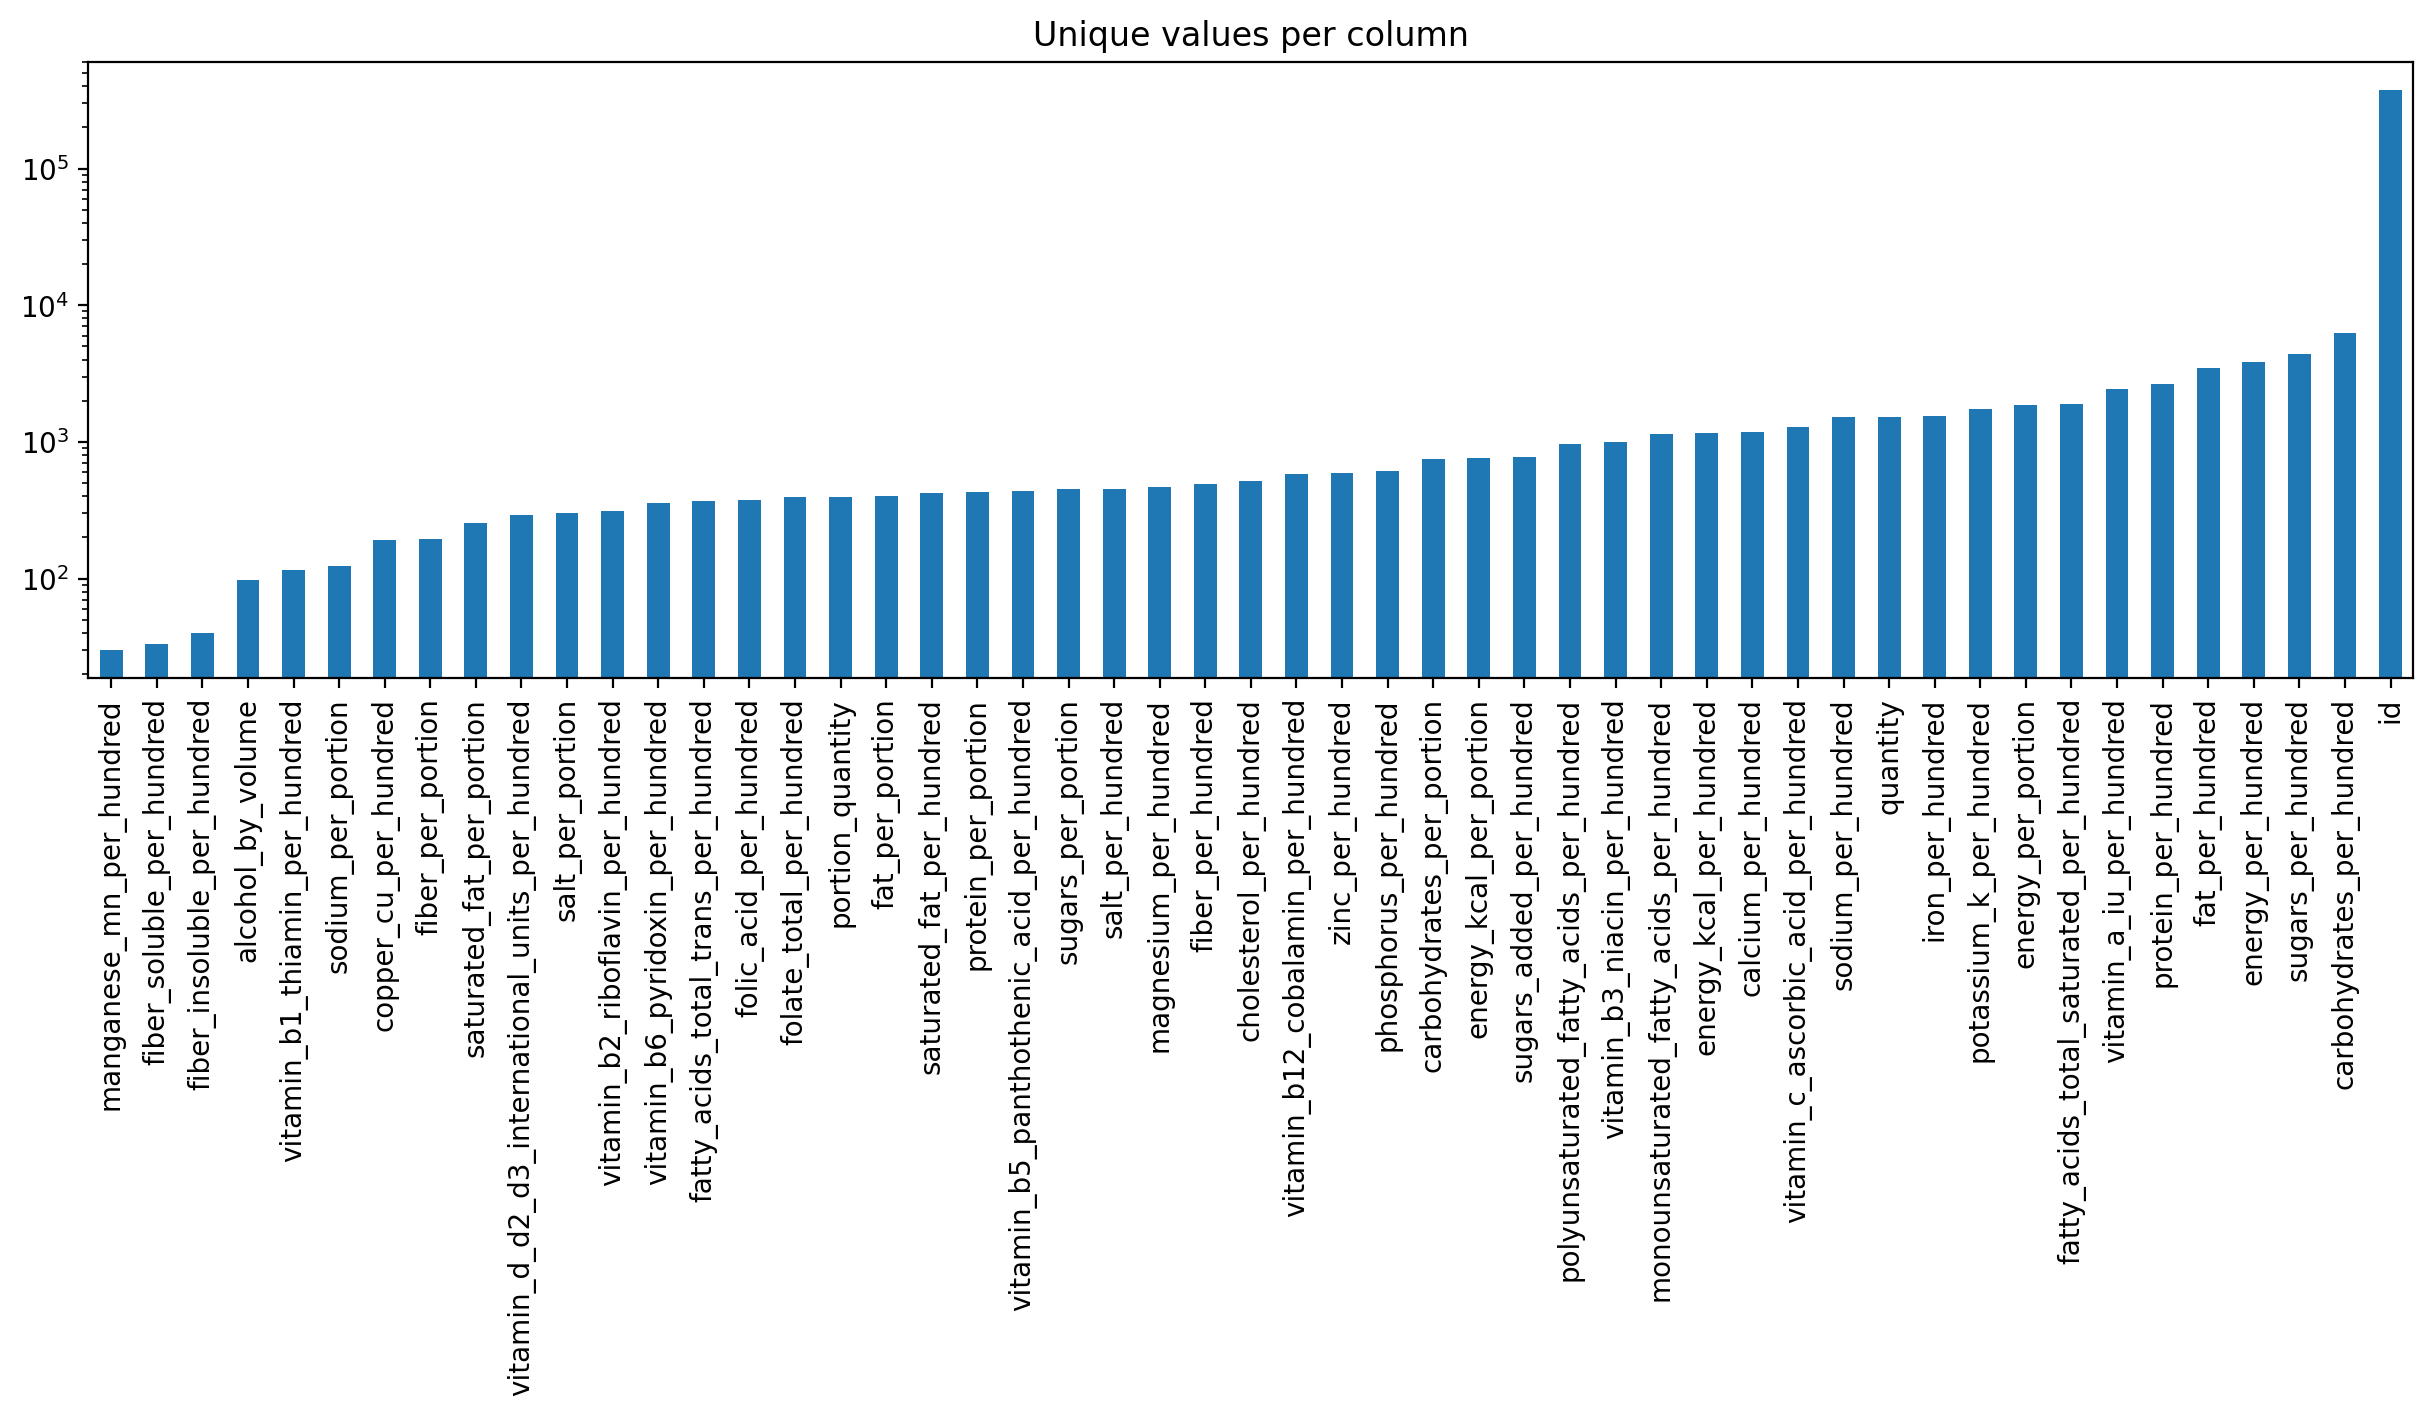

In [6]:
df_raw.select_dtypes(include="number").nunique().sort_values().plot.bar(logy=True, figsize=(15, 4), title= "Unique values per column")

 All the features except *id* have less than 10,000 distinct numeric data points.

<br/>**3b) Create separate lists to hold the names of columns of the same data type**

Pandas *.select_dtypes()* function is applied to iteratively create distinct lists of unique data types. For each subset, all columns can be viewd as Python's *with* statement together with pandas *.option_context()* temporarily display all columns.

<br/>The variable *df_float64* stores all data entries with decimal values. 

In [7]:
df_float64 = df_raw.select_dtypes(include= [np.float64])

print(f"The dataframe has {len(df_float64.columns)} columns:\n")

with pd.option_context('display.max_columns', None,):
 display(df_float64.head())

The dataframe has 50 columns:



alcohol_by_volume  calcium_per_hundred  carbohydrates_per_hundred  \
0                0.0                  NaN                      75.00   
1                0.0                  NaN                       1.50   
2                0.0                  NaN                      52.68   
3                0.0                  NaN                      70.40   
4                0.0                  NaN                      37.00   

   carbohydrates_per_portion  cholesterol_per_hundred  copper_cu_per_hundred  \
0                      37.50                      NaN                    NaN   
1                       1.13                      NaN                    NaN   
2                        NaN                      NaN                    NaN   
3                      11.97                      NaN                    NaN   
4                       7.40                      NaN                    NaN   

   energy_kcal_per_hundred  energy_kcal_per_portion  energy_per_hundred  \
0                    359.0                    179.0              1500.0   
1                    242.0                    181.0              1010.0   
2                    325.0                      NaN              1358.3   
3                    402.0                     68.0              1679.0   
4                    591.0                    118.0              2470.0   

   energy_per_portion  fat_per_hundred  fat_per_portion  \
0               150.0             0.42             0.21   
1               758.0            18.00            13.50   
2                 NaN            12.08              NaN   
3               285.0             7.90             1.34   
4               494.0            44.00             8.80   

   fatty_acids_total_saturated_per_hundred  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   fatty_acids_total_trans_per_hundred  fiber_insoluble_per_hundred  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2                                  NaN                          NaN   
3                                  NaN                          NaN   
4                                  NaN                          NaN   

   fiber_per_hundred  fiber_per_portion  fiber_soluble_per_hundred  \
0                NaN                NaN                        NaN   
1                0.0               0.00                        NaN   
2                NaN                NaN                        NaN   
3                9.1               1.55                        NaN   
4                9.0               1.80                        NaN   

   folate_total_per_hundred  folic_acid_per_hundred  iron_per_hundred  \
0                       NaN                     NaN               NaN   
1                       NaN                     NaN               NaN   
2                       NaN                     NaN               NaN   
3                       NaN                     NaN               NaN   
4                       NaN                     NaN               NaN   

   magnesium_per_hundred  manganese_mn_per_hundred  \
0                    NaN                       NaN   
1                    NaN                       NaN   
2                    NaN                       NaN   
3                    NaN                       NaN   
4                    NaN                       NaN   

   monounsaturated_fatty_acids_per_hundred  phosphorus_per_hundred  \
0                                      NaN                     NaN   
1                                      NaN                     NaN   
2                                      NaN                     NaN   
3                                      NaN                     NaN   
4                                      NaN  

<br/>The variable *df_object* stores all data entries with object values. 

In [8]:
df_object = df_raw.select_dtypes(include= [np.object_])

print(f"The dataframe has {len(df_object.columns)} columns:\n")

with pd.option_context('display.max_columns', None,):
 display(df_object.head())

The dataframe has 48 columns:



barcode calcium_unit carbohydrates_unit cholesterol_unit  \
0  8001772000030          NaN                  g              NaN   
1  7610809001066          NaN                  g              NaN   
2  8002530159021          NaN                  g              NaN   
3  3033715065788          NaN                  g              NaN   
4  7610848492740          NaN                  g              NaN   

  copper_cu_unit country                created_at energy_kcal_unit  \
0            NaN      CH  2016-06-01T11:42:22.908Z             kCal   
1            NaN      CH  2016-06-01T11:42:25.111Z             kCal   
2            NaN      CH  2016-06-01T11:42:25.900Z             kCal   
3            NaN      CH  2016-06-01T11:42:26.184Z             kCal   
4            NaN      CH  2016-06-01T11:42:26.350Z             kCal   

  energy_unit fat_unit fatty_acids_total_saturated_unit  \
0          kJ        g                              NaN   
1          kJ        g                              NaN   
2          kJ        g                              NaN   
3          kJ        g                              NaN   
4          kJ        g                              NaN   

  fatty_acids_total_trans_unit fiber_insoluble_unit fiber_soluble_unit  \
0                          NaN                  NaN                NaN   
1                          NaN                  NaN                NaN   
2                          NaN                  NaN                NaN   
3                          NaN                  NaN                NaN   
4                          NaN                  NaN                NaN   

  fiber_unit folate_total_unit folic_acid_unit hundred_unit  \
0        NaN               NaN             NaN            g   
1          g               NaN             NaN            g   
2        NaN               NaN             NaN            g   
3          g               NaN             NaN            g   
4          g               NaN             NaN            g   

                                      ingredients_en iron_unit magnesium_unit  \
0  Superior quality durum wheat Pasta\r\n\r\nIngr...       NaN            NaN   
1               Bio Milk (Switzerland), kitchen salt       NaN            NaN   
2                               100%  coffee Arabica       NaN            NaN   
3  Powdered chocolate 99% (sugar, cocoa), emulsif...       NaN            NaN   
4  cocoa paste * (Honduras), raw cane sugar * (Pa...       NaN            NaN   

  manganese_mn_unit monounsaturated_fatty_acids_unit phosphorus_unit  \
0               NaN                              NaN             NaN   
1               NaN                              NaN             NaN   
2               NaN                              NaN             NaN   
3               NaN                              NaN             NaN   
4               NaN                              NaN             NaN   

  polyunsaturated_fatty_acids_unit portion_unit potassium_k_unit  \
0                              NaN            g              NaN   
1                              NaN            g              NaN   
2                              NaN            g              NaN   
3                              NaN            g              NaN   
4                              NaN            g              NaN   

                            product_name_de  \
0                           Bio Spaghetti     
1                     Naturaplan Mozzarella   
2                  Caffè Mauro - Bio Kaffe    
3  Le chocolat Cailler -  schokoladenpulver   
4     Naturaplan ExtraDunkle Schokolade 70%   

                              product_name_en  \
0                              Bio Spaghetti    
1                       Naturaplan Mozzarella   
2  Caffè Mauro - Roasted organic coffee blend   
3     Le chocolat Cailler -  chocolate powder   
4         Naturaplan Extra Dark Chocolate 70%   

                             product_name_fr protein_unit salt_unit  \
0         

<br/>The variable *df_int64* stores all data entries with integer values.

In [9]:
df_int64 = df_raw.select_dtypes(include= [np.int64])

print(f"The dataframe has {len(df_int64.columns)} column:\n")

df_int64.head()

The dataframe has 1 column:



id
0  1000
1  1001
2  1002
3  1003
4  1004

**4) Check the data by the type of information they hold. Create 3 lists that hold _per_hundred, _per_portion and _unit columns. Put the remaining column names in a 4th list named other_cols. Note that you should create these 4 lists without manually selecting the column names**

For each subset, all columns can be viewd as Python's *with* statement together with pandas *.option_context()* temporarily display all columns.

<br/>The *for loop* selects all column labels that end with the string *_per_hundred*, and stores a subset of the original dataframe in the variable *df_per_hundred*.

In [10]:
df_per_hundred = df_raw.loc[:,[x for x in df_raw.columns if x.endswith("_per_hundred")]]

print(f"The dataframe has {len(df_per_hundred.columns)} columns\
 and {df_per_hundred.dtypes.nunique()} unique data type which is {df_per_hundred.dtypes.unique()}:\n")

with pd.option_context('display.max_columns', None,):
 display(df_per_hundred.head())

The dataframe has 37 columns and 1 unique data type which is [dtype('float64')]:



calcium_per_hundred  carbohydrates_per_hundred  cholesterol_per_hundred  \
0                  NaN                      75.00                      NaN   
1                  NaN                       1.50                      NaN   
2                  NaN                      52.68                      NaN   
3                  NaN                      70.40                      NaN   
4                  NaN                      37.00                      NaN   

   copper_cu_per_hundred  energy_kcal_per_hundred  energy_per_hundred  \
0                    NaN                    359.0              1500.0   
1                    NaN                    242.0              1010.0   
2                    NaN                    325.0              1358.3   
3                    NaN                    402.0              1679.0   
4                    NaN                    591.0              2470.0   

   fat_per_hundred  fatty_acids_total_saturated_per_hundred  \
0             0.42                                      NaN   
1            18.00                                      NaN   
2            12.08                                      NaN   
3             7.90                                      NaN   
4            44.00                                      NaN   

   fatty_acids_total_trans_per_hundred  fiber_insoluble_per_hundred  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2                                  NaN                          NaN   
3                                  NaN                          NaN   
4                                  NaN                          NaN   

   fiber_per_hundred  fiber_soluble_per_hundred  folate_total_per_hundred  \
0                NaN                        NaN                       NaN   
1                0.0                        NaN                       NaN   
2                NaN                        NaN                       NaN   
3                9.1                        NaN                       NaN   
4                9.0                        NaN                       NaN   

   folic_acid_per_hundred  iron_per_hundred  magnesium_per_hundred  \
0                     NaN               NaN                    NaN   
1                     NaN               NaN                    NaN   
2                     NaN               NaN                    NaN   
3                     NaN               NaN                    NaN   
4                     NaN               NaN                    NaN   

   manganese_mn_per_hundred  monounsaturated_fatty_acids_per_hundred  \
0                       NaN                                      NaN   
1                       NaN                                      NaN   
2                       NaN                                      NaN   
3                       NaN                                      NaN   
4                       NaN                                      NaN   

   phosphorus_per_hundred  polyunsaturated_fatty_acids_per_hundred  \
0                     NaN                                      NaN   
1                     NaN                                      NaN   
2                     NaN                                      NaN   
3                     NaN                                      NaN   
4                     NaN                                      NaN   

   potassium_k_per_hundred  protein_per_hundred  salt_per_hundred  \
0                      NaN                11.00               NaN   
1                      NaN                19.00              0.50   
2                      NaN                19.05              0.25   
3                      NaN                 6.80               NaN   
4                      NaN                 8.00              0.06   

   saturated_fat_per_hundred  sodium_per_hundred  sugars_added_per_hundred  \
0                        NaN                 NaN          

<br/>The *for loop* selects all column labels that end with the string *_per_portion*, and stores a subset of the original dataframe in the variable *df_per_portion*.

In [11]:
df_per_portion = df_raw.loc[:,[x for x in df_raw.columns if x.endswith("_per_portion")]]

print(f"The dataframe has {len(df_per_portion.columns)} columns and\
 {df_per_portion.dtypes.nunique()} unique data type which is {df_per_portion.dtypes.unique()}:\n")

df_per_portion.head()

The dataframe has 10 columns and 1 unique data type which is [dtype('float64')]:



carbohydrates_per_portion  energy_kcal_per_portion  energy_per_portion  \
0                      37.50                    179.0               150.0   
1                       1.13                    181.0               758.0   
2                        NaN                      NaN                 NaN   
3                      11.97                     68.0               285.0   
4                       7.40                    118.0               494.0   

   fat_per_portion  fiber_per_portion  protein_per_portion  salt_per_portion  \
0             0.21                NaN                 5.50               NaN   
1            13.50               0.00                14.25              0.38   
2              NaN                NaN                  NaN               NaN   
3             1.34               1.55                 1.16               NaN   
4             8.80               1.80                 1.60              0.01   

   saturated_fat_per_portion  sodium_per_portion  sugars_per_portion  
0                        NaN                 NaN                 NaN  
1                       8.25                 NaN                1.13  
2                        NaN                 NaN                 NaN  
3                       0.71                 NaN               11.19  
4                       5.40                 NaN                5.80

<br/>The *for loop* selects all column labels that end with the string *_unit*, and stores a subset of the original dataframe in the variable *df_unit*.

In [12]:
df_unit = df_raw.loc[:,[x for x in df_raw.columns if x.endswith("_unit")]]

print(f"The dataframe has {len(df_unit.columns)} columns, and\
 {df_unit.dtypes.nunique()} unique data type which is {df_unit.dtypes.unique()}:\n")

with pd.option_context('display.max_columns', None,):
 display(df_unit.head())

The dataframe has 39 columns, and 1 unique data type which is [dtype('O')]:



calcium_unit carbohydrates_unit cholesterol_unit copper_cu_unit  \
0          NaN                  g              NaN            NaN   
1          NaN                  g              NaN            NaN   
2          NaN                  g              NaN            NaN   
3          NaN                  g              NaN            NaN   
4          NaN                  g              NaN            NaN   

  energy_kcal_unit energy_unit fat_unit fatty_acids_total_saturated_unit  \
0             kCal          kJ        g                              NaN   
1             kCal          kJ        g                              NaN   
2             kCal          kJ        g                              NaN   
3             kCal          kJ        g                              NaN   
4             kCal          kJ        g                              NaN   

  fatty_acids_total_trans_unit fiber_insoluble_unit fiber_soluble_unit  \
0                          NaN                  NaN                NaN   
1                          NaN                  NaN                NaN   
2                          NaN                  NaN                NaN   
3                          NaN                  NaN                NaN   
4                          NaN                  NaN                NaN   

  fiber_unit folate_total_unit folic_acid_unit hundred_unit iron_unit  \
0        NaN               NaN             NaN            g       NaN   
1          g               NaN             NaN            g       NaN   
2        NaN               NaN             NaN            g       NaN   
3          g               NaN             NaN            g       NaN   
4          g               NaN             NaN            g       NaN   

  magnesium_unit manganese_mn_unit monounsaturated_fatty_acids_unit  \
0            NaN               NaN                              NaN   
1            NaN               NaN                              NaN   
2            NaN               NaN                              NaN   
3            NaN               NaN                              NaN   
4            NaN               NaN                              NaN   

  phosphorus_unit polyunsaturated_fatty_acids_unit portion_unit  \
0             NaN                              NaN            g   
1             NaN                              NaN            g   
2             NaN                              NaN            g   
3             NaN                              NaN            g   
4             NaN                              NaN            g   

  potassium_k_unit protein_unit salt_unit saturated_fat_unit sodium_unit  \
0              NaN            g       NaN                NaN         NaN   
1              NaN            g         g                  g         NaN   
2              NaN            g         g                  g         NaN   
3              NaN            g       NaN                  g         NaN   
4              NaN            g         g                  g         NaN   

  sugars_added_unit sugars_unit vitamin_a_iu_unit vitamin_b12_cobalamin_unit  \
0               NaN         NaN               NaN                        NaN   
1               NaN           g               NaN                        NaN   
2               NaN           g               NaN                        NaN   
3               NaN           g               NaN                        NaN   
4               NaN           g               NaN                        NaN   

  vitamin_b1_thiamin_unit vitamin_b2_riboflavin_unit vitamin_b3_niacin_unit  \
0                     NaN                        NaN                    NaN   
1                     NaN                        NaN                    NaN   
2                     NaN                        NaN                    NaN   
3                     NaN                        NaN                    NaN   
4                     NaN                        NaN                    NaN   

  v

<br/>The *for loop* selects all remaining column labels and stores a subset of the original dataframe in the variable *df_other_cols*.

In [13]:
df_other_cols = df_raw.loc[:,[x for x in df_raw.columns if not x.endswith("_per_hundred") 
                   and not x.endswith("_per_portion") and not x.endswith("_unit")]]

print(f"The dataframe has {len(df_other_cols.columns)} columns, and\
 {df_other_cols.dtypes.nunique()} unique data types which are {df_other_cols.dtypes.unique()}:\n")

df_other_cols.head()

The dataframe has 13 columns, and 3 unique data types which are [dtype('float64') dtype('O') dtype('int64')]:



alcohol_by_volume        barcode country                created_at    id  \
0                0.0  8001772000030      CH  2016-06-01T11:42:22.908Z  1000   
1                0.0  7610809001066      CH  2016-06-01T11:42:25.111Z  1001   
2                0.0  8002530159021      CH  2016-06-01T11:42:25.900Z  1002   
3                0.0  3033715065788      CH  2016-06-01T11:42:26.184Z  1003   
4                0.0  7610848492740      CH  2016-06-01T11:42:26.350Z  1004   

                                      ingredients_en  portion_quantity  \
0  Superior quality durum wheat Pasta\r\n\r\nIngr...              50.0   
1               Bio Milk (Switzerland), kitchen salt              75.0   
2                               100%  coffee Arabica               0.0   
3  Powdered chocolate 99% (sugar, cocoa), emulsif...              17.0   
4  cocoa paste * (Honduras), raw cane sugar * (Pa...              20.0   

                            product_name_de  \
0                           Bio Spaghetti     
1                     Naturaplan Mozzarella   
2                  Caffè Mauro - Bio Kaffe    
3  Le chocolat Cailler -  schokoladenpulver   
4     Naturaplan ExtraDunkle Schokolade 70%   

                              product_name_en  \
0                              Bio Spaghetti    
1                       Naturaplan Mozzarella   
2  Caffè Mauro - Roasted organic coffee blend   
3     Le chocolat Cailler -  chocolate powder   
4         Naturaplan Extra Dark Chocolate 70%   

                             product_name_fr  quantity unit  \
0                              Spaghetti Bio     500.0    g   
1                      Naturaplan Mozzarella     150.0    g   
2                    Caffè Mauro - café bio     1000.0    g   
3  Le chocolat Cailler - chocolat en poudre      500.0    g   
4         Naturaplan Chocolat extra noir 70%     100.0    g   

                 updated_at  
0  2019-10-30T13:46:32.651Z  
1  2019-10-30T13:47:12.174Z  
2  2019-10-30T13:48:12.635Z  
3  2019-10-30T13:49:49.816Z  
4  2019-10-30T13:50:42.826Z

## B. Data cleaning

**1) Are there any duplicated products in the data? Can you remove them? What is the shape of the remaining data?**

In [14]:
print(f"The dataframe has {df_raw.duplicated().sum()} duplicated products. If all duplicate rows are dropped,\
 the dataframe will have a total of {df_raw.drop_duplicates().shape[0]} samples:\n" )

df_raw[df_raw.duplicated()]

The dataframe has 10500 duplicated products. If all duplicate rows are dropped, the dataframe will have a total of 374884 samples:



alcohol_by_volume        barcode  calcium_per_hundred calcium_unit  \
374884                0.0  7613404363317                  NaN          NaN   
374885                0.0  7613269343509                  NaN          NaN   
374886                0.0  2110012004502                  NaN          NaN   
374887                0.0  2159171001007                  NaN          NaN   
374888                0.0  7624841230186                  NaN          NaN   
...                   ...            ...                  ...          ...   
385379                0.0  7640145040283                  NaN          NaN   
385380                0.0  7640147023628                850.0           mg   
385381                0.0  3046920021593                  NaN          NaN   
385382                0.0  4044889004335                  NaN          NaN   
385383                0.0  7613379866622                  NaN          NaN   

        carbohydrates_per_hundred  carbohydrates_per_portion  \
374884                       17.0                      60.00   
374885                        1.0                       1.80   
374886                        NaN                        NaN   
374887                        NaN                        NaN   
374888                        NaN                        NaN   
...                           ...                        ...   
385379                        NaN                        NaN   
385380                       48.6                       9.72   
385381                       22.0                        NaN   
385382                        NaN                        NaN   
385383                        NaN                        NaN   

       carbohydrates_unit  cholesterol_per_hundred cholesterol_unit  \
374884                  g                      NaN              NaN   
374885                  g                      NaN              NaN   
374886                NaN                      NaN              NaN   
374887                NaN                      NaN              NaN   
374888                NaN                      NaN              NaN   
...                   ...                      ...              ...   
385379                NaN                      NaN              NaN   
385380                  g                      NaN              NaN   
385381                  g                      NaN              NaN   
385382                NaN                      NaN              NaN   
385383                NaN                      NaN              NaN   

        copper_cu_per_hundred  ... vitamin_b5_panthothenic_acid_per_hundred  \
374884                    NaN  ...                                      NaN   
374885                    NaN  ...                                      NaN   
374886                    NaN  ...                                      NaN   
374887                    NaN  ...                                      NaN   
374888                    NaN  ...                                      NaN   
...                       ...  ...                                      ...   
385379                    NaN  ...                                      NaN   
385380                    NaN  ...                                     45.0   
385381                    NaN  ...                                      NaN   
385382                    NaN  ...                                      NaN   
385383                    NaN  ...                                      NaN   

       vitamin_b5_panthothenic_acid_unit vitamin_b6_pyridoxin_per_hundred  \
374884                               NaN                              NaN   
374885                               NaN                              NaN   
374886                               NaN                              NaN   
374887                               NaN                              NaN   
374888                               NaN                              NaN   
...                                  .

<br/> To cross check the total number of duplicate rows, the column *id* which is a unique identifier for each sample is ignored. Therefore two or more rows that have the same data entered will be counted as a duplicate.

In [15]:
print(f"The dataframe has {df_raw.drop(labels=['id'], axis=1).duplicated().sum()} duplicated products.")

The dataframe has 10500 duplicated products.


<br/>The counted duplicate entries are identical. The variable *df_raw2* stores the dataframe without duplicated samples.

In [16]:
df_raw2 = df_raw.drop_duplicates()

In [17]:
print(f"There are now {df_raw2.duplicated().sum()} products that have been duplicated and\
 {df_raw2.shape[0]} rows. ")

There are now 0 products that have been duplicated and 374884 rows. 


<br/>**2) This data set contains a lot of missing values. Let’s find out where they are:**

**a. Create a table that shows both the number and the percentage of missing values for all columns sorted from largest to smallest. Make sure all the column names are visible.**

The variable *missing_values* stores the sum of all NaN values for each column as a series.

In [18]:
missing_values = df_raw2.isnull().sum()

missing_values

alcohol_by_volume                                       0
barcode                                                 0
calcium_per_hundred                                110030
calcium_unit                                       109923
carbohydrates_per_hundred                           26333
                                                    ...  
vitamin_c_ascorbic_acid_unit                       174825
vitamin_d_d2_d3_international_units_per_hundred    307860
vitamin_d_d2_d3_international_units_unit           307859
zinc_per_hundred                                   366369
zinc_unit                                          366351
Length: 99, dtype: int64

<br/>The variable *df_missing_values* stores the conversion of *missing_values* from a series to a dataframe, and is ordered by the sum of NaN values for each column in descending order.

In [19]:
df_missing_values = missing_values.to_frame().sort_values(by= 0, ascending=False)

df_missing_values

0
sodium_per_portion           374131
fiber_insoluble_per_hundred  371375
fiber_insoluble_unit         371374
manganese_mn_per_hundred     371350
manganese_mn_unit            371347
...                             ...
updated_at                        0
unit                              0
id                                0
hundred_unit                      0
alcohol_by_volume                 0

[99 rows x 1 columns]

The column label *0* is changed to *total* which better defines what the values represents.

In [20]:
df_missing_values.columns = ["total"]

df_missing_values

total
sodium_per_portion           374131
fiber_insoluble_per_hundred  371375
fiber_insoluble_unit         371374
manganese_mn_per_hundred     371350
manganese_mn_unit            371347
...                             ...
updated_at                        0
unit                              0
id                                0
hundred_unit                      0
alcohol_by_volume                 0

[99 rows x 1 columns]

The *percentage* function computes the percentage of missing values, and is applied to the *total* column. The results are saved to the *percentage* column. Furthermore, all the columns can be viewd as Python's *with* statement together with pandas *.option_context()* temporarily display all columns.

In [21]:
def percentage(x):
    return x / len(df_raw2) * 100

df_missing_values["percentage"] = df_missing_values.total.apply(percentage)

with pd.option_context('display.max_rows', None,):
 display(df_missing_values)

total  percentage
sodium_per_portion                               374131   99.799138
fiber_insoluble_per_hundred                      371375   99.063977
fiber_insoluble_unit                             371374   99.063710
manganese_mn_per_hundred                         371350   99.057308
manganese_mn_unit                                371347   99.056508
copper_cu_per_hundred                            371273   99.036769
copper_cu_unit                                   371273   99.036769
fiber_soluble_per_hundred                        371057   98.979151
fiber_soluble_unit                               371055   98.978617
folic_acid_per_hundred                           370428   98.811366
folic_acid_unit                                  370409   98.806297
vitamin_b5_panthothenic_acid_per_hundred         370343   98.788692
vitamin_b5_panthothenic_acid_unit                370325   98.783890
folate_total_per_hundred                         367188   97.947098
folate_total_unit                                367188   97.947098
fiber_per_portion                                366707   97.818792
zinc_per_hundred                                 366369   97.728631
zinc_unit                                        366351   97.723829
salt_per_portion                                 365170   97.408798
saturated_fat_per_portion                        365155   97.404797
vitamin_b12_cobalamin_per_hundred                365135   97.399462
vitamin_b12_cobalamin_unit                       365107   97.391993
energy_per_portion                               365089   97.387192
energy_kcal_per_portion                          364917   97.341311
sugars_per_portion                               364764   97.300498
protein_per_portion                              364608   97.258885
carbohydrates_per_portion                        364529   97.237812
fat_per_portion                                  364478   97.224208
magnesium_per_hundred                            363879   97.064425
magnesium_unit                                   363827   97.050554
phosphorus_per_hundred                           363537   96.973197
phosphorus_unit                                  363532   96.971863
vitamin_b6_pyridoxin_per_hundred                 361645   96.468508
vitamin_b6_pyridoxin_unit                        361619   96.461572
product_name_de                                  355736   94.892287
vitamin_b2_riboflavin_per_hundred                355201   94.749576
vitamin_b2_riboflavin_unit                       355177   94.743174
vitamin_b1_thiamin_per_hundred                   354482   94.557783
vitamin_b1_thiamin_unit                          354458   94.551381
saturated_fat_per_hundred                        353974   94.422275
vitamin_b3_niacin_per_hundred                    353767   94.367058
vitamin_b3_niacin_unit                           353748   94.361989
saturated_fat_unit                               353709   94.351586
salt_per_hundred                                 353399   94.268894
salt_unit                                        353226   94.222746
product_name_fr                                  353199   94.215544
sugars_added_per_hundred                         332406   88.669028
sugars_added_unit                                332402   88.667961
polyunsaturated_fatty_acids_per_hundred          330164   88.070977
polyunsaturated_fatty_acids_unit                 330146   88.066175
monounsaturated_fatty_acids_per_hundred          329810   87.976547
monounsaturated_fatty_acids_unit                 329789   87.970946
vitamin_d_d2_d3_international_units_per_hundred  307860   82.121403
vitamin_d_d2_d3_international_units_unit         307859   82.121136
potassium_k_per_hundred                          275440   73.473394
potassium_k_unit                                 275410   73.465392
vitamin_a_iu_per_hundred                         182791   48.759350
vitamin_a_iu_unit                                182791   48.759350
vitamin_c_ascorbic_acid_per_hundred   

**b. In the subject on “Advanced data analysis” we will introduce the missingno library. But you can already install it and try it out if you want. Use missingno to help you visualize where the missing are in the whole data frame and when missing values overlap between columns or not.**

The matrix plot visualises data variability, specifically the extent to which each column has null and non-null values. Most columns have a large amount of missing values. Further investigation on data quality would be best to resolve the missing values.

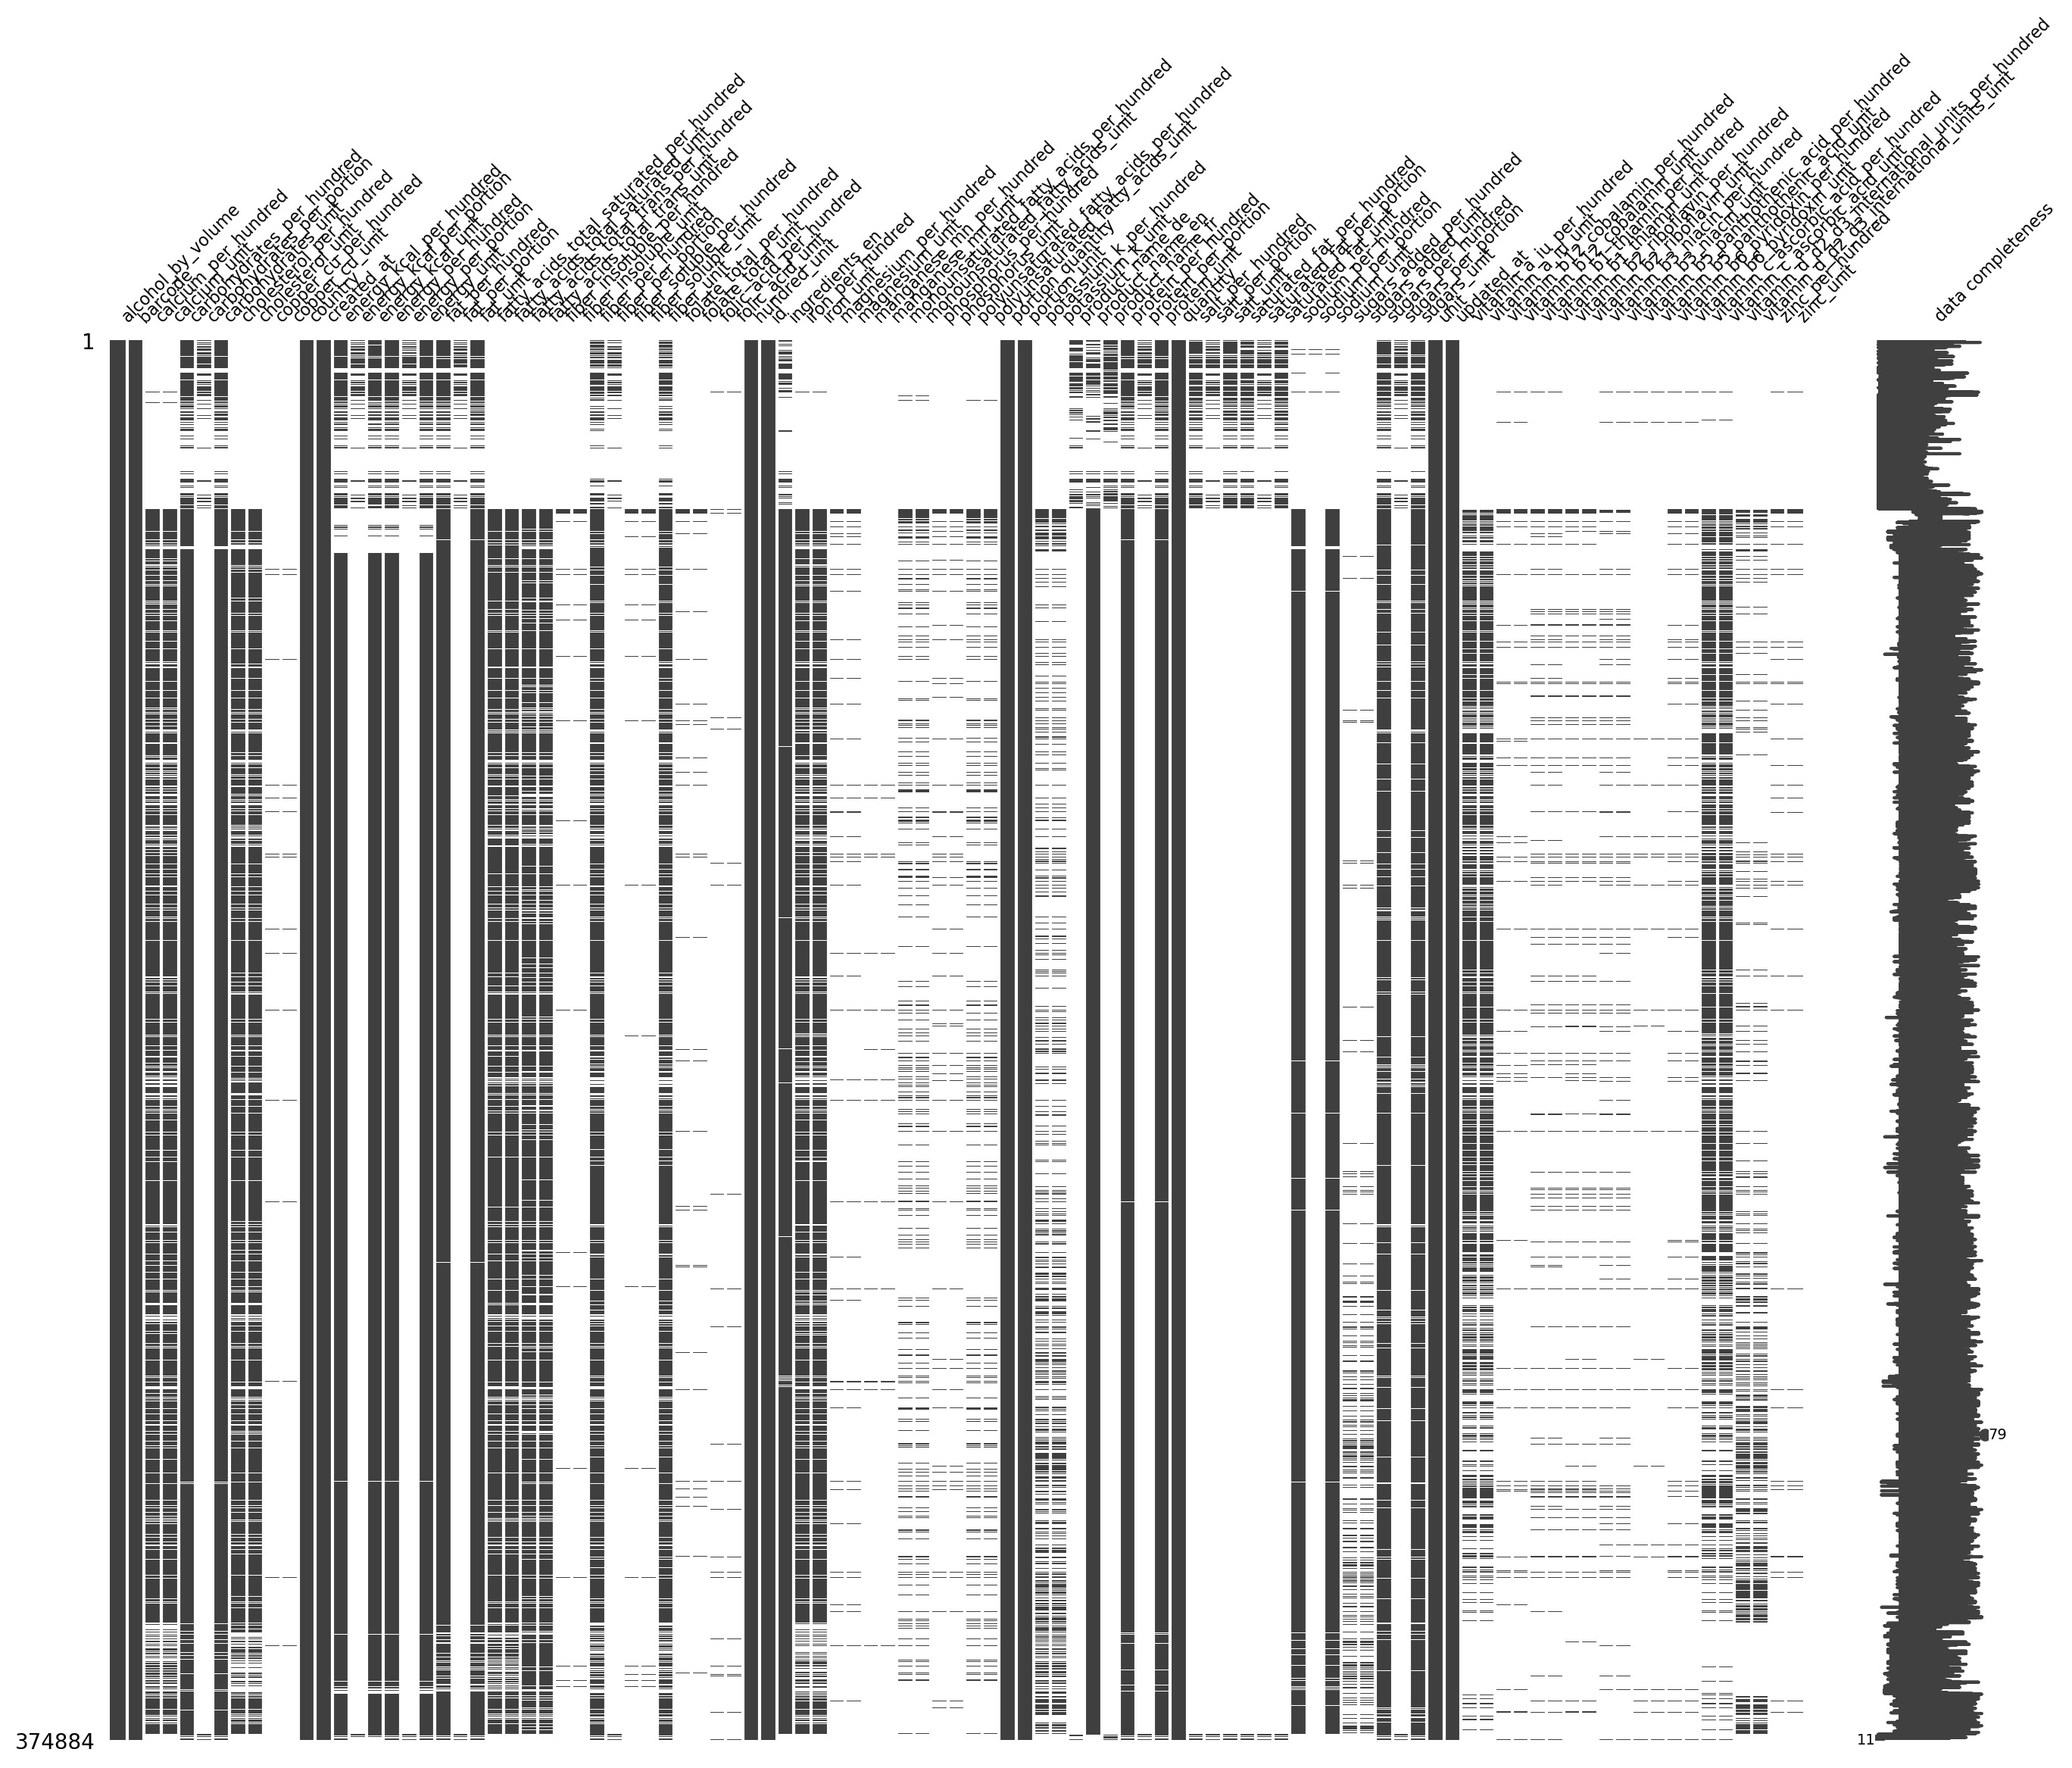

In [22]:
msno.matrix(df_raw2, figsize=(16,12), fontsize=8, labels=True)
plt.show()

<br/>**c. Create 3 lists that hold per_hundred, per_portion and _unit columns. Put the remaining column names in a 4th list named other columns. Note that you should create these 4 lists without manually selecting the column names. Next, create 4 line plots or bar charts that show the percentages of missing values in each list. (In addition, you can also use missingno on these 4 reduced data frames)**

I've updated the four dataframe subsets that I'd previously created to refelect the removal of duplicate entries using a for loop. All four variables now have the same sum of rows as *df_raw2*.

In [23]:
df_per_hundred = df_raw2.loc[:,[x for x in df_raw.columns if x.endswith("_per_hundred")]]

df_per_portion = df_raw2.loc[:,[x for x in df_raw.columns if x.endswith("_per_portion")]]

df_unit = df_raw2.loc[:,[x for x in df_raw.columns if x.endswith("_unit")]]

df_other_cols = df_raw2.loc[:,[x for x in df_raw.columns if not x.endswith("_per_hundred") 
                   and not x.endswith("_per_portion") and not x.endswith("_unit")]]

<br/>To easily infer and comment on data variability, the value of each bar is included across the four reduced dataframes. The sum of null values for each column is stored in a vairiable, and sorted in ascending order. The variable is subsequently converted to a list so as to enumerate each value to its corresponding bar by applying a for loop. 

Both Matplotlib and Missingno's bar funtion plot the count of missing values on nutrient measurements per hundred, per portion, and per unit. In addition, the total number of missing values in features that are ungrouped.

<br/>10 per hundred features have more than 200,000 missing values, and 15 per hundred features have at least 166,477 data points which is roughly 44% of a column's entries.

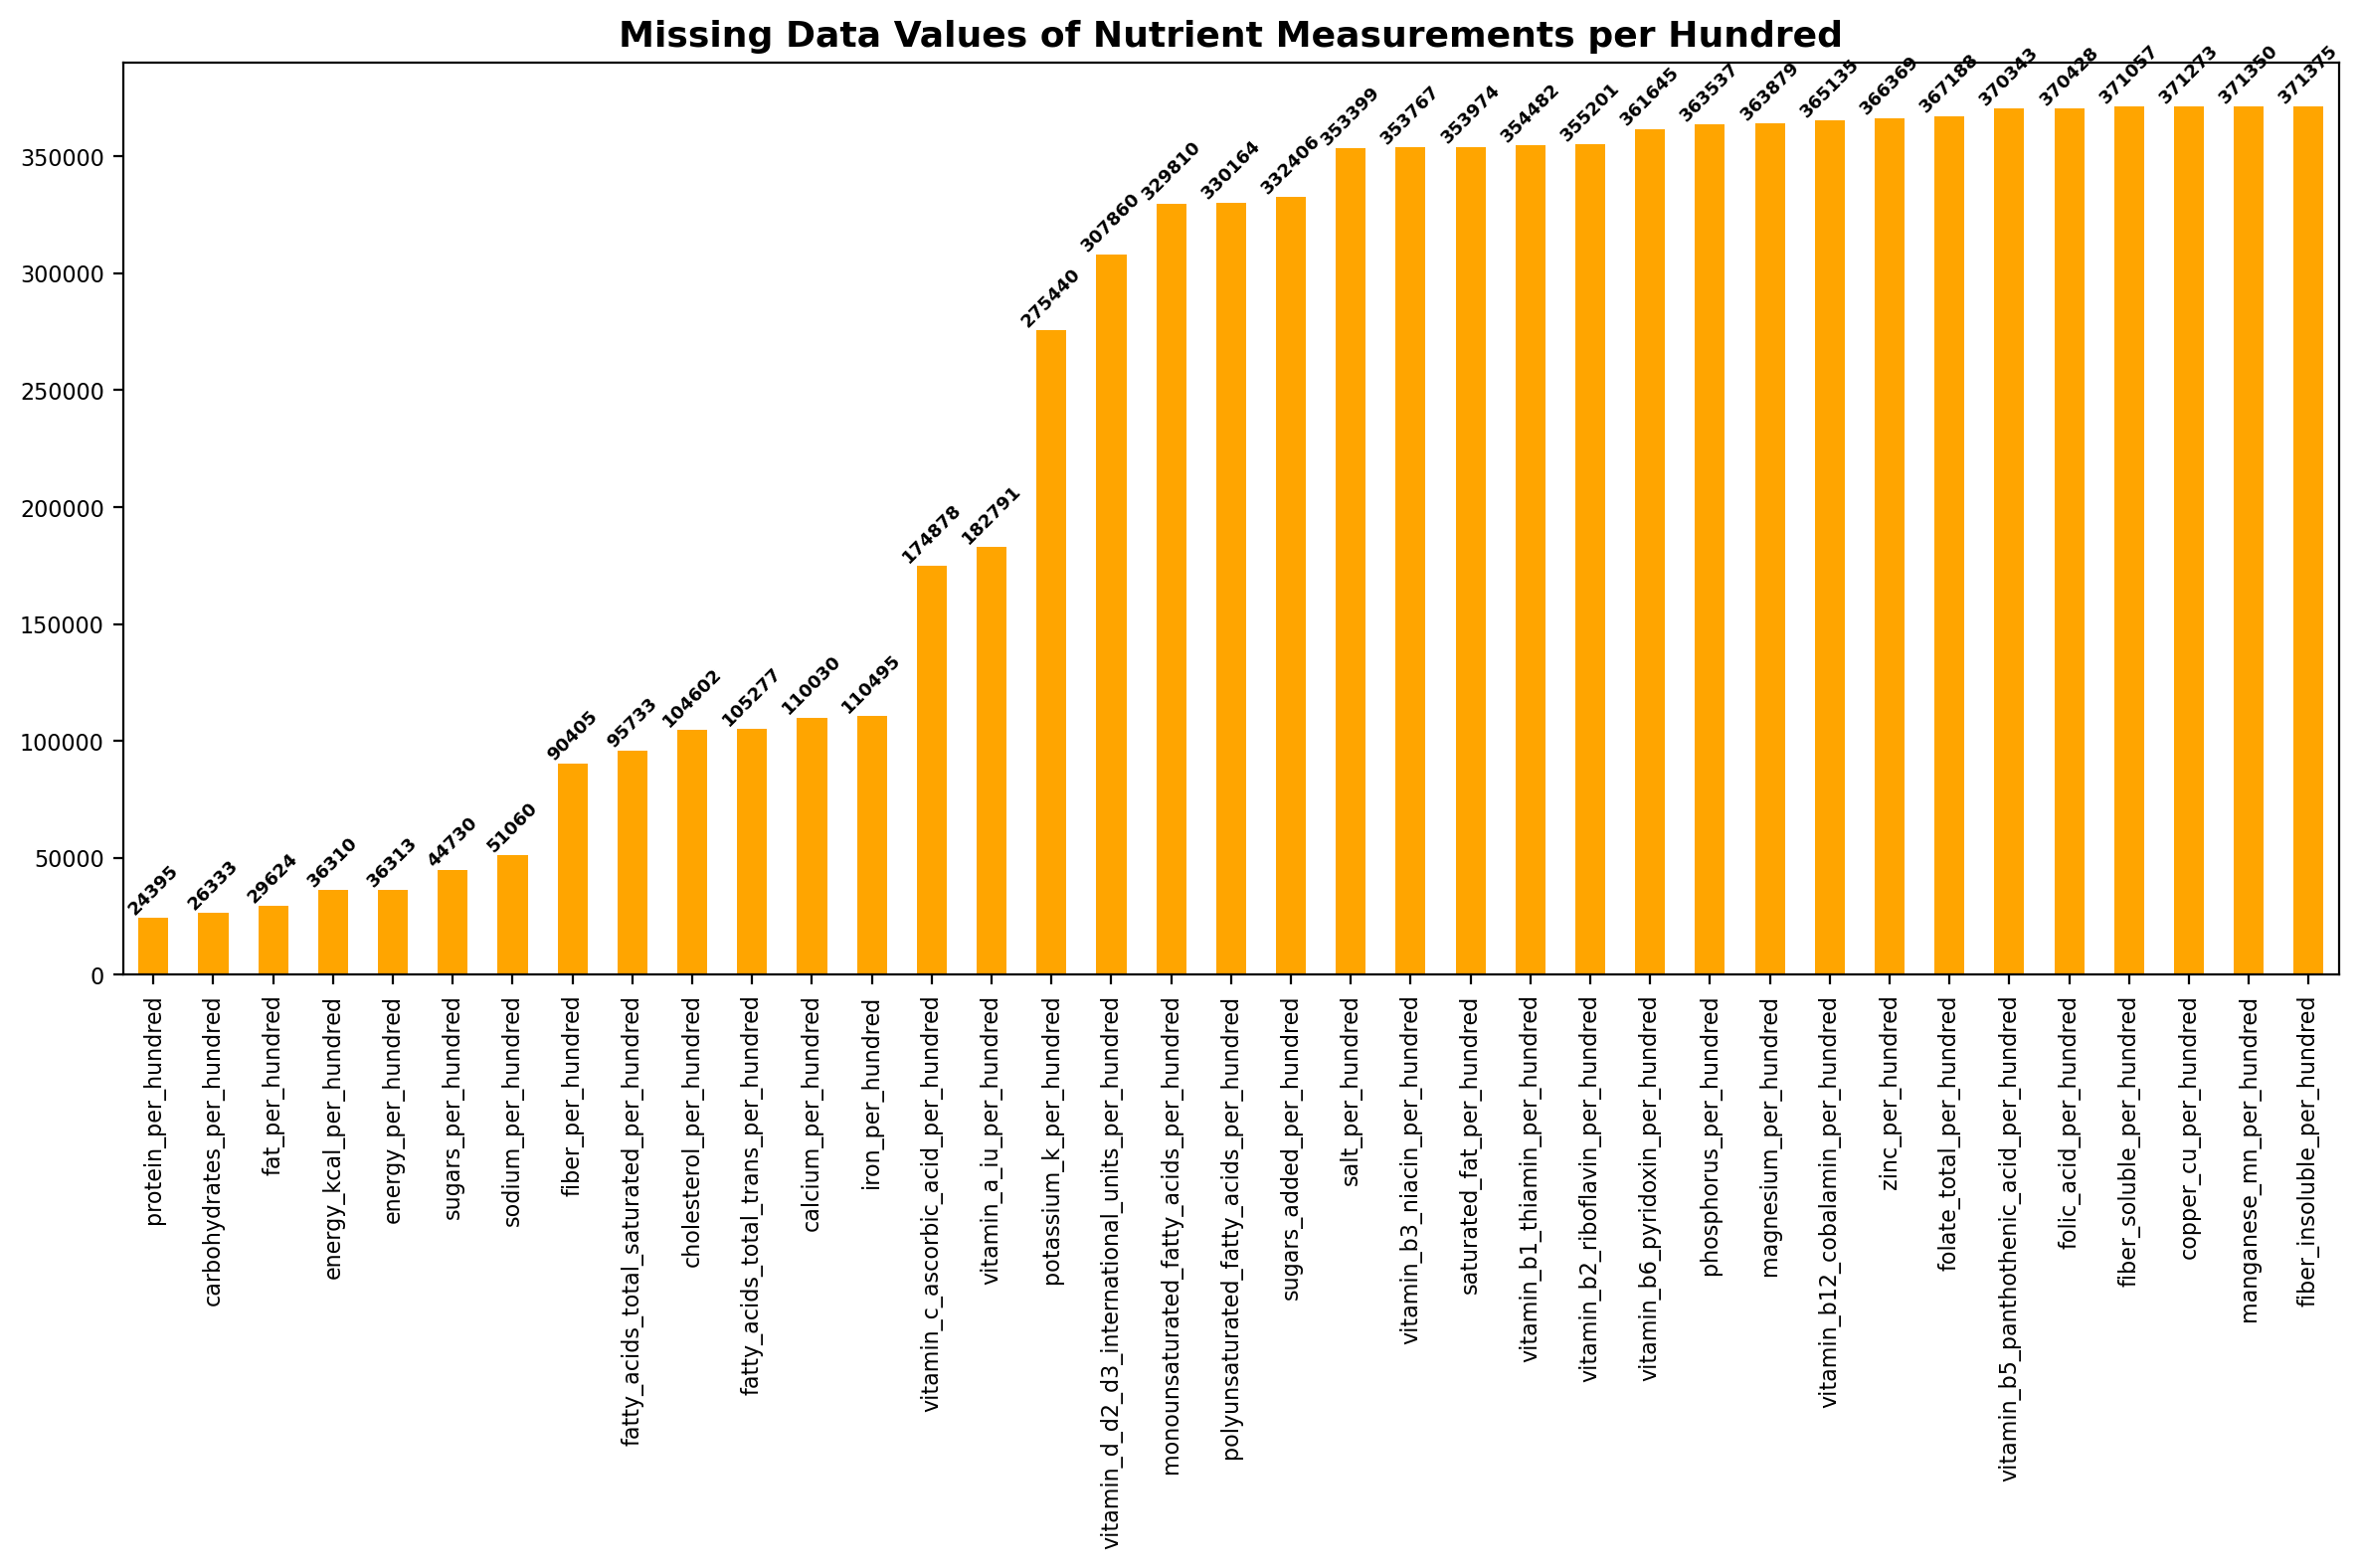

In [24]:
col_labels1 = df_per_hundred.isnull().sum().sort_values()

col_labels1 = col_labels1.to_list()

for i, value in enumerate(col_labels1):
    plt.text(i, value, str(value), ha="center", va="bottom", rotation=45, color="black", fontsize=6.5, fontweight="bold")

df_per_hundred.isnull().sum().sort_values().plot.bar(figsize=(12,8), fontsize=8, color="orange")

plt.title("Missing Data Values of Nutrient Measurements per Hundred", fontweight="bold", fontsize=13)
plt.tight_layout()
plt.show()

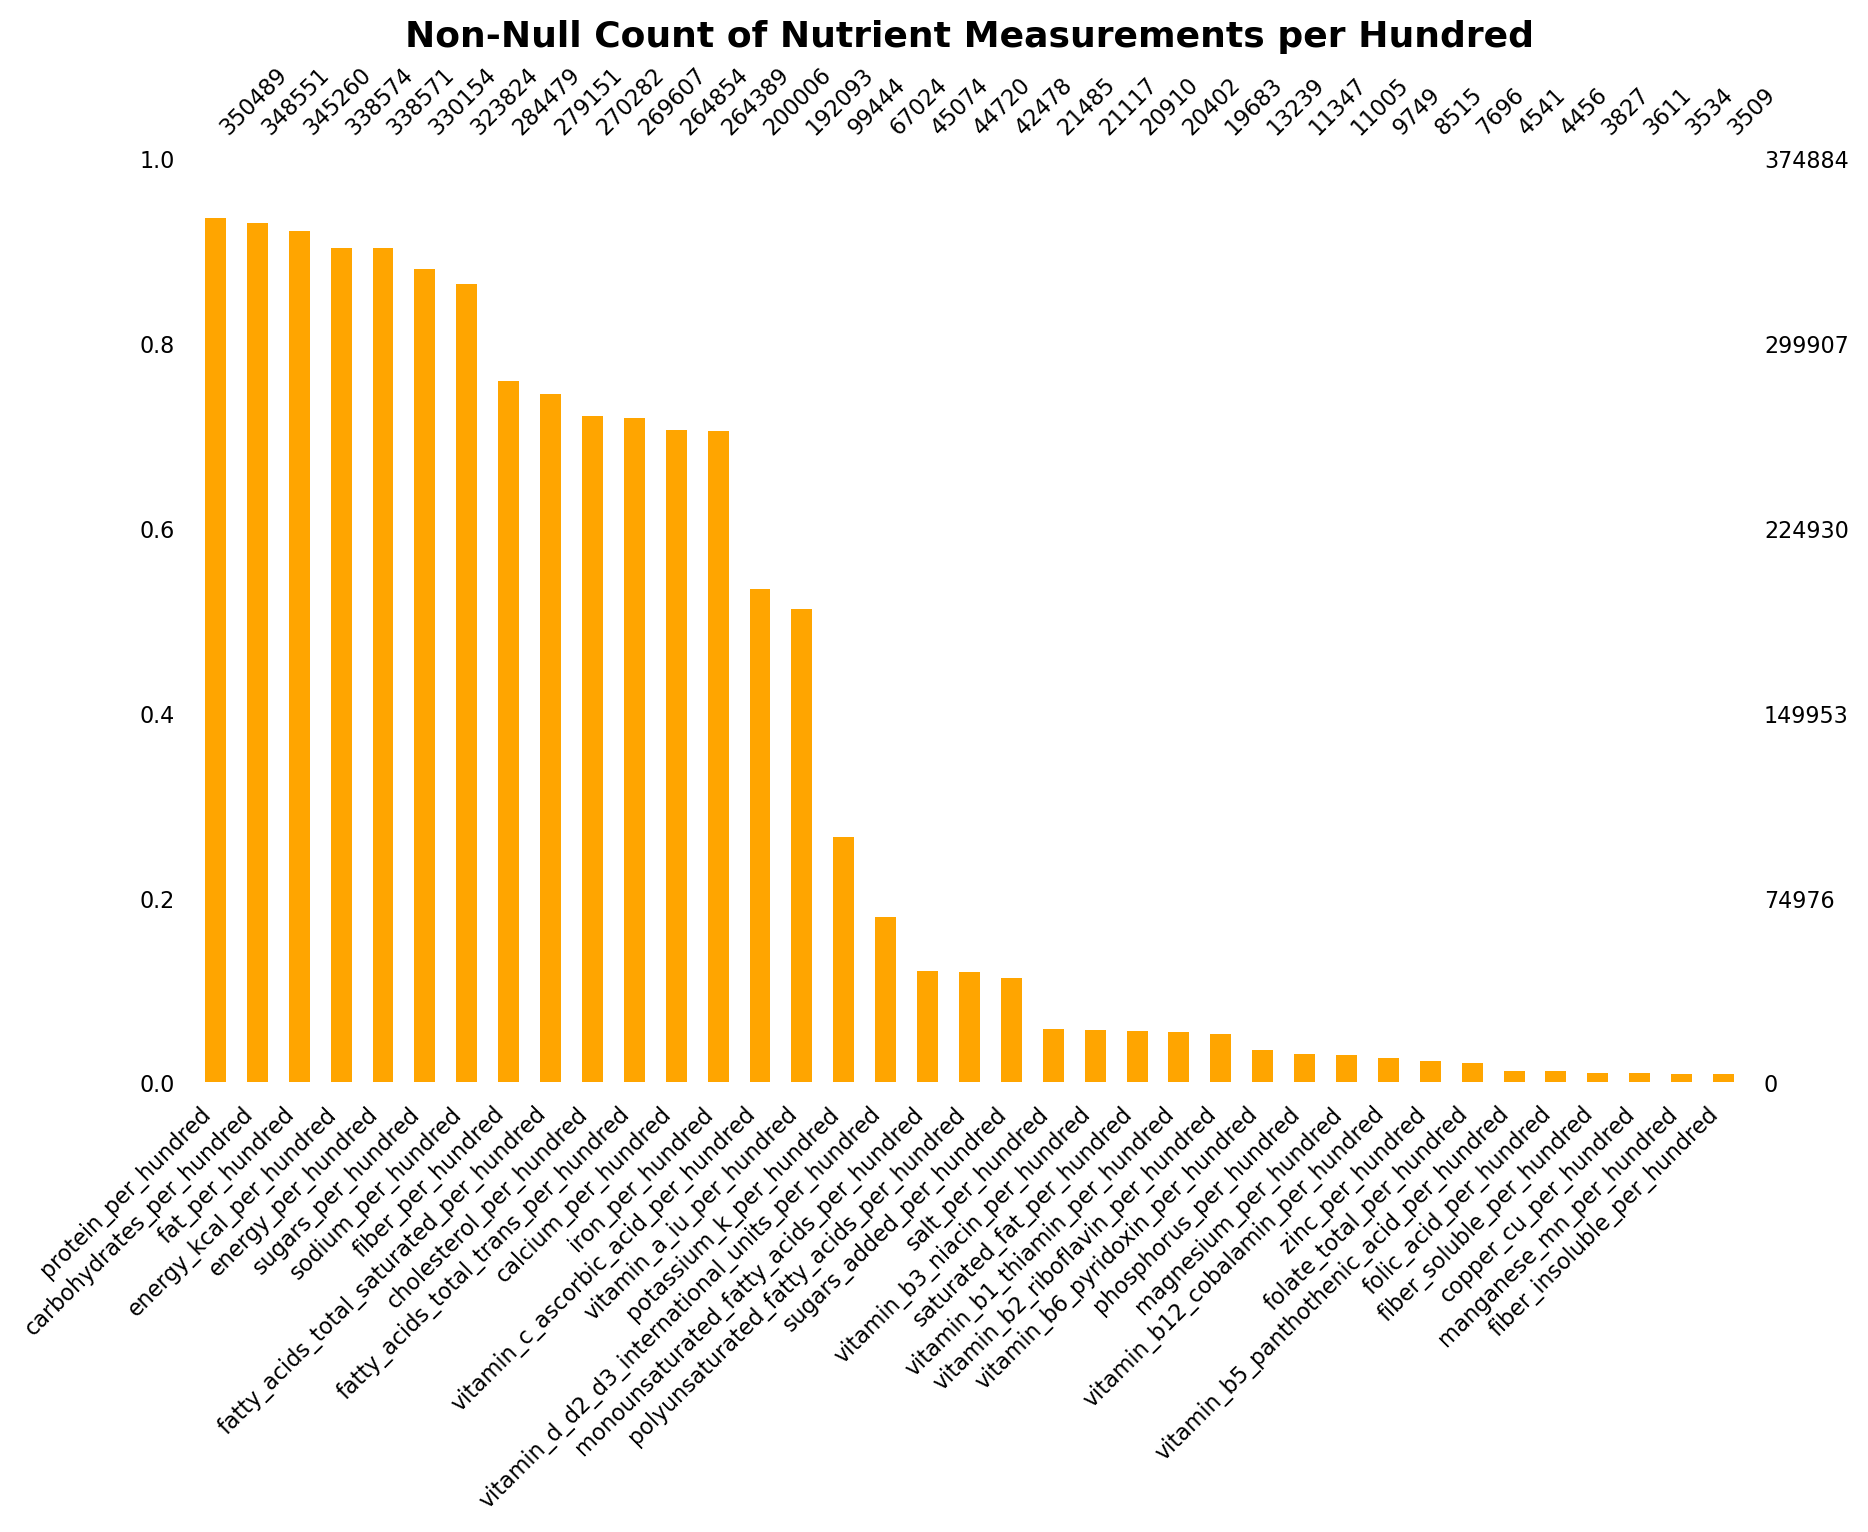

In [25]:
msno.bar(df_per_hundred, figsize=(10,6), sort="descending",  fontsize=8, color="orange")

plt.title("Non-Null Count of Nutrient Measurements per Hundred", fontweight="bold", fontsize=13)
plt.show()

All 10 features have atleast 364,478 missing values. Fat per portion has the most data points which is 10,406 or roughly 3% off all the column's entries.

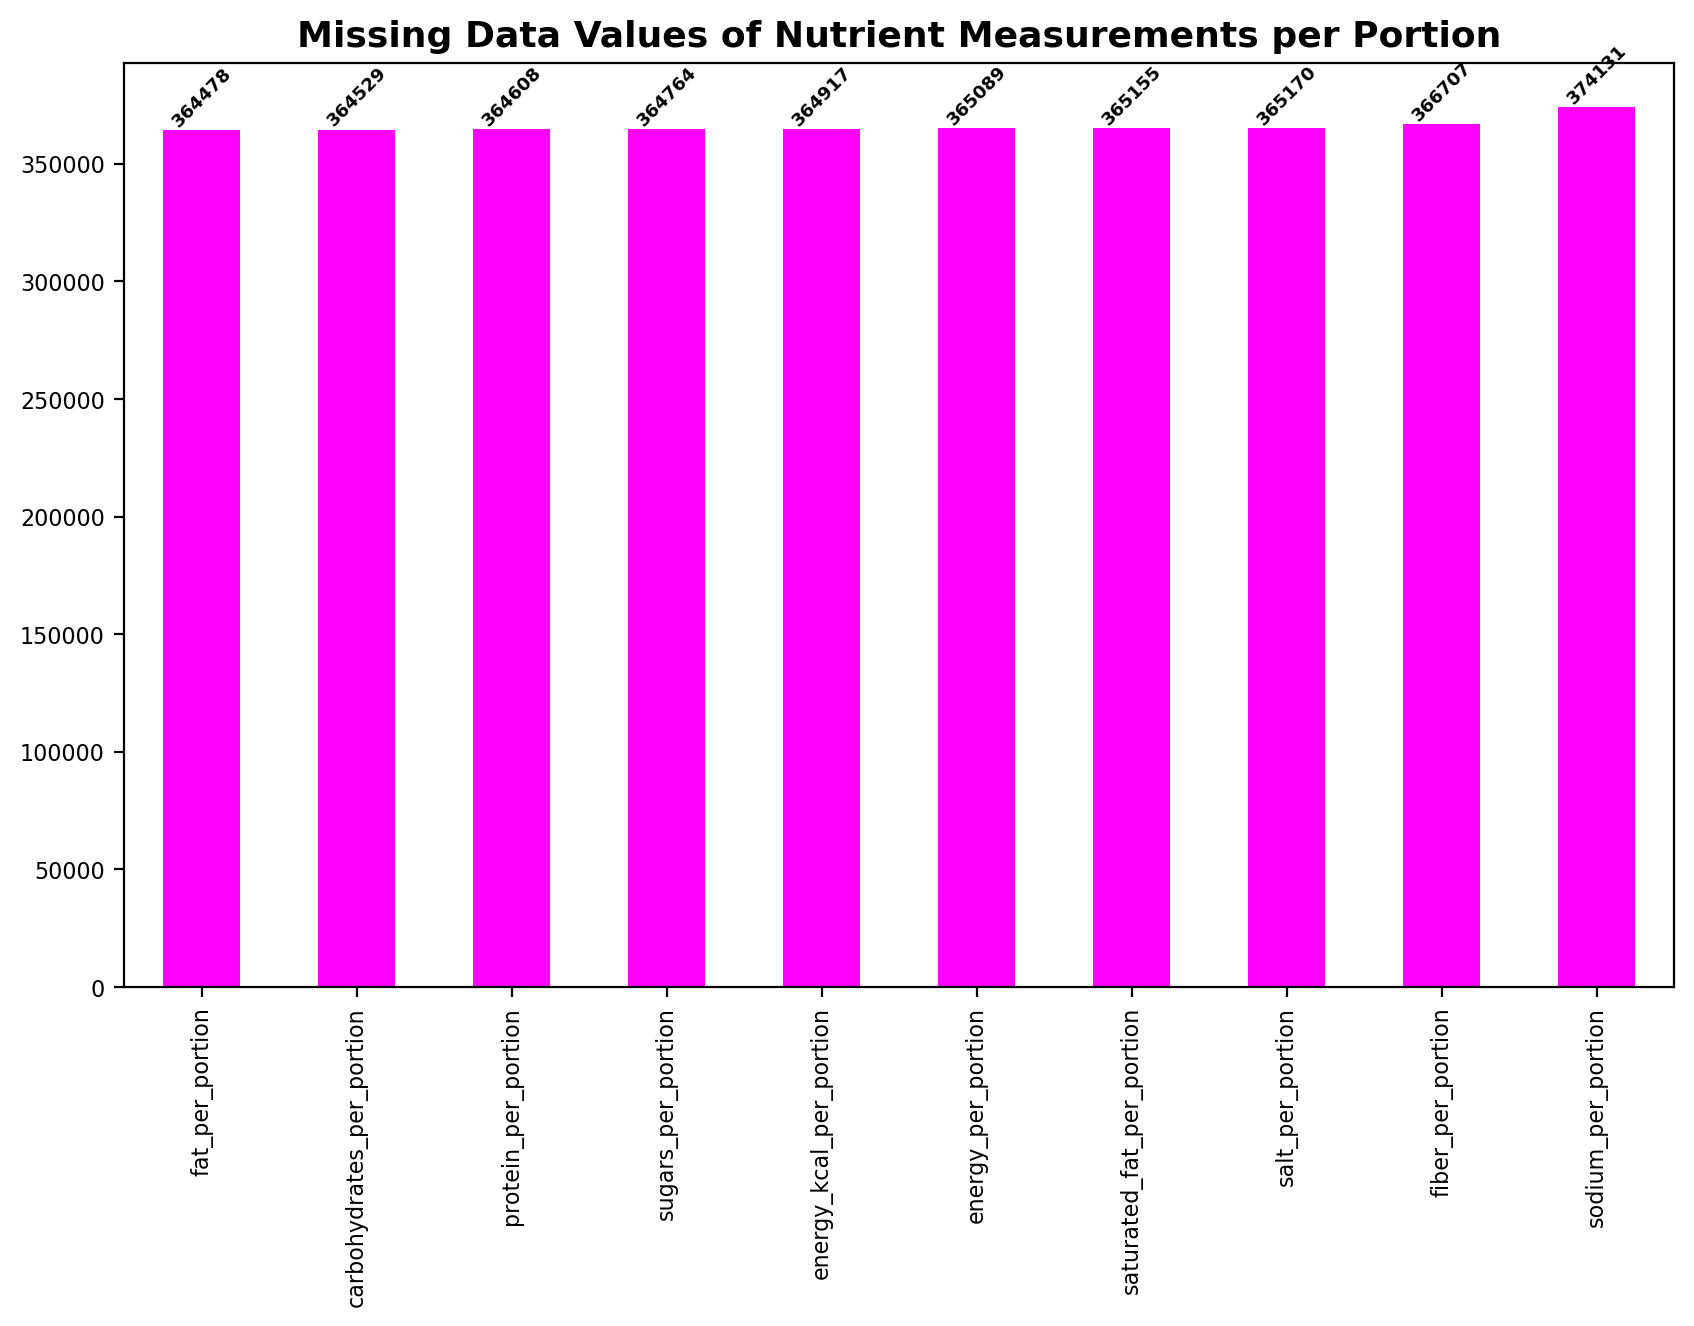

In [26]:
col_labels2 = df_per_portion.isnull().sum().sort_values()

col_labels2 = col_labels2.to_list()

for i, value in enumerate(col_labels2):
    plt.text(i, value, str(value), ha="center", va="bottom", rotation=45, color="black", fontsize=6.5, fontweight="bold")

df_per_portion.isnull().sum().sort_values().plot.bar(figsize=(10,6), fontsize=8, color="magenta")

plt.title("Missing Data Values of Nutrient Measurements per Portion", fontweight="bold", fontsize=13)
plt.show()

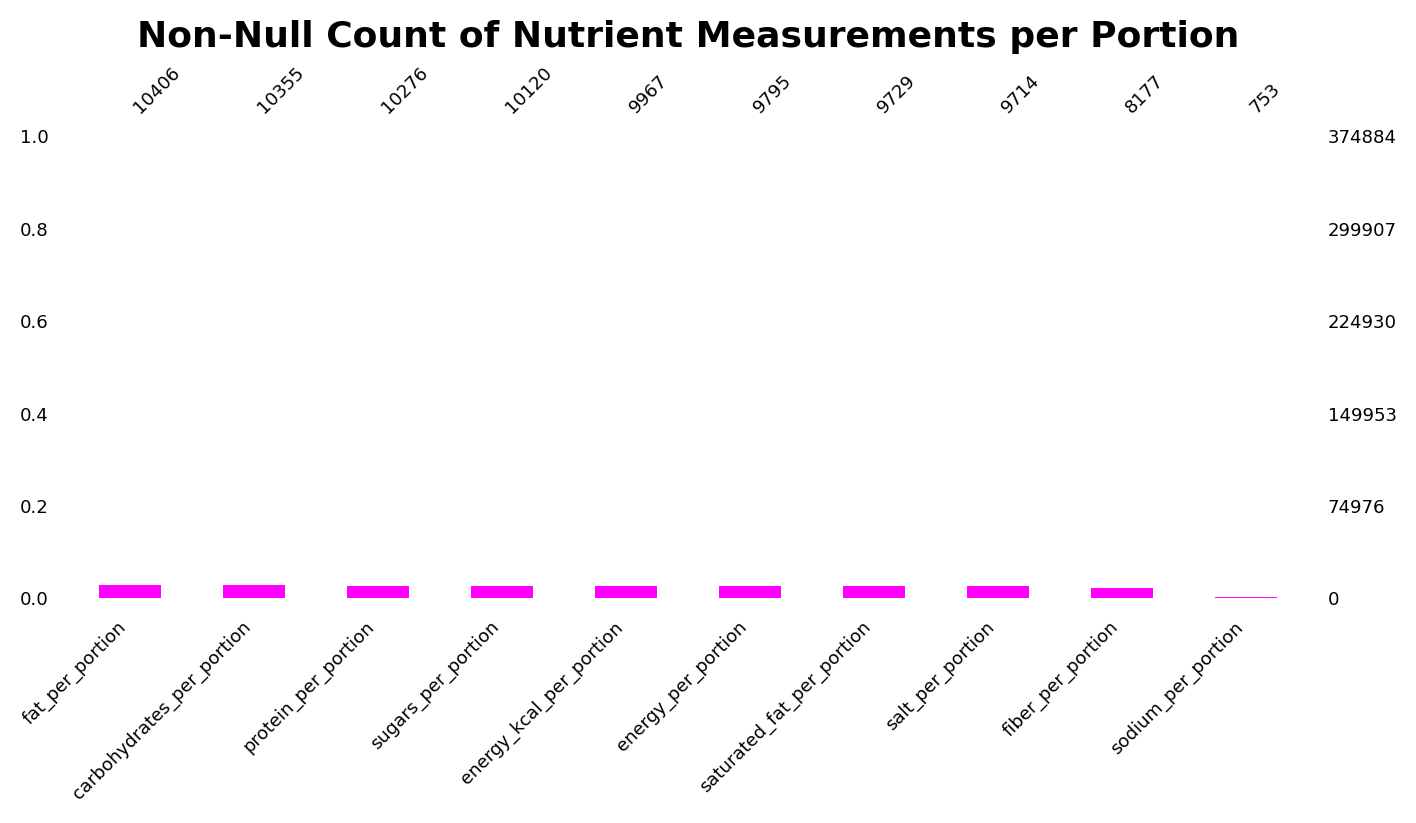

In [27]:
msno.bar(df_per_portion, figsize=(8,3), sort="descending", fontsize=6.5, color="magenta")
plt.title("Non-Null Count of Nutrient Measurements per Portion", fontweight="bold", fontsize=13)
plt.show()

<br/>21 per unit features have at least 275,410 missing values, whereas 18 per unit features have over 192,093 data points which is roughly 50% of a column's entries. 

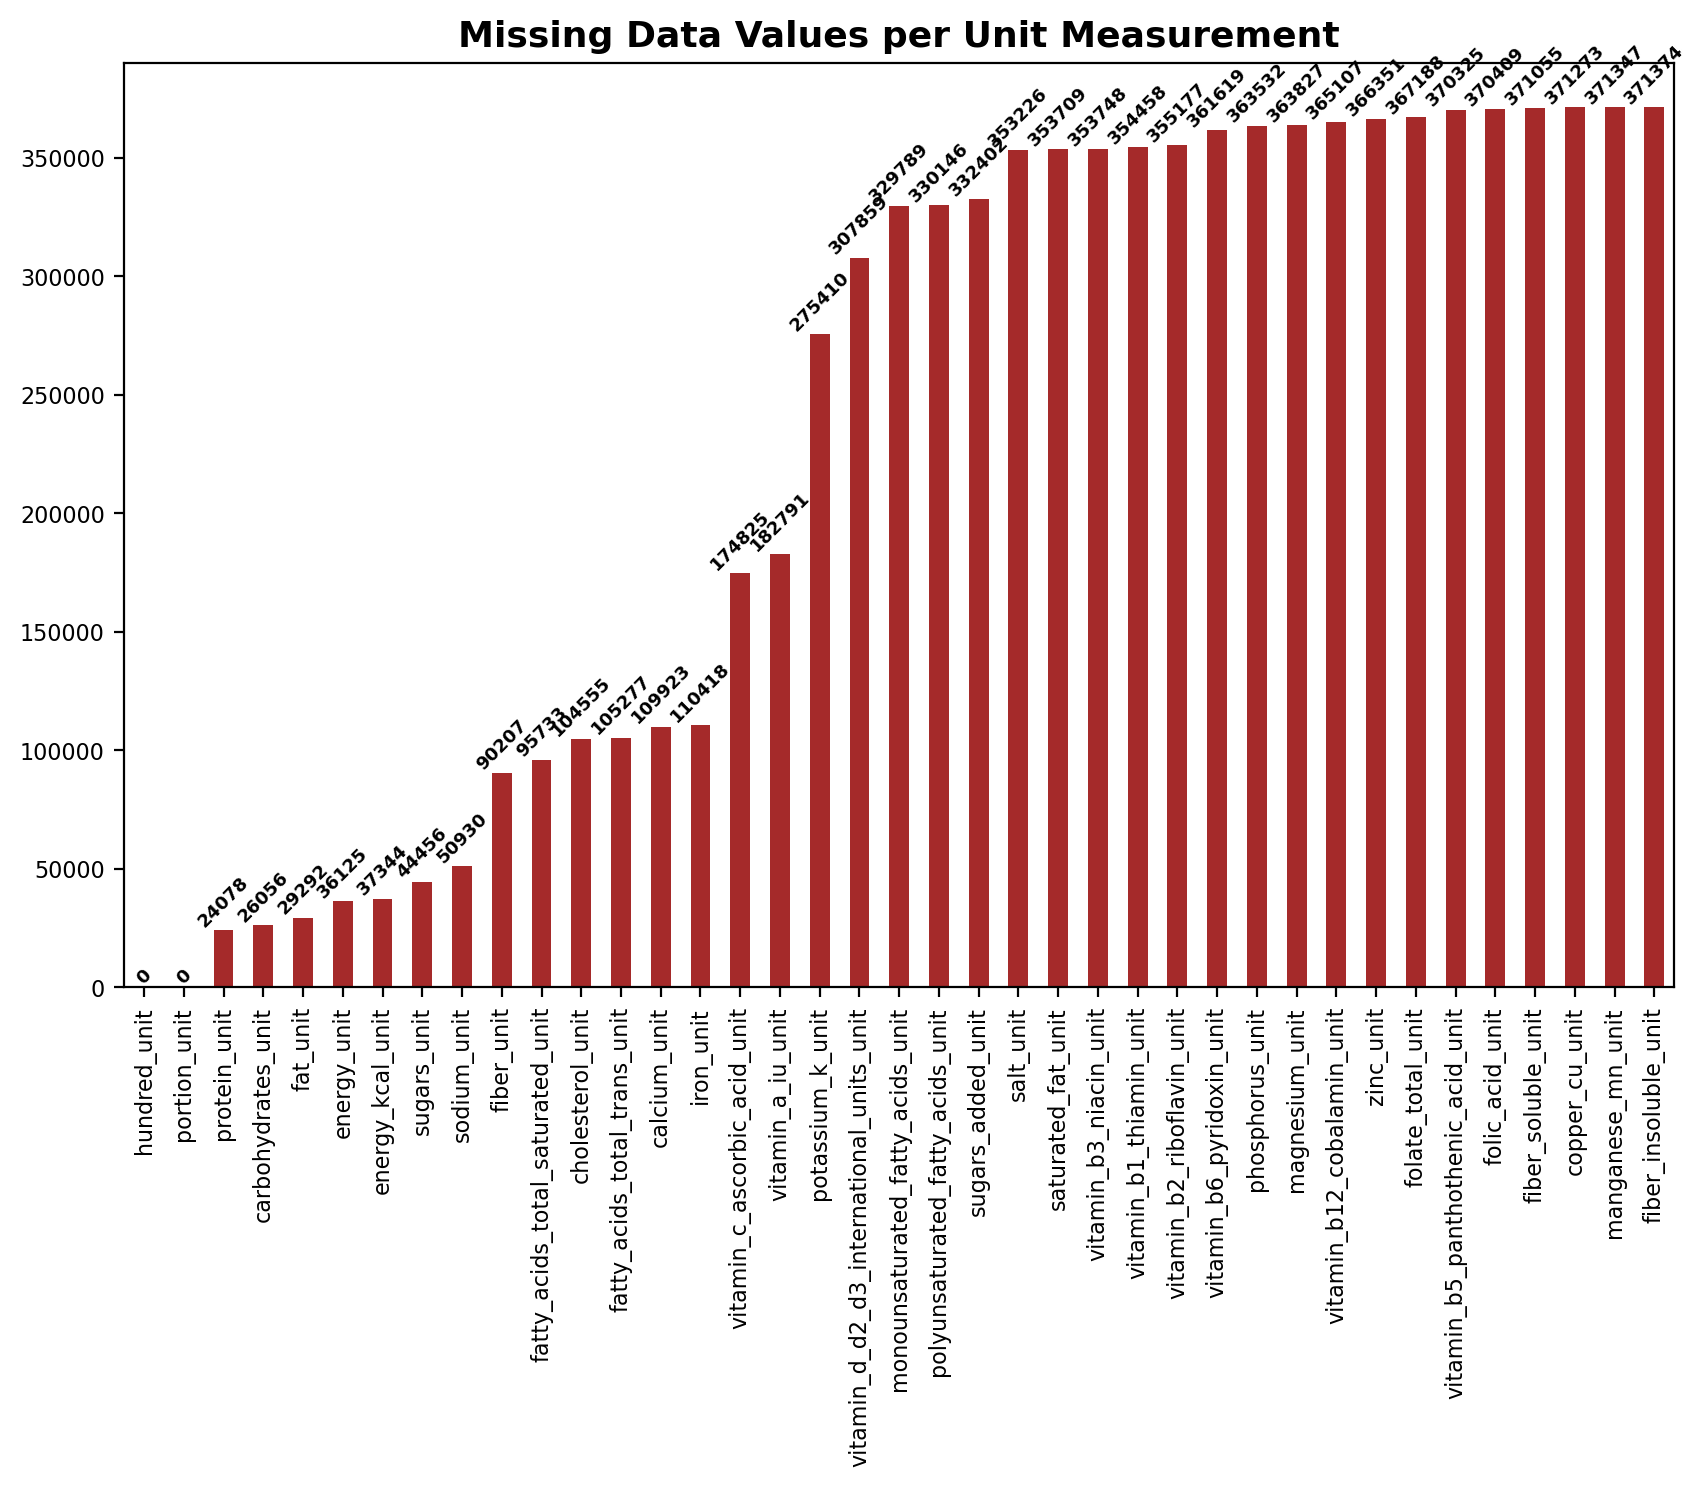

In [28]:
col_labels3 = df_unit.isnull().sum().sort_values()

col_labels3 = col_labels3.to_list()

for i, value in enumerate(col_labels3):
    plt.text(i, value, str(value), ha="center", va="bottom", rotation=45, color="black", fontsize=6.5, fontweight="bold")

df_unit.isnull().sum().sort_values().plot.bar(figsize=(10,6), fontsize=8, color="brown")

plt.title("Missing Data Values per Unit Measurement", fontweight="bold", fontsize=13)
plt.show()

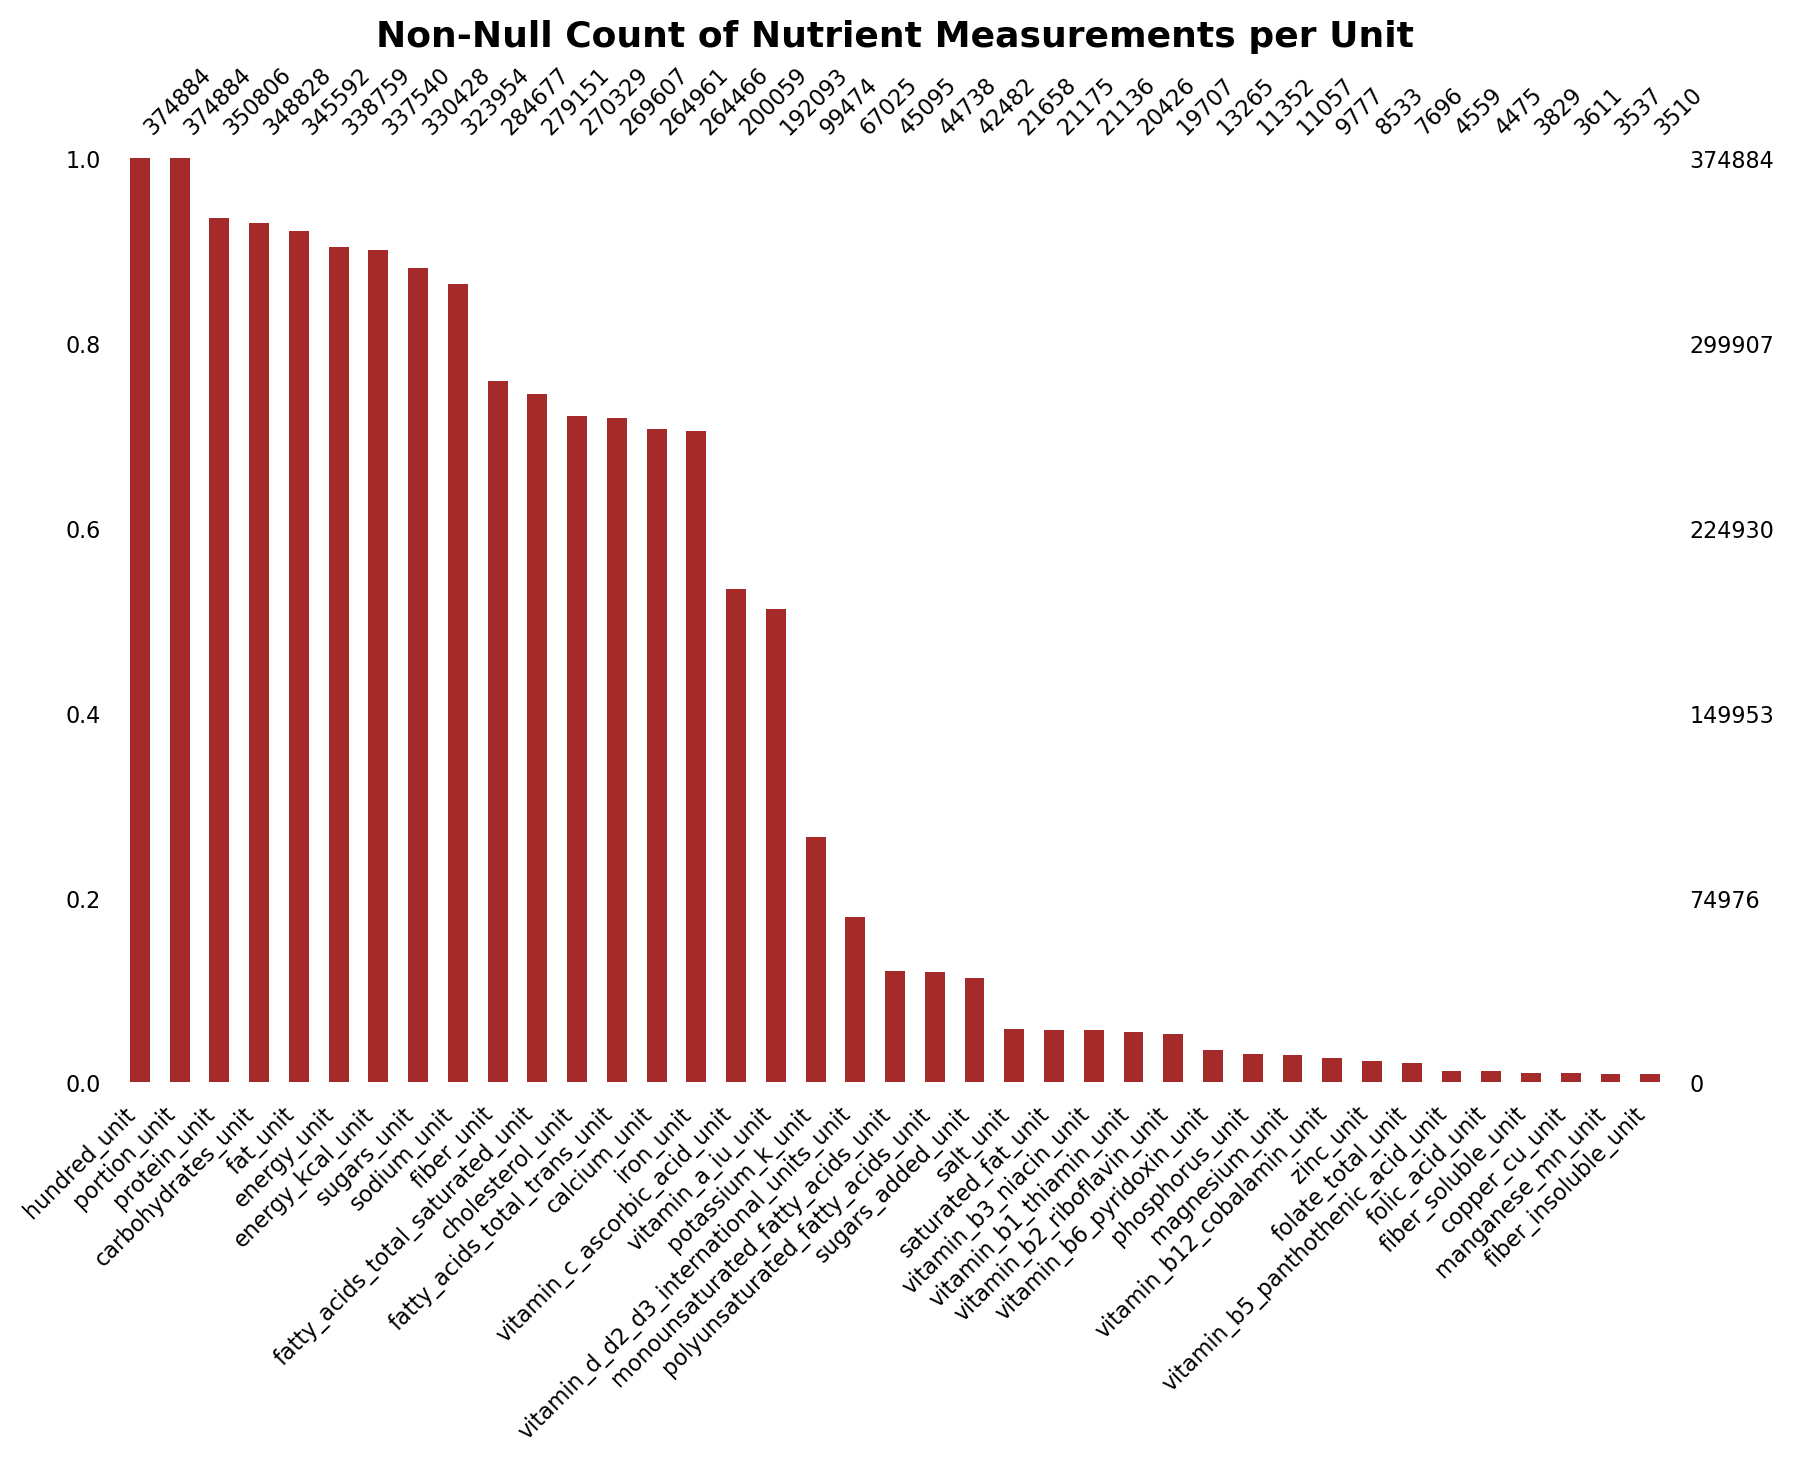

In [29]:
msno.bar(df_unit, figsize=(10,6), sort="descending", fontsize=8, color="brown")
plt.title("Non-Null Count of Nutrient Measurements per Unit", fontweight="bold", fontsize=13)
plt.show()

Noteably the features with products names in french and german have the most missing values. Roughly 6% of the data points are not null.

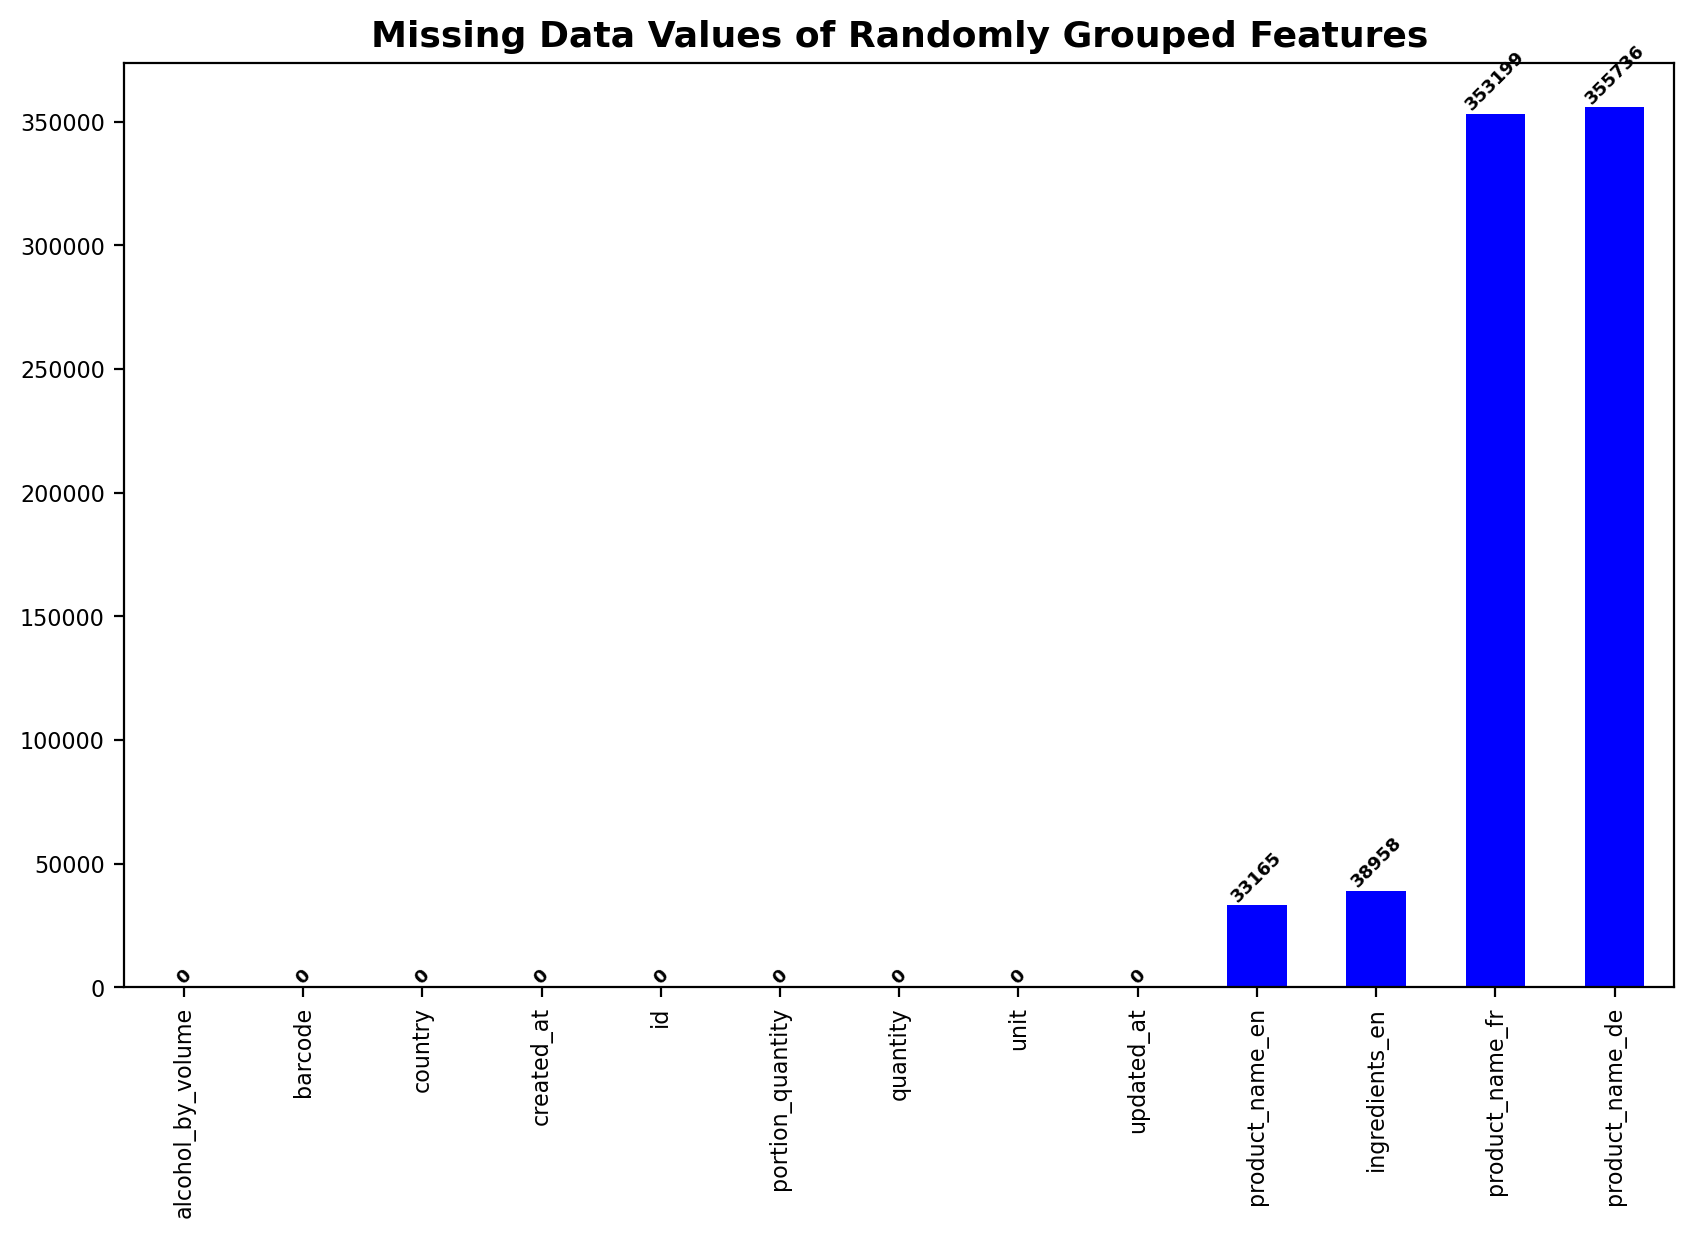

In [30]:
col_labels4 = df_other_cols.isnull().sum().sort_values()

col_labels4 = col_labels4.to_list()

for i, value in enumerate(col_labels4):
    plt.text(i, value, str(value), ha="center", va="bottom", rotation=45, color="black", fontsize=6.5, fontweight="bold")

df_other_cols.isnull().sum().sort_values().plot.bar(figsize=(10,6), fontsize=8, color="blue")

plt.title("Missing Data Values of Randomly Grouped Features", fontweight="bold", fontsize=13)
plt.show()

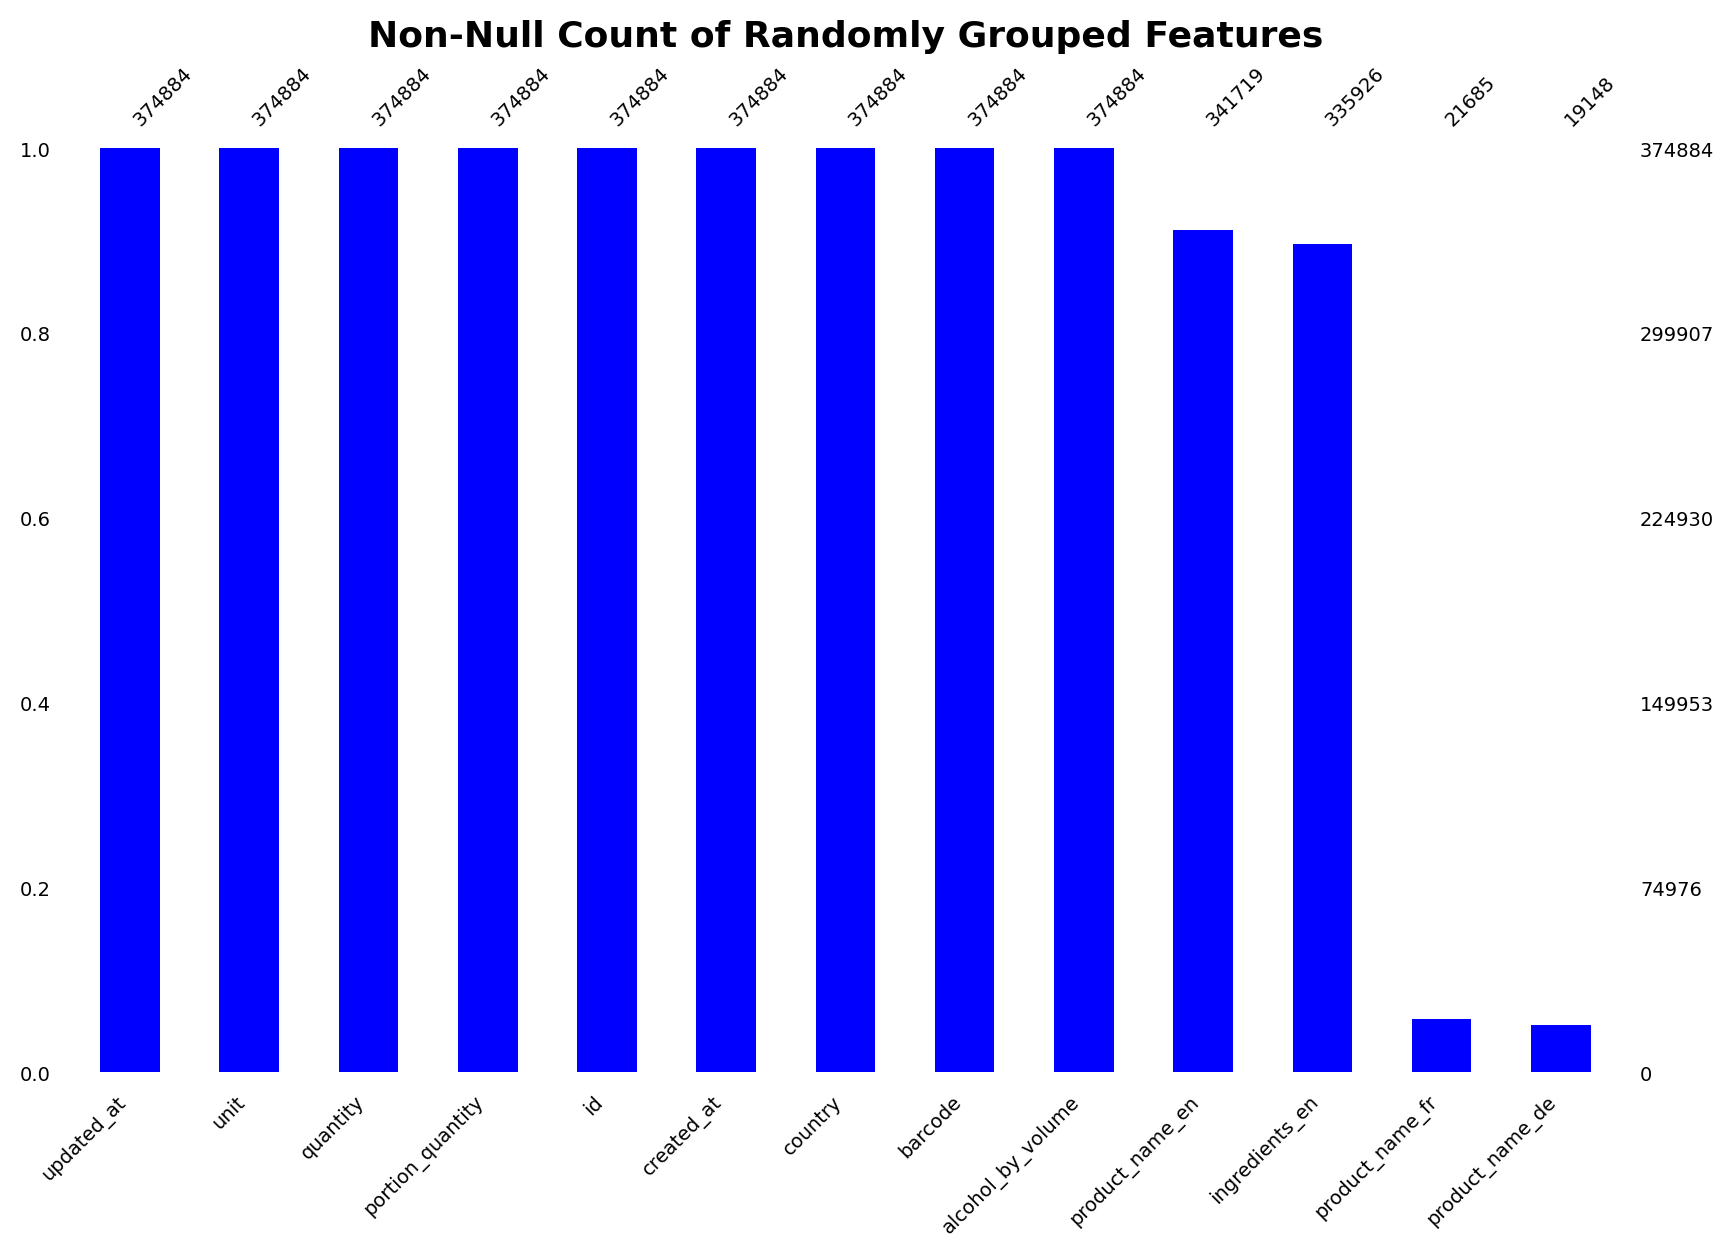

In [31]:
msno.bar(df_other_cols, figsize=(10,6), sort="descending", fontsize=7, color="blue")
plt.title("Non-Null Count of Randomly Grouped Features", fontweight="bold", fontsize=13)
plt.show()

**3) Now that you know the extent of missing values in the data, it is time to address them. Your goal is to keep as much data as possible in your data frame. At each step report how many samples and features remain**~

**a. As a first step, remove rows and columns that are completely empty (if there is any)**

The shape of the dataframe is unaltered when *.dropna()* is applied to remove rows with all NaN values.

In [32]:
df_raw2.dropna(how="all").shape

(374884, 99)

**b. Start with your list of _unit columns, and check some of them and show what information they hold. One simple approach to fill up missing values in categorical columns is to use the most frequent value as a proxy for the missing value. Apply this approach to the _unit columns**

##### **List of *_unit* columns**

To retrieve distinct categorical values for each column in the variable *df_unit*, Pandas *.notnull()* and *.head()* methods are used. Moreover, to output non-missing values from specific columns, the column name is included to return rows with input data. 

All columns can be viewd as Python's *with* statement together with pandas *.option_context()* temporarily displays all columns.

In [33]:
with pd.option_context('display.max_columns', None,):
 display(df_unit[df_unit["salt_unit"].notnull()].head(11))

calcium_unit carbohydrates_unit cholesterol_unit copper_cu_unit  \
1           NaN                  g              NaN            NaN   
2           NaN                  g              NaN            NaN   
4           NaN                  g              NaN            NaN   
6           NaN                  g              NaN            NaN   
7           NaN                  g              NaN            NaN   
8           NaN                  g              NaN            NaN   
9           NaN                  g              NaN            NaN   
10           mg                  g              NaN            NaN   
11          NaN                  g              NaN            NaN   
12          NaN                  g              NaN            NaN   
13          NaN                  g              NaN            NaN   

   energy_kcal_unit energy_unit fat_unit fatty_acids_total_saturated_unit  \
1              kCal          kJ        g                              NaN   
2              kCal          kJ        g                              NaN   
4              kCal          kJ        g                              NaN   
6              kCal          kJ        g                              NaN   
7              kCal          kJ        g                              NaN   
8              kCal          kJ        g                              NaN   
9              kCal          kJ        g                              NaN   
10             kCal          kJ        g                              NaN   
11              NaN         NaN      NaN                              NaN   
12             kCal          kJ        g                              NaN   
13             kCal          kJ        g                              NaN   

   fatty_acids_total_trans_unit fiber_insoluble_unit fiber_soluble_unit  \
1                           NaN                  NaN                NaN   
2                           NaN                  NaN                NaN   
4                           NaN                  NaN                NaN   
6                           NaN                  NaN                NaN   
7                           NaN                  NaN                NaN   
8                           NaN                  NaN                NaN   
9                           NaN                  NaN                NaN   
10                          NaN                  NaN                NaN   
11                          NaN                  NaN                NaN   
12                          NaN                  NaN                NaN   
13                          NaN                  NaN                NaN   

   fiber_unit folate_total_unit folic_acid_unit hundred_unit iron_unit  \
1           g               NaN             NaN            g       NaN   
2         NaN               NaN             NaN            g       NaN   
4           g               NaN             NaN            g       NaN   
6           g               NaN             NaN            g       NaN   
7           g               NaN             NaN            g       NaN   
8           g               NaN             NaN            g       NaN   
9         NaN               NaN             NaN            g       NaN   
10          g               NaN             NaN            g       NaN   
11          g               NaN             NaN            g       NaN   
12          g               NaN             NaN            g       NaN   
13          g               NaN             NaN            g       NaN   

   magnesium_unit manganese_mn_unit monounsaturated_fatty_acids_unit  \
1             NaN               NaN                              NaN   
2             NaN               NaN                              NaN   
4             NaN               NaN                              NaN   
6             NaN               NaN                              NaN   
7             NaN               NaN                              NaN   
8             N

<br/>Pandas *.loc[]* property selects all rows, and column names that have grams as a unit of measurement. NaN values are replaced with *g*. 

The code is applied to the variables *df_unit* and *df_raw2*.

In [34]:
df_unit.loc[:, ["carbohydrates_unit", "fat_unit", "fatty_acids_total_saturated_unit", 
                           "fatty_acids_total_trans_unit", "fiber_insoluble_unit", "fiber_soluble_unit",
                           "fiber_unit", "hundred_unit", "monounsaturated_fatty_acids_unit", 
                           "polyunsaturated_fatty_acids_unit", "portion_unit", "protein_unit", "sodium_unit",
                           "salt_unit", "saturated_fat_unit", "sugars_added_unit", "sugars_unit"]] = "g"

In [35]:
df_raw2.loc[:, ["carbohydrates_unit", "fat_unit", "fatty_acids_total_saturated_unit", 
                           "fatty_acids_total_trans_unit", "fiber_insoluble_unit", "fiber_soluble_unit",
                           "fiber_unit", "hundred_unit", "monounsaturated_fatty_acids_unit", 
                           "polyunsaturated_fatty_acids_unit", "portion_unit", "protein_unit", "sodium_unit",
                           "salt_unit", "saturated_fat_unit", "sugars_added_unit", "sugars_unit"]] = "g"

C:\Users\Admin\anaconda3\envs\adsml\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<br/>Pandas *.loc[]* property selects all rows, and column names that have miligram as a unit of measurement. NaN values are replaced with *mg*. 

The code is applied to the variables *df_unit* and *df_raw2*.

In [36]:
df_unit.loc[:, ["calcium_unit", "cholesterol_unit", "copper_cu_unit", "iron_unit",
                "magnesium_unit", "manganese_mn_unit", "phosphorus_unit", "potassium_k_unit",
                "vitamin_b1_thiamin_unit", "vitamin_b2_riboflavin_unit", "vitamin_b3_niacin_unit",
                "vitamin_b5_panthothenic_acid_unit", "vitamin_b6_pyridoxin_unit", "vitamin_c_ascorbic_acid_unit",
                "zinc_unit"]] = "mg"

In [37]:
df_raw2.loc[:, ["calcium_unit", "cholesterol_unit", "copper_cu_unit", "iron_unit",
                "magnesium_unit", "manganese_mn_unit", "phosphorus_unit", "potassium_k_unit",
                "vitamin_b1_thiamin_unit", "vitamin_b2_riboflavin_unit", "vitamin_b3_niacin_unit",
                "vitamin_b5_panthothenic_acid_unit", "vitamin_b6_pyridoxin_unit", "vitamin_c_ascorbic_acid_unit",
                "zinc_unit"]] = "mg"

<br/>Pandas *.loc[]* property selects all rows, and column names that have kilocalorie as a unit of measurement. NaN values are replaced with *kCal*. 

The code is applied to the variables *df_unit* and *df_raw2*.

In [38]:
df_unit["energy_kcal_unit"] = "kCal"

In [39]:
df_raw2["energy_kcal_unit"] = "kCal"

C:\Users\Admin\AppData\Local\Temp\ipykernel_25816\1968581882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw2["energy_kcal_unit"] = "kCal"


<br/>Pandas *.loc[]* property selects all rows, and column names that have kilojoule as a unit of measurement. NaN values are replaced with *kj*. 

The code is applied to the variables *df_unit* and *df_raw2*.

In [40]:
df_unit["energy_unit"] = "kj"

In [41]:
df_raw2["energy_unit"] = "kj"

C:\Users\Admin\AppData\Local\Temp\ipykernel_25816\3834804499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw2["energy_unit"] = "kj"


<br/>Pandas *.loc[]* property selects all rows, and column names that have microgram as a unit of measurement. NaN values are replaced with *µg*. 

The code is applied to the variables *df_unit* and *df_raw2*.

In [42]:
df_unit.loc[:, ["folate_total_unit", "folic_acid_unit", "vitamin_b12_cobalamin_unit"]] = "µg"

In [43]:
df_raw2.loc[:, ["folate_total_unit", "folic_acid_unit", "vitamin_b12_cobalamin_unit"]] = "µg"

<br/>Pandas *.loc[]* property selects all rows, and column names that have international unit as a unit of measurement. NaN values are replaced with *IU*. 

The code is applied to the variables *df_unit* and *df_raw2*.

In [44]:
df_unit.loc[:, ["vitamin_a_iu_unit", "vitamin_d_d2_d3_international_units_unit"]] = "IU"

In [45]:
df_raw2.loc[:, ["vitamin_a_iu_unit", "vitamin_d_d2_d3_international_units_unit"]] = "IU"

<br/>Pandas *.isnull()* method and the *.sum()* function check if the proxy values have been updated to the *df_unit* list, as well as columns that end with the string *_unit* in the variable *df_raw2* .

**df_unit**

In [46]:
print(f"Count of null values:", df_unit.isnull().sum().sum())

Count of null values: 0


<br/> **df_raw2**

In [47]:
print(f"Count of null values:", df_raw2.loc[:,[x for x in df_raw2.columns if x.endswith("_unit")]].isnull().sum().sum())

Count of null values: 0


<br/>**c. As a second strategy, let’s fill up the missing values of a column using other columns that hold similar information. Apply this approach to the product_name_en column. Find columns that hold similar information and use them to replace the missing value in product_name_en. Report the number of rows that you managed to fill up**

To fill missing NaN values between index **0** to **499**, pandas *.loc[]* property is iteratively applied to select, and update the specified row and column. The approach to streamline sifting through the data includes:

*  reviewing 20 rows at a time,
*  Google translating the *product_name_de* or *product_name_fr* string from German or French to English, and
*  updating the column *product_name_en* with the respective English name.

Pandas function *.set_option()* will be applied temporarily to ensure that output string values can be fully displayed.

In [48]:
pd.set_option('display.max_colwidth', None)

In [49]:
df_raw2.loc[:, ["product_name_en", "product_name_de", "product_name_fr"]][0:30]

product_name_en  \
0                                      Bio Spaghetti    
1                               Naturaplan Mozzarella   
2          Caffè Mauro - Roasted organic coffee blend   
3             Le chocolat Cailler -  chocolate powder   
4                 Naturaplan Extra Dark Chocolate 70%   
5                                                 NaN   
6                                           Toblerone   
7                                       Knöpfli flour   
8                        Naturaplan Bio Flower Honey    
9                                           Maltesers   
10                        Rhythm 108 coconut macaroon   
11                          Rythm 108 - banana muffin   
12                             Naturaplan Apricot Jam   
13                   Proper corn : Lightly Sea Salted   
14                      Proper Corn – Sweet and Salty   
15               Proper corn, sweet Coconut & Vanilla   
16                                                NaN   
17              RYTHM 108 : good-for-you, dessert bar   
18                                                NaN   
19             Rhythm 108 : good-for-you, dessert bar   
20                                Mani Sweet Cocktail   
21  Michel et Augustin : Great melting  heart cookies   
22                        Spur: orange juice & banana   
23                    Spur: orange juice & strawberry   
24         Spur: Orange juice, grapefruit & raspberry   
25                             gingo : GINGER + LEMON   
26                                                NaN   
27                                                NaN   
28                                                NaN   
29                         OPALINE: APPLES AND SUREAU   

                                 product_name_de  \
0                                Bio Spaghetti     
1                          Naturaplan Mozzarella   
2                       Caffè Mauro - Bio Kaffe    
3       Le chocolat Cailler -  schokoladenpulver   
4          Naturaplan ExtraDunkle Schokolade 70%   
5                          Cailler - Kakaopulver   
6                                      Toblerone   
7                                    Knöpflimehl   
8                     Naturaplan Bio Blütenhonig   
9                                            NaN   
10                   Rhythm 108 Kokosnussmakrone   
11                     Rythm 108 - banana muffin   
12                 Naturaplan Konfitüre Aprikose   
13                                           NaN   
14                                           NaN   
15                                           NaN   
16                     Naturaplan : Mehrkornmehl   
17           RHYTHM 108: Gut für Sie, Dessertbar   
18                        naturaplan : Himbeeren   
19        Rhythm 108 : good-for-you, dessert bar   
20                                           NaN   
21  Michel und Augustin: Super Fondant Plätzchen   
22                  Spur: Orangensaft und Banane   
23                Spur: Orangensaft und Erdbeere   
24    Spur: Orangensaft, Grapefruit und Himbeere   
25                       gingo: GINGER + ZITRONE   
26                                           NaN   
27                                           NaN   
28                                           NaN   
29                     OPALINE: ÄPFEL UND SUREAU   

                                     product_name_fr  
0                                      Spaghetti Bio  
1                              Naturaplan Mozzarella  
2                            Caffè Mauro - café bio   
3          Le chocolat Cailler - chocolat en poudre   
4                 Naturaplan Chocolat extra noir 70%  
5                          Cailler - Poudre de cacao  
6                                          Toblerone  
7                               Farine pour knoepfli  
8                      Naturaplan Miel de fleurs Bio  
9                                                NaN  
10              Rhythm 108 macaron à la noix de coco

In [50]:
df_raw2.loc[5, "product_name_en"] = "Cailler - Cocoa powder"

C:\Users\Admin\anaconda3\envs\adsml\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [51]:
df_raw2.loc[16, "product_name_en"] = "Naturaplan: Multi-grain flour"

In [52]:
df_raw2.loc[18, "product_name_en"] = "naturaplan: Raspberries, jam"

In [53]:
df_raw2.loc[26, "product_name_en"] = "OPALINE: APRICOTS"

In [54]:
df_raw2.loc[27, "product_name_en"] = "OPALINE - APPLES AND PEARS"

In [55]:
df_raw2.loc[28, "product_name_en"] = "OPALINE: APPLES AND ELDERBERRY"

In [56]:
df_raw2.loc[52, "product_name_en"] = "Barilla: Gemelli Pomodoro E Ricotta (Tomato and ricotta sauce)"

In [57]:
df_raw2.loc[53, "product_name_en"] = "Barilla : Fusilli al Pesto"

In [58]:
df_raw2.loc[54, "product_name_en"] = "Uncle Ben's: Mediterranean"

In [59]:
df_raw2.loc[56, "product_name_en"] = "Cenovis"

In [60]:
df_raw2.loc[57, "product_name_en"] = "TROTTET coffees: MOCCA LUXE"

In [61]:
df_raw2.loc[58, "product_name_en"] = "THE SOWER: MOCCA"

In [62]:
df_raw2.loc[71, "product_name_en"] = "Knorr : Quick soup, Croutons"

In [63]:
df_raw2.loc[72, "product_name_en"] = "Knorr : Quick soup, vegetables"

In [64]:
df_raw2.loc[73, "product_name_en"] = "St. DALFOUR: Oranges with peel"

In [65]:
df_raw2.loc[74, "product_name_en"] = "Knorr: Quick soup, asparagus"

In [66]:
df_raw2.loc[75, "product_name_en"] = "St. DALFOUR: Wild Blueberries"

In [67]:
df_raw2.loc[76, "product_name_en"] = "Knorr: sweetness of autumn vegetables and a hint of cream"

In [68]:
df_raw2.loc[102, "product_name_en"] = "PANZANI : Penne ball's bolognese"

In [69]:
df_raw2.loc[103, "product_name_en"] = "Belle France: Chicken and Beef Couscous"

In [70]:
df_raw2.loc[104, "product_name_en"] = "Zapetti: Paella Valenciana, Chicken, Seafood & Chorizo"

In [71]:
df_raw2.loc[105, "product_name_en"] = "Belle France: Royal paella"

In [72]:
df_raw2.loc[106, "product_name_en"] = "Belle France: Lasagne Bolognese"

In [73]:
df_raw2.loc[107, "product_name_en"] = "Belle France: Salmon with sorrel"

In [74]:
df_raw2.loc[108, "product_name_en"] = "Belle France: Hake, lemon sauce"

In [75]:
df_raw2.loc[113, "product_name_en"] = "PANZANI"

In [76]:
df_raw2.loc[122, "product_name_en"] = "granini: Fruit cocktail"

In [77]:
df_raw2.loc[128, "product_name_en"] = "RAMSEIER: HAUTE-TIGE, unfiltered apple and pear juice"

In [78]:
df_raw2.loc[139, "product_name_en"] = "rivella"

In [79]:
df_raw2.loc[140, "product_name_en"] = "RAMSEIER : HOCHSTÄMMER, naturally cloudy fruit juice"

In [80]:
df_raw2.loc[141, "product_name_en"] = "Valser - Silence, quiet and gentle"

In [81]:
df_raw2.loc[142, "product_name_en"] = "RAMSEIER : SWEET MOST, natural"

In [82]:
df_raw2.loc[143, "product_name_en"] = "Evian - Sport"

In [83]:
df_raw2.loc[144, "product_name_en"] = "Belle France: SYRUP, Orange"

In [84]:
df_raw2.loc[145, "product_name_en"] = "Belle France: Lentils, cooked"

In [85]:
df_raw2.loc[146, "product_name_en"] = "Belle France: Lentils, cooked"

In [86]:
df_raw2.loc[147, "product_name_en"] = "Kellogs Special K: Crispy Bars: Red Fruits"

In [87]:
df_raw2.loc[148, "product_name_en"] = "ültje: smoked almonds"

In [88]:
df_raw2.loc[150, "product_name_en"] = "familia - c.m. plus genuine"

In [89]:
df_raw2.loc[151, "product_name_en"] = "ültje: peanuts"

In [90]:
df_raw2.loc[152, "product_name_en"] = "Body balance : blueberries & pecans"

In [91]:
df_raw2.loc[153, "product_name_en"] = "Belle France: Corn flakes, glazed with sugar"

In [92]:
df_raw2.loc[154, "product_name_en"] = "Belle France: Cornflakes"

In [93]:
df_raw2.loc[155, "product_name_en"] = "Belle France: Puffed wheat, with honey"

In [94]:
df_raw2.loc[156, "product_name_en"] = "Kellogg's: Treasure"

In [95]:
df_raw2.loc[157, "product_name_en"] = "Lion: Caramel and Chocolate"

In [96]:
df_raw2.loc[159, "product_name_en"] = "Nesquik: Puffed rice"

In [97]:
df_raw2.loc[160, "product_name_en"] = "Belle France: Salty Microwavable Popcorn"

In [98]:
df_raw2.loc[161, "product_name_en"] = "AARBERG: Sugar cubes"

In [99]:
df_raw2.loc[162, "product_name_en"] = "Belle France: Sweet Microwavable Popcorn"

In [100]:
df_raw2.loc[189, "product_name_en"] = "Pancho Villa - GUACAMOLE MIX, Spice mix for avocado dip"

In [101]:
df_raw2.loc[219, "product_name_en"] = "Cremo: Strawberry Yogurt"

In [102]:
df_raw2.loc[220, "product_name_en"] = "Cremo: Apricot Yogurt"

In [103]:
df_raw2.loc[224, "product_name_en"] = "Miel de campagne"

In [104]:
df_raw2.loc[297, "product_name_en"] = "ALNATURA: Crunchy Spelled Oats"

In [105]:
df_raw2.loc[305, "product_name_en"] = "Italian cheese: with veal"

In [106]:
df_raw2.loc[311, "product_name_en"] = "Kikkoman - Soy Sauce"

In [107]:
df_raw2.loc[337, "product_name_en"] = "Tomato sauce"

In [108]:
df_raw2.loc[338, "product_name_en"] = "M Classic Coconut fat"

In [109]:
df_raw2.loc[339, "product_name_en"] = "M-Classic Tomato Concentrate"

In [110]:
df_raw2.loc[340, "product_name_en"] = "Xetabel Soft Cheese Made From Sheep's Milk"

In [111]:
df_raw2.loc[341, "product_name_en"] = "Cooking butter, pasteurized"

In [112]:
df_raw2.loc[343, "product_name_en"] = "Tartar"

In [113]:
df_raw2.loc[344, "product_name_en"] = "Light French Dressing with herbs"

In [114]:
df_raw2.loc[345, "product_name_en"] = "Kiri: double cream 8 Servings"

In [115]:
df_raw2.loc[346, "product_name_en"] = "MCLASSIC: Plain Yogurt"

In [116]:
df_raw2.loc[347, "product_name_en"] = "Migros THE BUTTER OF PASTEURIZED CREAM"

In [117]:
df_raw2.loc[348, "product_name_en"] = "M-Classic Joghurt Apple/Mango"

In [118]:
df_raw2.loc[349, "product_name_en"] = "M Classic Firm Mocha"

In [119]:
df_raw2.loc[351, "product_name_en"] = "Low-fat yogurt with blueberries"

In [120]:
df_raw2.loc[352, "product_name_en"] = "Creme d'or Vanille bourbon"

In [121]:
df_raw2.loc[353, "product_name_en"] = "MIGROS: EXCELLENCE: Truffle Yogurt"

In [122]:
df_raw2.loc[354, "product_name_en"] = "Fresh egg pasta stuffed with rice"

In [123]:
df_raw2.loc[355, "product_name_en"] = "Monini Delicato Extra Virgin Olive Oil"

In [124]:
df_raw2.loc[358, "product_name_en"] = "M Classic - Extra virgin olive oil"

In [125]:
df_raw2.loc[359, "product_name_en"] = "Terrasuisse - Rapeseed oil"

In [126]:
df_raw2.loc[360, "product_name_en"] = "MIGROS : BON CHEF : Bouillon de légumes"

In [127]:
df_raw2.loc[362, "product_name_en"] = "Potato flakes"

In [128]:
df_raw2.loc[363, "product_name_en"] = "MIGROS: SUBITO: Ready-made polenta"

In [129]:
df_raw2.loc[364, "product_name_en"] = "MIFLOC: Instant mashed potatoes with milk"

In [130]:
df_raw2.loc[367, "product_name_en"] = "Migros - Dried Boletes"

In [131]:
df_raw2.loc[368, "product_name_en"] = "M-Budget: Ice Tea with peach flavor"

In [132]:
df_raw2.loc[370, "product_name_en"] = "M Budget: Ice Tea Lemon with lemon flavor"

In [133]:
df_raw2.loc[371, "product_name_en"] = "Bischofszell - Ice Tea (lemon)"

In [134]:
df_raw2.loc[372, "product_name_en"] = "MIGROS: ORGANIC: Infusion of bliss (cold tea)"

In [135]:
df_raw2.loc[374, "product_name_en"] = "Bischofzell ICE TEA peach"

In [136]:
df_raw2.loc[375, "product_name_en"] = "MIGROS: ORGANIC: Herbs from the Swiss Alps"

In [137]:
df_raw2.loc[377, "product_name_en"] = "Bischofszell ICE TEA lemon"

In [138]:
df_raw2.loc[378, "product_name_en"] = "Cold tea with black tea extract with lemon juice"

In [139]:
df_raw2.loc[379, "product_name_en"] = "MIGROS: Be Fruits: Pure Apple"

In [140]:
df_raw2.loc[380, "product_name_en"] = "PARTY : Mélange de noix"

In [141]:
df_raw2.loc[381, "product_name_en"] = "Migros Bio Apple juice"

In [142]:
df_raw2.loc[382, "product_name_en"] = "But Puffs Without Salt"

In [143]:
df_raw2.loc[384, "product_name_en"] = "Migros Mini Cake Citron"

In [144]:
df_raw2.loc[386, "product_name_en"] = "Tomates pelées en morceaux"

In [145]:
df_raw2.loc[387, "product_name_en"] = "M CLASSIC: Shells"

In [146]:
df_raw2.loc[389, "product_name_en"] = "Arnaud Country Terrine"

In [147]:
df_raw2.loc[390, "product_name_en"] = "Coop Naturaplan Hulled Sunflower Seeds"

In [148]:
df_raw2.loc[391, "product_name_en"] = "KNORR: Stocki Mashed Potatoes"

In [149]:
df_raw2.loc[393, "product_name_en"] = "Danone Activia Actiregularis Vanilla"

In [150]:
df_raw2.loc[394, "product_name_en"] = "NATURAPLAN: Organic fresh cream"

In [151]:
df_raw2.loc[395, "product_name_en"] = "Coop Naturaplan Bio Wolfsbarsch"

In [152]:
df_raw2.loc[396, "product_name_en"] = "Coop Naturaplan Lait entier"

In [153]:
df_raw2.loc[397, "product_name_en"] = "Coop naturaplan organic Le Moelleux"

In [154]:
df_raw2.loc[398, "product_name_en"] = "Vanilla milk drink"

In [155]:
df_raw2.loc[399, "product_name_en"] = "Cailler Cuisine Dark Chocolate for Gourmet Desserts"

In [156]:
df_raw2.loc[401, "product_name_en"] = "Cenovis"

In [157]:
df_raw2.loc[402, "product_name_en"] = "Omi's apple strudel The original"

In [158]:
df_raw2.loc[405, "product_name_en"] = "Coop Qualite & Prix Grapefruit syrup"

In [159]:
df_raw2.loc[406, "product_name_en"] = "Cranberry syrup"

In [160]:
df_raw2.loc[407, "product_name_en"] = "Coop naturaplan Organic bee balm syrup"

In [161]:
df_raw2.loc[411, "product_name_en"] = "Coop Quality & Price peach syrup"

In [162]:
df_raw2.loc[412, "product_name_en"] = "Coop Naturaplan Bio - Sea buckthorn fruit syrup"

In [163]:
df_raw2.loc[413, "product_name_en"] = "COOP: NATURAPLAN: Elderflower syrup"

In [164]:
df_raw2.loc[414, "product_name_en"] = "Coop Naturaplan Raspberry syrup"

In [165]:
df_raw2.loc[415, "product_name_en"] = "Coop Naturaplan Bio - Blackcurrant syrup"

In [166]:
df_raw2.loc[416, "product_name_en"] = "COOP: GUARANTEED PRICE: Syrup"

In [167]:
df_raw2.loc[417, "product_name_en"] = "Coop JaMaDu Jama Frutti Fruit syrup"

In [168]:
df_raw2.loc[418, "product_name_en"] = "Coop Raspberry syrup"

In [169]:
df_raw2.loc[419, "product_name_en"] = "TEISSEIRE: Grenadine"

In [170]:
df_raw2.loc[420, "product_name_en"] = "Coop Qualité & Prix Sirop de fleurs de sureau"

In [171]:
df_raw2.loc[421, "product_name_en"] = "Coop Quality & Price Strawberry Syrup"

In [172]:
df_raw2.loc[422, "product_name_en"] = "coop Quality & Price Orange syrup"

In [173]:
df_raw2.loc[425, "product_name_en"] = "Coca-Cola Zero without caffeine"

In [174]:
df_raw2.loc[429, "product_name_en"] = "carbonated lemonade with plant extracts"

In [175]:
df_raw2.loc[435, "product_name_en"] = "Fanta Orange"

In [176]:
df_raw2.loc[436, "product_name_en"] = "rivella peach"

In [177]:
df_raw2.loc[437, "product_name_en"] = "VOLVIC: Natural mineral water drink, with natural lemon and lime flavors"

In [178]:
df_raw2.loc[438, "product_name_en"] = "Rivella low in calories The original in light"

In [179]:
df_raw2.loc[439, "product_name_en"] = "Rivella Rhubarb"

In [180]:
df_raw2.loc[440, "product_name_en"] = "Sinalco Original"

In [181]:
df_raw2.loc[446, "product_name_en"] = "Volvic Juicy STRAWBERRY"

In [182]:
df_raw2.loc[447, "product_name_en"] = "Hennaed Mango - Yuzu Flavor"

In [183]:
df_raw2.loc[449, "product_name_en"] = "HENNIEZ Table water with apple, hibiscus"

In [184]:
df_raw2.loc[450, "product_name_en"] = "Coop Naturaplan Dates"

In [185]:
df_raw2.loc[451, "product_name_en"] = "Natural Henniez"

In [186]:
df_raw2.loc[452, "product_name_en"] = "Coop Quality & Price Milk cream Swiss milk chocolate filled with milk cream"

In [187]:
df_raw2.loc[453, "product_name_en"] = "Lindt LINDOR INFINITY FONDANT EXTRA BLACK"

In [188]:
df_raw2.loc[454, "product_name_en"] = "Coop Quality & Price Latte Macchiato Swiss milk chocolate with coffee filling"

In [189]:
df_raw2.loc[455, "product_name_en"] = "Coop Quality & Price Praline Biscuit"

In [190]:
df_raw2.loc[456, "product_name_en"] = "Swiss milk chocolate with candied orange peel"

In [191]:
df_raw2.loc[458, "product_name_en"] = "Lindt Extra Fine Milk"

In [192]:
df_raw2.loc[459, "product_name_en"] = "Lindt - Lindor, Assorted Fondant Infinite"

In [193]:
df_raw2.loc[462, "product_name_en"] = "Lindt Mini Gianduja"

In [194]:
df_raw2.loc[466, "product_name_en"] = "Praline with pistachio marzipan and almond gianduja coated with milk chocolate couverture"

In [195]:
df_raw2.loc[467, "product_name_en"] = "Valaisanne White craft beer with a note of apricot"

In [196]:
df_raw2.loc[469, "product_name_en"] = "Coffee milk drink"

In [197]:
df_raw2.loc[470, "product_name_en"] = "Blood orange juice with pulp"

In [198]:
df_raw2.loc[471, "product_name_en"] = "Coop Betty Bossi - Bircher muesli"

In [199]:
df_raw2.loc[472, "product_name_en"] = "PUGET COLD EXTRACTED EXTRA VIRGIN OLIVE OIL the green Powerful"

In [200]:
df_raw2.loc[473, "product_name_en"] = "Coop Quality & Price - Safflower oil"

In [201]:
df_raw2.loc[474, "product_name_en"] = "Puget The Delicate Black"

In [202]:
df_raw2.loc[475, "product_name_en"] = "Becel Vita-3 Vegetable Oil rich in Omega 3 & 6"

In [203]:
df_raw2.loc[476, "product_name_en"] = "Cremo The Roasting Cream"

In [204]:
df_raw2.loc[477, "product_name_en"] = "Belfina Balance Roasting Cream"

In [205]:
df_raw2.loc[478, "product_name_en"] = "BELFINA Classic Cream for roasting"

In [206]:
df_raw2.loc[479, "product_name_en"] = "Sabo Swiss Style Huile de Noisette Toastée"

In [207]:
df_raw2.loc[480, "product_name_en"] = "Leidel Sour Cherry without stone in syrup"

In [208]:
df_raw2.loc[481, "product_name_en"] = "Coop Bio Naturaplan Italian Dressing Salad Sauce"

In [209]:
df_raw2.loc[482, "product_name_en"] = "Coop Qualité & Prix Pitted Red Guignes"

In [210]:
df_raw2.loc[483, "product_name_en"] = "Apricot halves"

In [211]:
df_raw2.loc[484, "product_name_en"] = "Sliced pineapple"

In [212]:
df_raw2.loc[485, "product_name_en"] = "Half Fruit Peaches"

In [213]:
df_raw2.loc[486, "product_name_en"] = "Schär Free From Knäckebröd Gluten Free"

In [214]:
df_raw2.loc[489, "product_name_en"] = "Manor Food Tomato Basil Sauce"

In [215]:
df_raw2.loc[491, "product_name_en"] = "Precooked wheat semolina"

In [216]:
df_raw2.loc[492, "product_name_en"] = "Organic flower honey"

In [217]:
df_raw2.loc[493, "product_name_en"] = "Garlic sausage"

In [218]:
df_raw2.loc[494, "product_name_en"] = "Tomato Risotto"

In [219]:
df_raw2.loc[495, "product_name_en"] = "VALFLORA: Homogenized semi-skimmed milk"

In [220]:
df_raw2.loc[496, "product_name_en"] = "Valflora Drink Partly Skimmed Milk"

In [221]:
df_raw2.loc[497, "product_name_en"] = "VALFLORA: Milch Homogenized Milk Latte"

In [222]:
df_raw2.loc[499, "product_name_en"] = "Migros whole milk lactose-free"

<br>The subset *df_other_cols* is updated to reflect changes made to the variable *df_raw2*.

In [223]:
df_other_cols = df_raw2.loc[:,[x for x in df_raw.columns if not x.endswith("_per_hundred") 
                   and not x.endswith("_per_portion") and not x.endswith("_unit")]]

<br>Pandas *.reset_option()* is applied to restore the default display options. 

In [224]:
pd.reset_option('display.max_colwidth')

<br/>To check the rows between index labels 0:500 that don't have a product name in German or French, and as a result the product name in English couldn't be updated, combining *.isnull()* and *.sum()* calculates the exact number. In addition, the *.head()* function and *.index* property return a list of the index labels.

In [225]:
print(df_raw2["product_name_en"][0:500].isnull().sum(), f"of the 500 values between index 0 and 499\
 in 'product_name_en' were not updated.")

8 of the 500 values between index 0 and 499 in 'product_name_en' were not updated.


In [226]:
print(f"The index labels are:\n\n", df_raw2[df_raw2["product_name_en"].isnull()].head(8).index)

The index labels are:

 Int64Index([45, 184, 208, 356, 357, 361, 365, 385], dtype='int64')


<br>**d. As a third strategy, let’s fill up missing values based on common knowledge. Take the column named iron_per_hundred which has about 30% missing values. One possible explanation for its missing values could be that those products are iron-free (like ice cream). Based on this assumption address the missing values for iron_per_hundred**

In [227]:
print(f"'iron_per_hundred' has {df_missing_values.loc['iron_per_hundred', 'total']} rows with missing values\
 which is {df_missing_values.loc['iron_per_hundred', 'percentage'].round()} percent of the column's data.")

'iron_per_hundred' has 110495 rows with missing values which is 29.0 percent of the column's data.


<br>For products with chocolate or cocoa as an ingredient, the *iron_per_hundred* median will replace NaN values. Moreover, the remaining missing values will be replaced with 0 as the samples may be iron free. The changes will be applied to the variables *df_raw2* and *df_per_hundred*. 

In [228]:
print(f"There are\
 {df_raw2.loc[df_raw2['ingredients_en'].str.contains('chocolate|cocoa', na=False), 'iron_per_hundred'].isnull().sum()}\
 samples with chocolate or cocoa as an ingredient that have a missing value in column 'iron_per_hundred'.")

There are 2124 samples with chocolate or cocoa as an ingredient that have a missing value in column 'iron_per_hundred'.


In [229]:
print(f"There are {df_raw2.loc[df_raw2['ingredients_en'].str.contains('chocolate|cocoa', na=False), 'iron_per_hundred'].count()}\
 samples to calculate the median.")

There are 219 samples to calculate the median.


In [230]:
print(f"The 'iron_per_hundred' median for products with chocolate or cocoa as an ingredient is\
 {df_raw2.loc[df_raw2['ingredients_en'].str.contains('chocolate|cocoa', na=False), 'iron_per_hundred'].median()}.")

The 'iron_per_hundred' median for products with chocolate or cocoa as an ingredient is 3.9.


<br/>The variable *filtered_rows* is a dataframe that includes filtered rows with chocolate or cocoa as an ingredient, and have missing values in the *iron_per_hundred* column.

In [231]:
filtered_rows = df_raw2.loc[df_raw2['ingredients_en'].str.contains('chocolate|cocoa', na=False), 'iron_per_hundred'].isnull().to_frame()

filtered_rows

iron_per_hundred
3                   True
4                   True
5                   True
6                   True
17                  True
...                  ...
374462              True
374608              True
374778              True
374838              True
374881              True

[2343 rows x 1 columns]

<br/>Pandas *.loc[]* property selects the index labels of the filtered rows together with the *iron_per_hundred* column. The missing values with the median 3.9 are updated.

In [232]:
df_raw2.loc[filtered_rows.index, "iron_per_hundred"] = 3.9

C:\Users\Admin\anaconda3\envs\adsml\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<br/>The column *iron_per_hundred* no longer has missing values in fields that have chocolate or cocoa as an ingredient. 

In [233]:
df_raw2.loc[df_raw2['ingredients_en'].str.contains('chocolate|cocoa', na=False), "iron_per_hundred"].isnull().sum()

0

<br/>The additional missing values have been replaced with 0 using *.fillna()*; the ingredients may be iron free.

In [234]:
df_raw2["iron_per_hundred"].fillna(value=0, inplace=True)

C:\Users\Admin\anaconda3\envs\adsml\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<br/>To confirm that all missing values have been corrected, the method *.isnull()* and the *.sum()* function are applied to the column *iron_per_hundred*.

In [235]:
print(f"'iron_per_hundred' now has {df_raw2['iron_per_hundred'].isnull().sum()} missing values.")

'iron_per_hundred' now has 0 missing values.


<br/>The subset *df_per_hundred* has been updated to reflect changes made to the variable *df_raw2*.

In [236]:
df_per_hundred = df_raw2.loc[:,[x for x in df_raw.columns if x.endswith("_per_hundred")]]

In [237]:
print(f"'df_per_hundred' has {df_per_hundred['iron_per_hundred'].isnull().sum()} missing values.")

'df_per_hundred' has 0 missing values.


<br/>**e. Another strategy for text-based columns is to indicate that some of the fields are missing. For instance, the column ingredients_en has about 10% of missing values. Let’s replace them with the term ingredient_missing**

The *.fillna()* function replaces all NaN values in the column *ingredients_en* with the string *ingredients_missing*. The aforementioned column in the list *df_other_cols* will have 0 missing values as a result.

In [238]:
print(f"'ingredients_en' has {df_missing_values.loc['ingredients_en', 'total']} NaN values.")

'ingredients_en' has 38958 NaN values.


In [239]:
df_other_cols["ingredients_en"].fillna(value="ingredient_missing", inplace=True)

df_other_cols[df_other_cols["ingredients_en"] == "ingredient_missing"][1100:1106]

alcohol_by_volume        barcode country                created_at  \
1669                0.0  7640102890319      CH  2016-07-11T22:01:05.106Z   
1670                0.0  3498425591253      CH  2016-07-11T22:01:06.449Z   
1671                0.0  7611654046523      CH  2016-07-11T22:01:06.574Z   
1673                0.0  4017100256417      CH  2016-07-11T22:01:08.823Z   
1676                0.0  3228857000128      CH  2016-07-11T22:01:12.014Z   
1677                0.0  4006952006950      CH  2016-07-11T22:01:14.080Z   

        id      ingredients_en  portion_quantity  \
1669  2668  ingredient_missing               0.0   
1670  2669  ingredient_missing              30.0   
1671  2670  ingredient_missing              30.0   
1673  2672  ingredient_missing               0.0   
1676  2675  ingredient_missing              41.0   
1677  2676  ingredient_missing               0.0   

                                product_name_de  \
1669                        Hollandet's Caramel   
1670                                        NaN   
1671                                        NaN   
1673                                        NaN   
1676  Doo Wap Brioches mit Schokoladenstückchen   
1677      Coppenrath Zuckerfrei Haselnuss Ringe   

                           product_name_en  \
1669                                   NaN   
1670                                   NaN   
1671      Coop Qualité&Prix Choco Brownies   
1673      Bahlsen PiCK UP! Met melkvulling   
1676                                   NaN   
1677  Coppenrath sugar free hazelnut rings   

                                      product_name_fr  quantity unit  \
1669                                              NaN     200.0    g   
1670                         Brossard Le Mini Brownie     100.0    g   
1671                                              NaN     240.0    g   
1673                  Bahlsen PiCK UP! Fourré au lait     140.0    g   
1676  Doo Wap Petites Brioches aux Pépites de Choolat       0.0    g   
1677           Bagues noisettes sans sucre Coppenrath     200.0    g   

                    updated_at  
1669  2017-03-04T10:58:38.683Z  
1670  2018-09-10T10:08:20.500Z  
1671  2018-09-10T10:09:01.412Z  
1673  2018-09-10T10:09:44.145Z  
1676  2018-09-10T10:10:48.144Z  
1677  2019-03-21T12:45:06.877Z

In [240]:
print(f"'ingredients_en' now has {df_other_cols['ingredients_en'].isnull().sum()} NaN values.\n")

'ingredients_en' now has 0 NaN values.



<br/>The above updates have been made to the variable *df_raw2*. The column *ingredients_en* can be viewed as Python's *with* statement together with pandas *.option_context()* temporarily displays all columns.

In [241]:
df_raw2["ingredients_en"].fillna(value="ingredient_missing", inplace=True)

with pd.option_context("display.max_columns", None,):
 display(df_raw2[df_raw2["ingredients_en"] == "ingredient_missing"][5100:5106])

C:\Users\Admin\anaconda3\envs\adsml\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


alcohol_by_volume        barcode  calcium_per_hundred calcium_unit  \
8685                0.0  7610305103813                  NaN           mg   
8686                0.0  7611950010495                  NaN           mg   
8687                0.0  7610973185500                  NaN           mg   
8688                0.0  7611950010198                  NaN           mg   
8689                0.0  7612298581319                  NaN           mg   
8690                0.0  7610846419381                  NaN           mg   

      carbohydrates_per_hundred  carbohydrates_per_portion carbohydrates_unit  \
8685                        NaN                        NaN                  g   
8686                        NaN                        NaN                  g   
8687                        NaN                        NaN                  g   
8688                        NaN                        NaN                  g   
8689                        NaN                        NaN                  g   
8690                        NaN                        NaN                  g   

      cholesterol_per_hundred cholesterol_unit  copper_cu_per_hundred  \
8685                      NaN               mg                    NaN   
8686                      NaN               mg                    NaN   
8687                      NaN               mg                    NaN   
8688                      NaN               mg                    NaN   
8689                      NaN               mg                    NaN   
8690                      NaN               mg                    NaN   

     copper_cu_unit country                created_at  \
8685             mg      CH  2016-08-01T07:21:31.730Z   
8686             mg      CH  2016-08-01T07:21:32.490Z   
8687             mg      CH  2016-08-01T07:21:33.023Z   
8688             mg      CH  2016-08-01T07:21:33.963Z   
8689             mg      CH  2016-08-01T07:21:35.246Z   
8690             mg      CH  2016-08-01T07:21:35.957Z   

      energy_kcal_per_hundred  energy_kcal_per_portion energy_kcal_unit  \
8685                      NaN                      NaN             kCal   
8686                      NaN                      NaN             kCal   
8687                      NaN                      NaN             kCal   
8688                      NaN                      NaN             kCal   
8689                      NaN                      NaN             kCal   
8690                      NaN                      NaN             kCal   

      energy_per_hundred  energy_per_portion energy_unit  fat_per_hundred  \
8685                 NaN                 NaN          kj              NaN   
8686                 NaN                 NaN          kj              NaN   
8687                 NaN                 NaN          kj              NaN   
8688                 NaN                 NaN          kj              NaN   
8689                 NaN                 NaN          kj              NaN   
8690                 NaN                 NaN          kj              NaN   

      fat_per_portion fat_unit  fatty_acids_total_saturated_per_hundred  \
8685              NaN        g                                      NaN   
8686              NaN        g                                      NaN   
8687              NaN        g                                      NaN   
8688              NaN        g                                      NaN   
8689              NaN        g                                      NaN   
8690              NaN        g                                      NaN   

     fatty_acids_total_saturated_unit  fatty_acids_total_trans_per_hundred  \
8685                                g                                  NaN   
8686                                g                                  NaN   
8687                                g                                  NaN   
8688                                g                                  NaN   
8689       

<br/>**f. Finally, let’s assume that you want to build up your data analysis pipeline based on at least 20,000 rows of non-missing data. This amounts to about 5% of the data set. Your task is to drop the columns that have more than 95% of missing values. What is the shape of the remaining data?**

The function *.dropna()*, together with the arguement *thresh* removes all columns that don't have a non-null count of atleast 5%.

##### **List of *_per_hundred* columns**

In [242]:
print("Shape of 'df_per hundred':", df_per_hundred.shape)

Shape of 'df_per hundred': (374884, 37)


<br/>Variables that have more than 95% of missing values are dropped from the variable *df_per_hundred*.

In [243]:
df_per_hundred.dropna(axis=1, thresh= 0.05 * len(df_per_hundred)).columns

Index(['calcium_per_hundred', 'carbohydrates_per_hundred',
       'cholesterol_per_hundred', 'energy_kcal_per_hundred',
       'energy_per_hundred', 'fat_per_hundred',
       'fatty_acids_total_saturated_per_hundred',
       'fatty_acids_total_trans_per_hundred', 'fiber_per_hundred',
       'iron_per_hundred', 'monounsaturated_fatty_acids_per_hundred',
       'polyunsaturated_fatty_acids_per_hundred', 'potassium_k_per_hundred',
       'protein_per_hundred', 'salt_per_hundred', 'saturated_fat_per_hundred',
       'sodium_per_hundred', 'sugars_added_per_hundred', 'sugars_per_hundred',
       'vitamin_a_iu_per_hundred', 'vitamin_b1_thiamin_per_hundred',
       'vitamin_b2_riboflavin_per_hundred', 'vitamin_b3_niacin_per_hundred',
       'vitamin_c_ascorbic_acid_per_hundred',
       'vitamin_d_d2_d3_international_units_per_hundred'],
      dtype='object')

In [244]:
df_per_hundred = df_per_hundred.dropna(axis=1, thresh= 0.05 * len(df_per_hundred))

print(f"New shape of 'df_per_hundred':", df_per_hundred.shape)

New shape of 'df_per_hundred': (374884, 25)


##### **List of *_per_portion* columns**

To check the percentage of NaN values for *_per_portion* columns, I've applied *.filter()* to the variable *df_missing_values*.

In [245]:
df_missing_values.filter(like="_per_portion", axis=0)

total  percentage
sodium_per_portion         374131   99.799138
fiber_per_portion          366707   97.818792
salt_per_portion           365170   97.408798
saturated_fat_per_portion  365155   97.404797
energy_per_portion         365089   97.387192
energy_kcal_per_portion    364917   97.341311
sugars_per_portion         364764   97.300498
protein_per_portion        364608   97.258885
carbohydrates_per_portion  364529   97.237812
fat_per_portion            364478   97.224208

As all 10 columns have more than 95% of values missing, *.dropna()* will remove all the 10 columns.

In [246]:
print("Shape:", df_per_portion.dropna(axis=1, thresh=0.05 * len(df_per_portion)).shape)

Shape: (374884, 0)


<br/>Columns with *_per_portion* will be excluded from further EDA as the non-null count doesn't meet the threshold. 

<br/>

##### **List of *_unit* columns**

There aren't any columns that will be removed from the *_per_unit* list when *.dropna()* is applied. This confirms that all fields have a non-null value.

In [247]:
print("Original shape:", df_unit.shape)

print("\nShape once '.dropna()' is run:", df_unit.dropna(axis=1, thresh=0.05 * len(df_unit)).shape)

Original shape: (374884, 39)

Shape once '.dropna()' is run: (374884, 39)


<br/>

##### **List of *_other_cols* columns**

As the three columns with missing values aren't below the 5%  threshold, none of the columns will be dropped. 

In [248]:
print("3 columns have missing values:\n")

df_other_cols.isnull().sum()

3 columns have missing values:



alcohol_by_volume         0
barcode                   0
country                   0
created_at                0
id                        0
ingredients_en            0
portion_quantity          0
product_name_de      355736
product_name_en       32992
product_name_fr      353199
quantity                  0
unit                      0
updated_at                0
dtype: int64

In [249]:
print("Percentage of missing values of the three columns:\n")

df_missing_values.filter(like="product_name", axis=0)

Percentage of missing values of the three columns:



total  percentage
product_name_de  355736   94.892287
product_name_fr  353199   94.215544
product_name_en   33165    8.846737

The above changes have been applied to the variable *df_raw2*.

In [250]:
df_raw2 = df_raw2.dropna(axis=1, thresh=0.05 * len(df_raw2))

print(f"'df_raw2' now has {df_raw2.shape[1]} columns.")

'df_raw2' now has 77 columns.


## C. Preliminary Exploratory Data Analysis (EDA)

**1) Let’s start by exploring the categorical variables in more detail. What is the number of unique values in categorical variables? Show the proportion of samples in each categorical level in the variables country and unit using appropriate visualizations.**

The subset *df_other_cols* consists of columns that have more than one categorical variable.

In [251]:
print("Sum of unique values for every column with object as a data type in the variable 'df_other_cols':\n")

df_other_cols.select_dtypes(np.object_).nunique()

Sum of unique values for every column with object as a data type in the variable 'df_other_cols':



barcode            374446
country                 7
created_at          46990
ingredients_en     247228
product_name_de     18572
product_name_en    223047
product_name_fr     20983
unit                   10
updated_at          47015
dtype: int64

<br/>A bar chart of the *unit* column's categorical variables shows that there are 22 samples with an undefined unit of measurement. In addition, majority of all quantity measurements are in grams. 

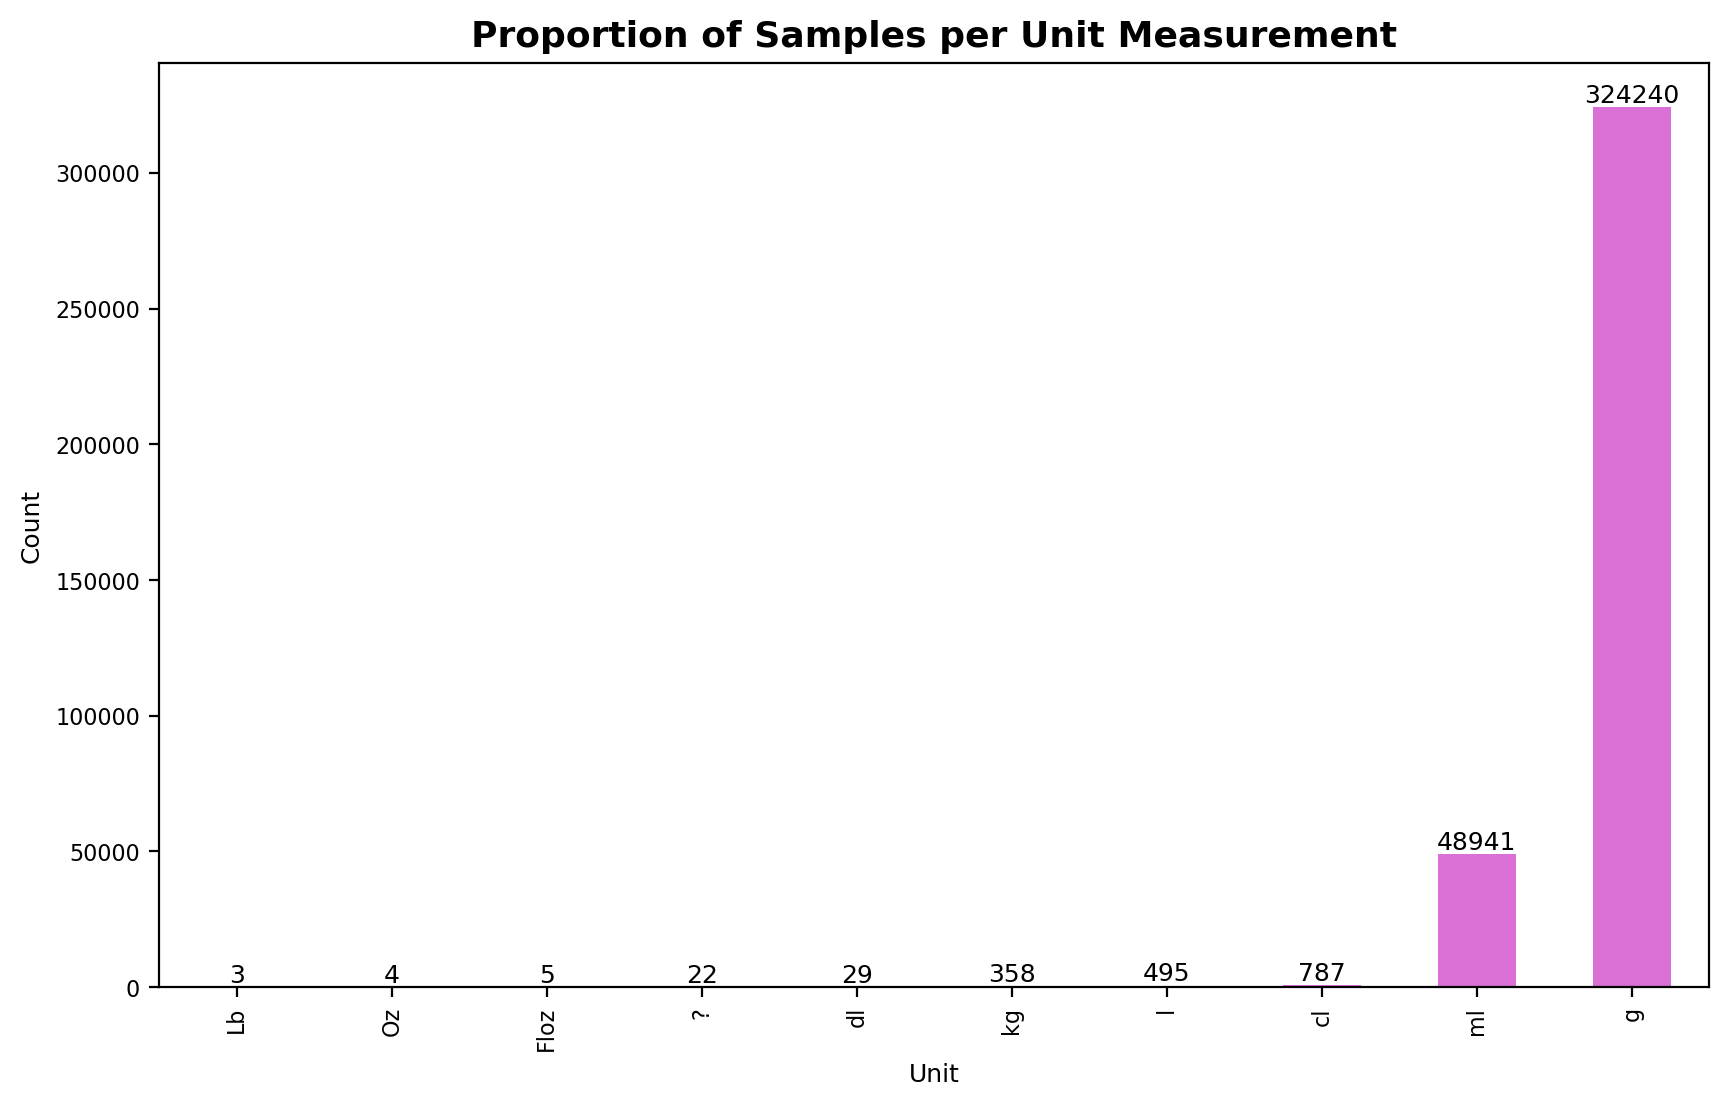

In [252]:
ax = df_other_cols.groupby("unit")["unit"].count().sort_values().plot.bar(
    figsize=(10,6), fontsize=8, color="#DA70D6")

plt.title("Proportion of Samples per Unit Measurement", fontweight="bold", fontsize=13)
plt.xlabel("Unit", fontsize=9)
plt.ylabel("Count", fontsize=9)
ax.bar_label(ax.containers[0], fontsize=9)
plt.show()

<br/>A bar chart of the *country* column's categorical variables shows that Austria and the United Kingdom have one value each. Moreover, majority of sample data is from the United States.

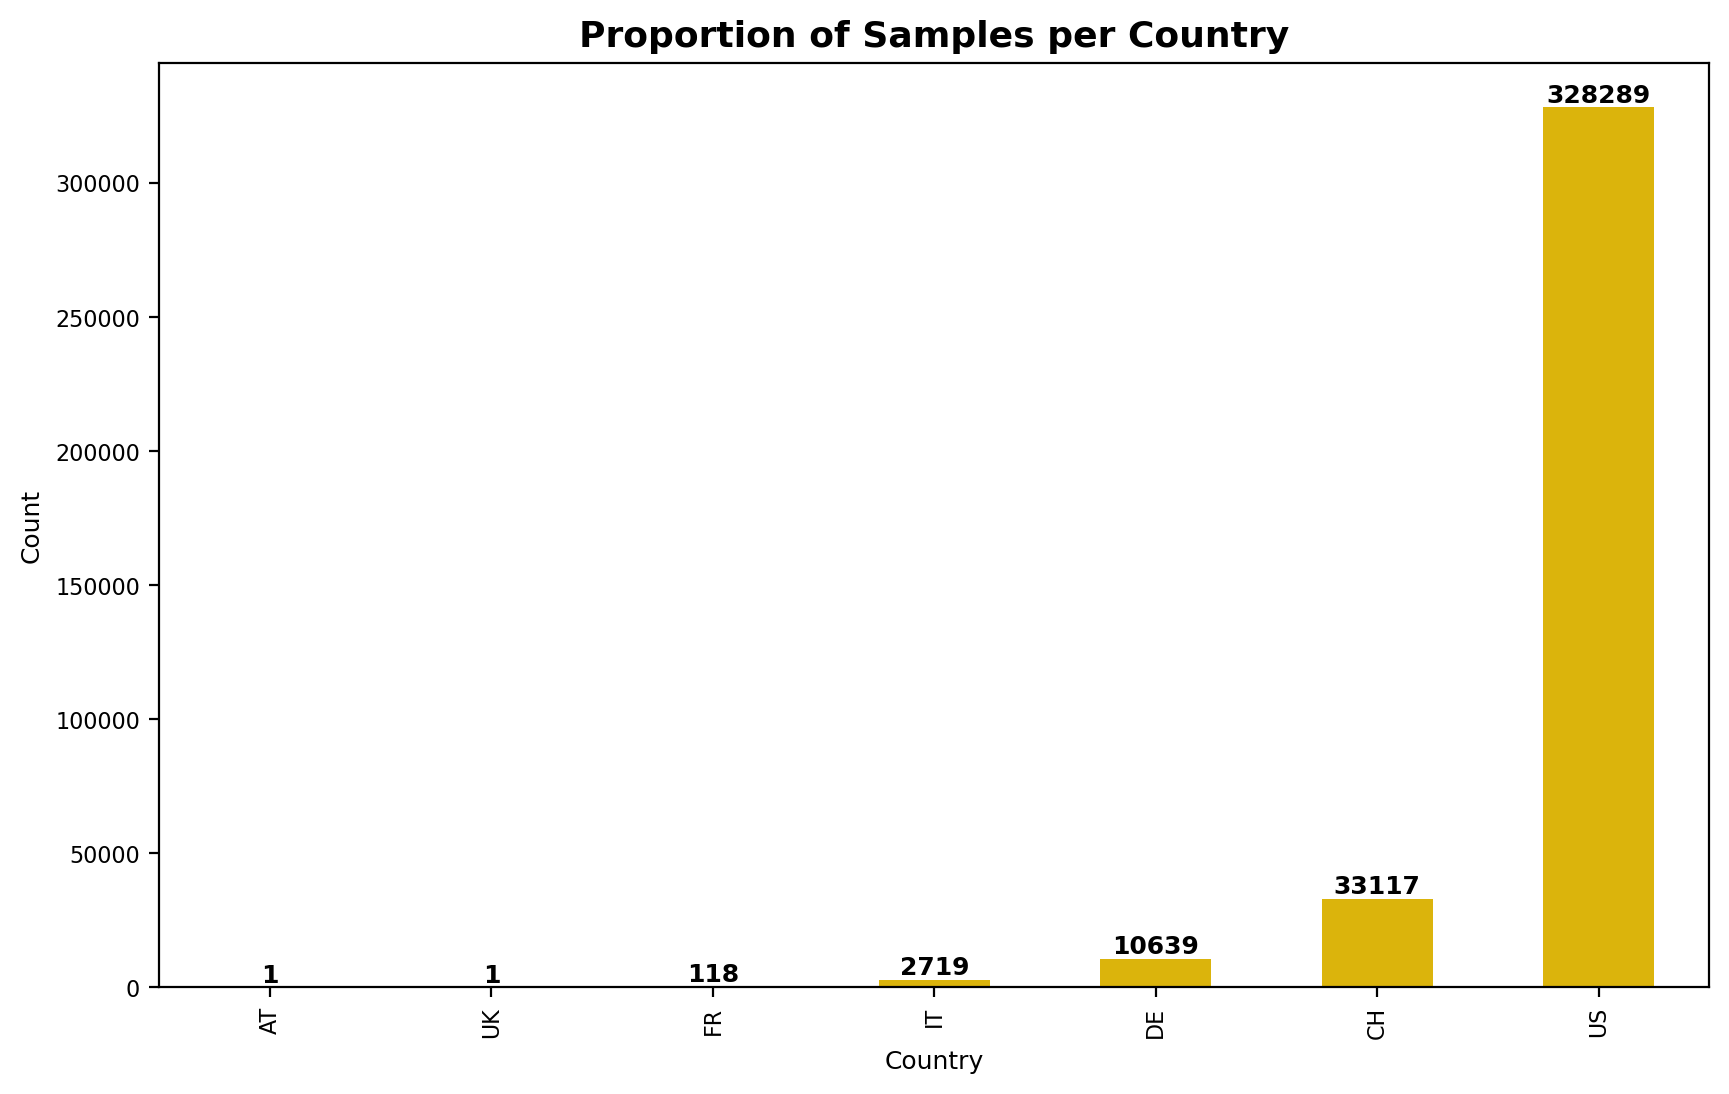

In [253]:
ax = df_other_cols.groupby("country")["country"].count().sort_values().plot.bar(
    figsize=(10,6), fontsize=8, color="#DBB40C")

plt.title("Proportion of Samples per Country", fontweight="bold", fontsize=13)
plt.xlabel("Country", fontsize=9)
plt.ylabel("Count", fontsize=9)
ax.bar_label(ax.containers[0], fontsize=9, fontweight="bold")
plt.show()

**2) Provide descriptive statistics (e.g., min/max/mean) and informative plots (e.g., histograms) of the numerical variables. You should obtain these plots as subplots.**

The variable *df_float64* has been updated to reflect all changes made to *df_raw2's* numerical columns. *df_float64* now has an eqivalent sum of rows to *df_raw2*.

In [254]:
df_float64 = df_raw2.select_dtypes(include= [np.float64])

In [255]:
print(f"'df_raw2' has {df_raw2.shape[0]} rows.\n\n'df_float_64' has {df_float64.shape[0]} rows.")


'df_raw2' has 374884 rows.

'df_float_64' has 374884 rows.


<br>The method *.describe()* and *.loc[]* property output the mean, minimum and maximum values for all columns with numerical values.

In [256]:
df_float64.describe().loc[['mean', 'min', 'max']].T

mean  min        max
alcohol_by_volume                                   0.027911  0.0      57.90
calcium_per_hundred                               116.647405  0.0  684000.00
carbohydrates_per_hundred                          34.005231  0.0    6400.00
cholesterol_per_hundred                            58.981358  0.0  250000.00
energy_kcal_per_hundred                           272.484231  0.0   39600.00
energy_per_hundred                               1139.512786  0.0  165686.40
fat_per_hundred                                    12.705385  0.0    3200.00
fatty_acids_total_saturated_per_hundred             4.943331  0.0    1000.00
fatty_acids_total_trans_per_hundred                 0.034861  0.0     615.38
fiber_per_hundred                                   2.925621  0.0    1730.00
iron_per_hundred                                    5.396049  0.0  769230.77
monounsaturated_fatty_acids_per_hundred             8.347389  0.0     200.00
polyunsaturated_fatty_acids_per_hundred             5.365930  0.0     100.00
portion_quantity                                    3.729814  0.0    3000.00
potassium_k_per_hundred                           553.944973  0.0  925000.00
protein_per_hundred                                 7.251008  0.0    5747.00
quantity                                           97.626803  0.0  230000.00
salt_per_hundred                                    0.985335  0.0      99.80
saturated_fat_per_hundred                           5.904191  0.0     100.00
sodium_per_hundred                                  1.402169  0.0   25833.33
sugars_added_per_hundred                           23.993521  0.0    1100.00
sugars_per_hundred                                 16.992009  0.0    5800.00
vitamin_a_iu_per_hundred                          494.236708  0.0  333333.00
vitamin_b1_thiamin_per_hundred                      0.925326  0.0    1111.00
vitamin_b2_riboflavin_per_hundred                   1.680103  0.0   20000.00
vitamin_b3_niacin_per_hundred                       9.846486  0.0    6785.71
vitamin_c_ascorbic_acid_per_hundred                15.704688  0.0  210000.00
vitamin_d_d2_d3_international_units_per_hundred    14.186515  0.0    5000.00

<br/>Pandas *.hist()* function creates subplots of sample data on nutrients per hundred, alcohol by volume as well as product quantity, and portion quantity

array([[<AxesSubplot:title={'center':'alcohol_by_volume'}>,
        <AxesSubplot:title={'center':'calcium_per_hundred'}>,
        <AxesSubplot:title={'center':'carbohydrates_per_hundred'}>,
        <AxesSubplot:title={'center':'cholesterol_per_hundred'}>,
        <AxesSubplot:title={'center':'energy_kcal_per_hundred'}>],
       [<AxesSubplot:title={'center':'energy_per_hundred'}>,
        <AxesSubplot:title={'center':'fat_per_hundred'}>,
        <AxesSubplot:title={'center':'fatty_acids_total_saturated_per_hundred'}>,
        <AxesSubplot:title={'center':'fatty_acids_total_trans_per_hundred'}>,
        <AxesSubplot:title={'center':'fiber_per_hundred'}>],
       [<AxesSubplot:title={'center':'iron_per_hundred'}>,
        <AxesSubplot:title={'center':'monounsaturated_fatty_acids_per_hundred'}>,
        <AxesSubplot:title={'center':'polyunsaturated_fatty_acids_per_hundred'}>,
        <AxesSubplot:title={'center':'portion_quantity'}>,
        <AxesSubplot:title={'center':'potassium_k_per_h

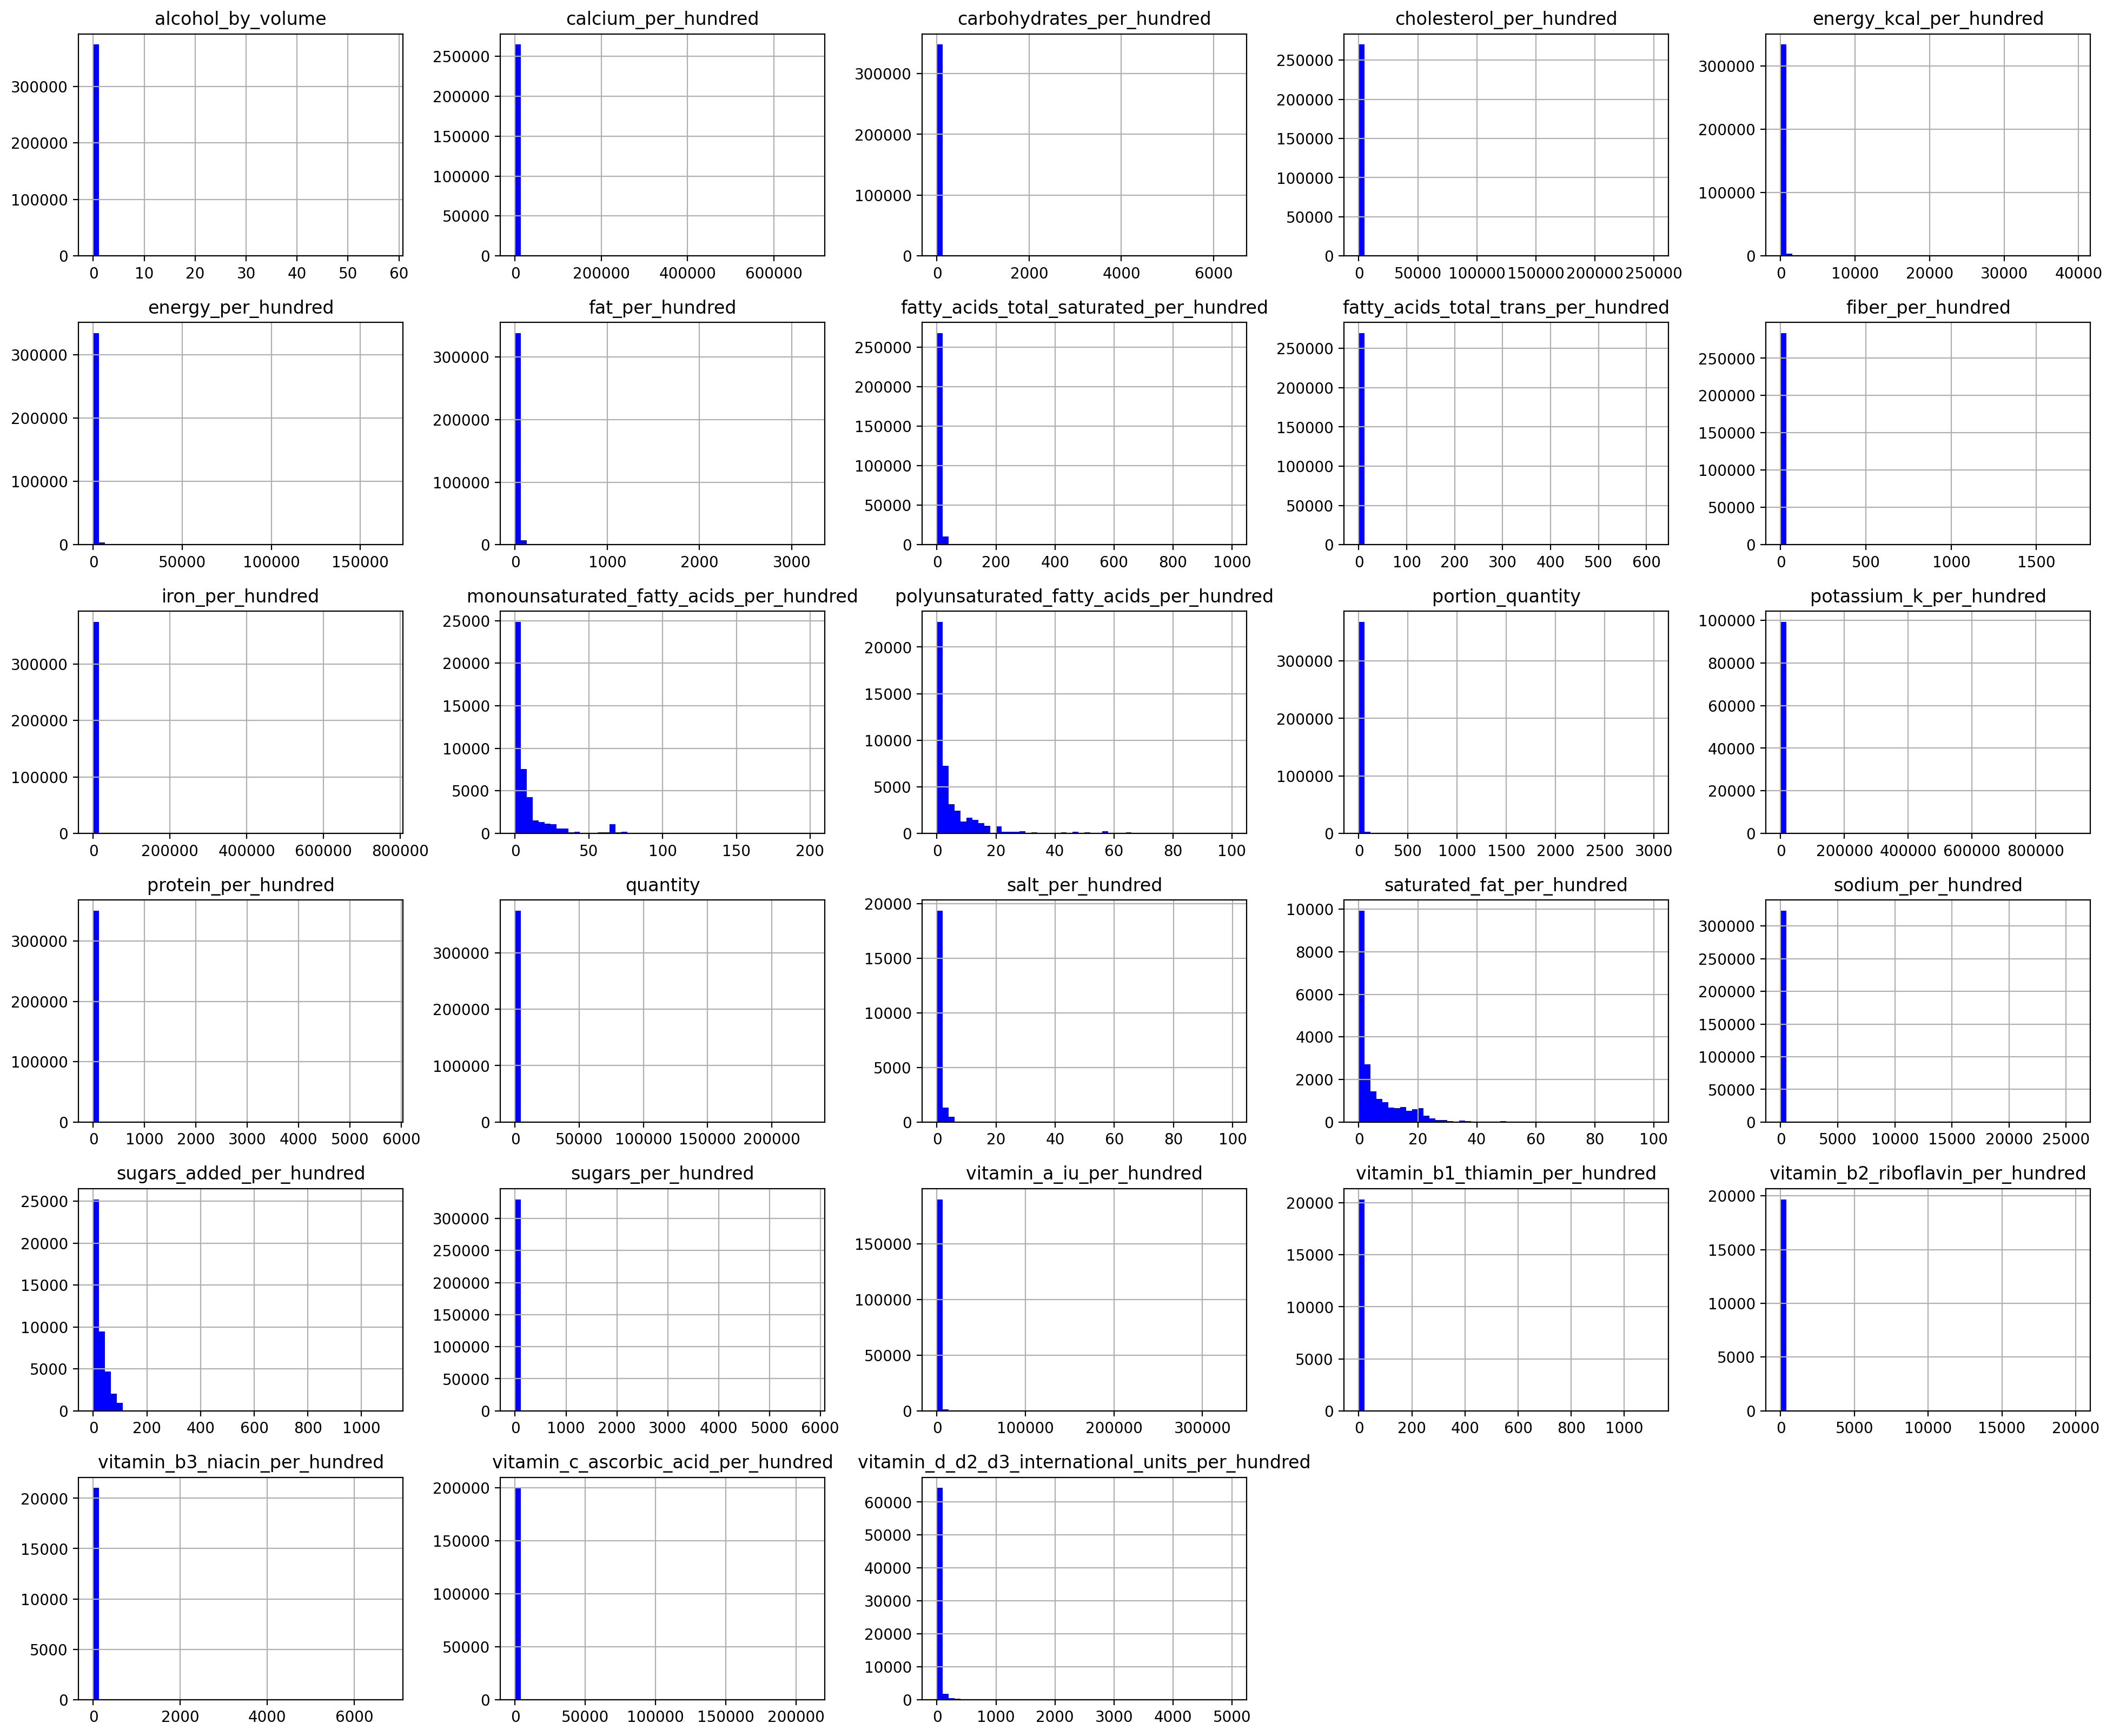

In [257]:
df_float64.hist(bins= 50, figsize= (24, 20), color= "blue")

**3) Errors and unrealistic values are a real problem for the reliability of our results. Hence part of the preliminary EDA aims to check for such problematic values. Using the statistics and your plots of the per_hundred columns (e.g. protein_per_hundred, fat_per_hundred, etc.) from previous task, your task is to identify and address these problematic values. Afterwards re-run the descriptive statistics and plots to check everything is ok now**

To iteratively investigate the column names that represent the unit of measurement for every macronutrient per hunderd, *.iloc[]*, together with a list comprehension will group and store columns that share the same measurement unit from the *df_unit* list to a new variable.

In [258]:
print(f"There are {df_unit.iloc[0].nunique()} unique units of measurement which include:\
 {df_unit.iloc[0].unique()}.")

There are 6 unique units of measurement which include: ['mg' 'g' 'kCal' 'kj' 'µg' 'IU'].


**mg**

In [259]:
print(f"{df_unit.iloc[0].str.startswith('m').sum()} units are measured with 'mg'.")

15 units are measured with 'mg'.


<br/>The variable *mg* is a boolean expression that evaluates whether values across index label **0** start with the letters mg; the series is converted to a dataframe. Moreover, the variable is updated to store index values that are *True*.

In [260]:
mg = df_unit.iloc[0].str.startswith('mg').to_frame()

mg = mg[mg[0] == True]

mg.index

Index(['calcium_unit', 'cholesterol_unit', 'copper_cu_unit', 'iron_unit',
       'magnesium_unit', 'manganese_mn_unit', 'phosphorus_unit',
       'potassium_k_unit', 'vitamin_b1_thiamin_unit',
       'vitamin_b2_riboflavin_unit', 'vitamin_b3_niacin_unit',
       'vitamin_b5_panthothenic_acid_unit', 'vitamin_b6_pyridoxin_unit',
       'vitamin_c_ascorbic_acid_unit', 'zinc_unit'],
      dtype='object')

<br>A handful of columns that end with the string *_unit*, and have *mg* as a value no longer have corresponding *per_hundred* columns; the columns were removed from the *per_hundred* list as they had less than 20,000 rows of non-missing data. 

<br/>The columns **'copper_cu_per_hundred', 'magnesium_per_hundred', 'manganese_mn_per_hundred', 'phosphorus_per_hundred', 'vitamin_b5_panthothenic_acid_per_hundred', 'vitamin_b6_pyridoxin_per_hundred'** and **'zinc_per_hundred'** will be excluded from the code in order to calculate the sum of rows with unrealistic *mg per hundred* values. Moreover, the corresponding column names that end with the string *_unit* will be removed from the variables *df_unit* and *df_raw2* to ensure that all variables are up to date with cleaned data.

In [261]:
df_unit.drop(columns= ['copper_cu_unit', 'magnesium_unit', 'manganese_mn_unit', 'phosphorus_unit', 
                'vitamin_b5_panthothenic_acid_unit', 'vitamin_b6_pyridoxin_unit', 'zinc_unit'], inplace= True)

In [262]:
df_raw2.drop(columns= ['copper_cu_unit', 'magnesium_unit', 'manganese_mn_unit', 'phosphorus_unit', 
                'vitamin_b5_panthothenic_acid_unit', 'vitamin_b6_pyridoxin_unit', 'zinc_unit'], inplace= True)

<br>

In [263]:
print(f"Sum of rows to be removed from the 'per_hundred' list:", df_per_hundred[['calcium_per_hundred', 'cholesterol_per_hundred', 'iron_per_hundred',
       'potassium_k_per_hundred', 'vitamin_b1_thiamin_per_hundred',
       'vitamin_b2_riboflavin_per_hundred', 'vitamin_b3_niacin_per_hundred',
       'vitamin_c_ascorbic_acid_per_hundred']].gt(10**5).sum().sum())

Sum of rows to be removed from the 'per_hundred' list: 124


In [264]:
print(f"Sum of rows to be removed per column:\n")

df_per_hundred[['calcium_per_hundred', 'cholesterol_per_hundred', 'iron_per_hundred',
       'potassium_k_per_hundred', 'vitamin_b1_thiamin_per_hundred',
       'vitamin_b2_riboflavin_per_hundred', 'vitamin_b3_niacin_per_hundred',
       'vitamin_c_ascorbic_acid_per_hundred']].gt(10**5).sum()

Sum of rows to be removed per column:



calcium_per_hundred                    18
cholesterol_per_hundred                22
iron_per_hundred                        2
potassium_k_per_hundred                81
vitamin_b1_thiamin_per_hundred          0
vitamin_b2_riboflavin_per_hundred       0
vitamin_b3_niacin_per_hundred           0
vitamin_c_ascorbic_acid_per_hundred     1
dtype: int64

<br>

Using *.drop()* iteratively removes the 124 rows from the *per_hundred* list. 

In [265]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["calcium_per_hundred"] > 10**5].index, inplace=True)

In [266]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["cholesterol_per_hundred"] > 10**5].index, inplace=True)

In [267]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["iron_per_hundred"] > 10**5].index, inplace=True)

In [268]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["potassium_k_per_hundred"] > 10**5].index, inplace=True)

In [269]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["vitamin_b1_thiamin_per_hundred"] > 10**5].index, inplace=True)

In [270]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["vitamin_b2_riboflavin_per_hundred"] > 10**5].index, inplace=True)

In [271]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["vitamin_b3_niacin_per_hundred"] > 10**5].index, inplace=True)

In [272]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["vitamin_c_ascorbic_acid_per_hundred"] > 10**5].index, inplace=True)

<br>

The code used to calculate the sum of rows with unrealistic values will be run again to cross-check that all unrealistic values have been removed.

In [273]:
print(f"Sum of rows outside of the unit range:", df_per_hundred[['calcium_per_hundred', 'cholesterol_per_hundred', 'iron_per_hundred',
       'potassium_k_per_hundred', 'vitamin_b1_thiamin_per_hundred',
       'vitamin_b2_riboflavin_per_hundred', 'vitamin_b3_niacin_per_hundred',
       'vitamin_c_ascorbic_acid_per_hundred']].gt(10**5).sum().sum())

Sum of rows outside of the unit range: 0


<br>The same code will be applied to *df_raw2*.

In [274]:
df_raw2.drop(df_raw2[df_raw2["calcium_per_hundred"] > 10**5].index, inplace=True)

In [275]:
df_raw2.drop(df_raw2[df_raw2["cholesterol_per_hundred"] > 10**5].index, inplace=True)

In [276]:
df_raw2.drop(df_raw2[df_raw2["iron_per_hundred"] > 10**5].index, inplace=True)

In [277]:
df_raw2.drop(df_raw2[df_raw2["potassium_k_per_hundred"] > 10**5].index, inplace=True)

In [278]:
df_raw2.drop(df_raw2[df_raw2["vitamin_b1_thiamin_per_hundred"] > 10**5].index, inplace=True)

In [279]:
df_raw2.drop(df_raw2[df_raw2["vitamin_b2_riboflavin_per_hundred"] > 10**5].index, inplace=True)

In [280]:
df_raw2.drop(df_raw2[df_raw2["vitamin_b3_niacin_per_hundred"] > 10**5].index, inplace=True)

In [281]:
df_raw2.drop(df_raw2[df_raw2["vitamin_c_ascorbic_acid_per_hundred"] > 10**5].index, inplace=True)

<br>

In [282]:
print(f"Sum of rows outside of the unit range:", df_raw2[['calcium_per_hundred', 'cholesterol_per_hundred', 'iron_per_hundred',
       'potassium_k_per_hundred', 'vitamin_b1_thiamin_per_hundred',
       'vitamin_b2_riboflavin_per_hundred', 'vitamin_b3_niacin_per_hundred',
       'vitamin_c_ascorbic_acid_per_hundred']].gt(10**5).sum().sum())

Sum of rows outside of the unit range: 0


In [283]:
print(f"The 'per_hundred' list now has {df_per_hundred.shape[0]} rows.")

The 'per_hundred' list now has 374760 rows.


In [284]:
print(f"The variable 'df_raw2' also has {df_raw2.shape[0]} rows.")

The variable 'df_raw2' also has 374760 rows.


**g**

In [285]:
print(f"{df_unit.iloc[0].str.startswith('g').sum()} nutrients are measured with 'g'.")

17 nutrients are measured with 'g'.


<br/>The variable *g* is a boolean expression that evaluates whether values across the index label **0** start with the letter g; the series is converted to a dataframe. Moreover, the variable is updated to store index values that are *True*.

In [286]:
g = df_unit.iloc[0].str.startswith('g').to_frame()

g = g[g[0] == True]

g.index

Index(['carbohydrates_unit', 'fat_unit', 'fatty_acids_total_saturated_unit',
       'fatty_acids_total_trans_unit', 'fiber_insoluble_unit',
       'fiber_soluble_unit', 'fiber_unit', 'hundred_unit',
       'monounsaturated_fatty_acids_unit', 'polyunsaturated_fatty_acids_unit',
       'portion_unit', 'protein_unit', 'salt_unit', 'saturated_fat_unit',
       'sodium_unit', 'sugars_added_unit', 'sugars_unit'],
      dtype='object')

<br>

A handful of the columns that end with the string *_unit*, and have *g* as a value no longer have corresponding *per_hundred* columns; the columns were removed from the *per_hundred* list as they had less than 20,000 rows of non-missing data.

<vr/>The columns **fiber_insoluble_per_hundred, fiber_soluble_per_hundred, hundred_per_hundred** and **portion_per_hundred** will be excluded from the code in order to calculate the sum of rows with unrealistic mg per hundred values. Moreover, the corresponding column names that end with the string *_unit* will be removed from the variables *df_unit* and *df_raw2* to ensure that all variables are up to date with cleaned data.

In [287]:
df_unit.drop(columns= ['fiber_insoluble_unit', 'fiber_soluble_unit'], inplace= True)

In [288]:
df_raw2.drop(columns= ['fiber_insoluble_unit', 'fiber_soluble_unit'], inplace= True)

<br>

In [289]:
print("Sum of rows to be removed:", df_per_hundred[['carbohydrates_per_hundred', 'fat_per_hundred', 'fatty_acids_total_saturated_per_hundred',
       'fatty_acids_total_trans_per_hundred', 'fiber_per_hundred',
       'monounsaturated_fatty_acids_per_hundred', 'polyunsaturated_fatty_acids_per_hundred',
       'protein_per_hundred', 'salt_per_hundred', 'saturated_fat_per_hundred',
       'sodium_per_hundred', 'sugars_added_per_hundred', 'sugars_per_hundred']].gt(100).sum().sum())

Sum of rows to be removed: 2155


In [290]:
print("Sum of rows to be removed per column:\n")

df_per_hundred[['carbohydrates_per_hundred', 'fat_per_hundred', 'fatty_acids_total_saturated_per_hundred',
       'fatty_acids_total_trans_per_hundred', 'fiber_per_hundred',
       'monounsaturated_fatty_acids_per_hundred', 'polyunsaturated_fatty_acids_per_hundred',
       'protein_per_hundred', 'salt_per_hundred', 'saturated_fat_per_hundred',
       'sodium_per_hundred', 'sugars_added_per_hundred', 'sugars_per_hundred']].gt(100).sum()

Sum of rows to be removed per column:



carbohydrates_per_hundred                  1073
fat_per_hundred                             135
fatty_acids_total_saturated_per_hundred      32
fatty_acids_total_trans_per_hundred           1
fiber_per_hundred                            21
monounsaturated_fatty_acids_per_hundred       4
polyunsaturated_fatty_acids_per_hundred       0
protein_per_hundred                         172
salt_per_hundred                              0
saturated_fat_per_hundred                     0
sodium_per_hundred                          178
sugars_added_per_hundred                     96
sugars_per_hundred                          443
dtype: int64

<br>

Using *.drop()* iteratively will remove the 2155 rows from the *per_hundred* list. 

In [291]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["carbohydrates_per_hundred"] > 100].index, inplace=True)

In [292]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["fat_per_hundred"] > 100].index, inplace=True)

In [293]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["fatty_acids_total_saturated_per_hundred"] > 100].index, inplace=True)

In [294]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["fatty_acids_total_trans_per_hundred"] > 100].index, inplace=True)

In [295]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["fiber_per_hundred"] > 100].index, inplace=True)

In [296]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["monounsaturated_fatty_acids_per_hundred"] > 100].index, inplace=True)

In [297]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["polyunsaturated_fatty_acids_per_hundred"] > 100].index, inplace=True)

In [298]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["protein_per_hundred"] > 100].index, inplace=True)

In [299]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["salt_per_hundred"] > 100].index, inplace=True)

In [300]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["saturated_fat_per_hundred"] > 100].index, inplace=True)

In [301]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["sodium_per_hundred"] > 100].index, inplace=True)

In [302]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["sugars_added_per_hundred"] > 100].index, inplace=True)

In [303]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["sugars_per_hundred"] > 100].index, inplace=True)

<br/>The code used to calculate the sum of rows with problematic values will be run again to cross-check that all unrealistic values have been removed.

In [304]:
print("Sum of rows outside of the unit range:", df_per_hundred[['carbohydrates_per_hundred', 'fat_per_hundred', 'fatty_acids_total_saturated_per_hundred',
       'fatty_acids_total_trans_per_hundred', 'fiber_per_hundred',
       'monounsaturated_fatty_acids_per_hundred', 'polyunsaturated_fatty_acids_per_hundred',
       'protein_per_hundred', 'salt_per_hundred', 'saturated_fat_per_hundred',
       'sodium_per_hundred', 'sugars_added_per_hundred', 'sugars_per_hundred']].gt(100).sum().sum())

Sum of rows outside of the unit range: 0


<br>

The same code will be applied to *df_raw2*.

In [305]:
df_raw2.drop(df_raw2[df_raw2["carbohydrates_per_hundred"] > 100].index, inplace=True)

In [306]:
df_raw2.drop(df_raw2[df_raw2["fat_per_hundred"] > 100].index, inplace=True)

In [307]:
df_raw2.drop(df_raw2[df_raw2["fatty_acids_total_saturated_per_hundred"] > 100].index, inplace=True)

In [308]:
df_raw2.drop(df_raw2[df_raw2["fatty_acids_total_trans_per_hundred"] > 100].index, inplace=True)

In [309]:
df_raw2.drop(df_raw2[df_raw2["fiber_per_hundred"] > 100].index, inplace=True)

In [310]:
df_raw2.drop(df_raw2[df_raw2["monounsaturated_fatty_acids_per_hundred"] > 100].index, inplace=True)

In [311]:
df_raw2.drop(df_raw2[df_raw2["polyunsaturated_fatty_acids_per_hundred"] > 100].index, inplace=True)

In [312]:
df_raw2.drop(df_raw2[df_raw2["protein_per_hundred"] > 100].index, inplace=True)

In [313]:
df_raw2.drop(df_raw2[df_raw2["salt_per_hundred"] > 100].index, inplace=True)

In [314]:
df_raw2.drop(df_raw2[df_raw2["saturated_fat_per_hundred"] > 100].index, inplace=True)

In [315]:
df_raw2.drop(df_raw2[df_raw2["sodium_per_hundred"] > 100].index, inplace=True)

In [316]:
df_raw2.drop(df_raw2[df_raw2["sugars_added_per_hundred"] > 100].index, inplace=True)

In [317]:
df_raw2.drop(df_raw2[df_raw2["sugars_per_hundred"] > 100].index, inplace=True)

<br>

In [318]:
print("Sum of rows to be removed:", df_raw2[['carbohydrates_per_hundred', 'fat_per_hundred', 'fatty_acids_total_saturated_per_hundred',
       'fatty_acids_total_trans_per_hundred', 'fiber_per_hundred',
       'monounsaturated_fatty_acids_per_hundred', 'polyunsaturated_fatty_acids_per_hundred',
       'protein_per_hundred', 'salt_per_hundred', 'saturated_fat_per_hundred',
       'sodium_per_hundred', 'sugars_added_per_hundred', 'sugars_per_hundred']].gt(100).sum().sum())

Sum of rows to be removed: 0


In [319]:
print(f"The variable 'per_hundred' now has {df_per_hundred.shape[0]} rows.")

The variable 'per_hundred' now has 373365 rows.


In [320]:
print(f"The variable 'per_hundred' also has {df_raw2.shape[0]} rows.")

The variable 'per_hundred' also has 373365 rows.


<br/>**kCal**  

In [321]:
print(f"{df_unit.iloc[0].str.startswith('kC').sum()} unit is measured with 'kCal'.")

1 unit is measured with 'kCal'.


<br/>The variable *kcal* is a boolean expression that evaluates whether values across the index label **0** start with the letters kcal; the series is converted to a dataframe. Moreover, the variable is updated to store index values that are *True*.

In [322]:
kcal = df_unit.iloc[0].str.startswith('kC').to_frame()

kcal = kcal[kcal[0] == True]

kcal.index

Index(['energy_kcal_unit'], dtype='object')

<br>The kCal range [0, 885] is an estimate conversion of the kj range [0, 3700]; 1kCal is equivalent to 4.184 kj. Both units measure energy.

In [323]:
print("Sum of rows to be removed:", df_per_hundred[['energy_kcal_per_hundred']].gt(885).sum().sum())

Sum of rows to be removed: 521


<br>Using *.drop()* iteratively will remove the 521 rows from the *per_hundred* list. 

In [324]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["energy_kcal_per_hundred"] > 885].index, inplace=True)

<br>The code used to calculate the sum of rows with unrealistic values will be run again to cross-check that all unrealistic values have been removed.

In [325]:
print("Sum of rows outside of the unit range:", df_per_hundred[['energy_kcal_per_hundred']].gt(885).sum().sum())

Sum of rows outside of the unit range: 0


<br>

The same code will be applied to *df_raw2*.

In [326]:
df_raw2.drop(df_raw2[df_raw2["energy_kcal_per_hundred"] > 885].index, inplace=True)

<br>

In [327]:
print("Sum of rows outside of the unit range:", df_raw2[['energy_kcal_per_hundred']].gt(885).sum().sum())

Sum of rows outside of the unit range: 0


In [328]:
print(f"The variable 'per_hundred' now has {df_raw2.shape[0]} rows.")

The variable 'per_hundred' now has 372844 rows.


In [329]:
print(f"The variable 'df_raw2' also has {df_raw2.shape[0]} rows.")

The variable 'df_raw2' also has 372844 rows.


**kj**

In [330]:
print(f"{df_unit.iloc[0].str.startswith('kj').sum()} unit is measured with 'kj'.")

1 unit is measured with 'kj'.


<br/>The variable *kj* is a boolean expression that evaluates whether values across the index label **0** start with the letters kj; the series is converted to a dataframe. Moreover, the variable is updated to store index values that are *True*.

In [331]:
kj = df_unit.iloc[0].str.startswith('kj').to_frame()

kj = kj[kj[0] == True]

kj.index

Index(['energy_unit'], dtype='object')

In [332]:
print("Sum of rows to be removed:", df_per_hundred[['energy_per_hundred']].gt(3700).sum().sum())

Sum of rows to be removed: 2


<br/>Using *.drop()*, will remove the 2 rows from the *per_hundred* list. 

In [333]:
df_per_hundred.drop(df_per_hundred[df_per_hundred["energy_per_hundred"] > 3700].index, inplace=True)

<br/>The code used to calculate the sum of rows with problematic values will be run again to cross-check that all unrealistic values have been removed.

In [334]:
print("Sum of rows outside of the unit range:", df_per_hundred[['energy_per_hundred']].gt(3700).sum().sum())

Sum of rows outside of the unit range: 0


<br>The same code will be applied to *df_raw2*.

In [335]:
df_raw2.drop(df_raw2[df_raw2["energy_per_hundred"] > 3700].index, inplace=True)

<br>

In [336]:
print("Sum of rows outside of the unit range:", df_raw2[['energy_per_hundred']].gt(3700).sum().sum())

Sum of rows outside of the unit range: 0


<br>

In [337]:
print(f"The variable 'per_hundred' now has {df_raw2.shape[0]} rows.")

The variable 'per_hundred' now has 372842 rows.


<br>

In [338]:
print(f"The variable 'df_raw2' also has {df_raw2.shape[0]} rows.")

The variable 'df_raw2' also has 372842 rows.


 **µg**

In [339]:
print(f"{df_unit.iloc[0].str.startswith('µg').sum()} units are measured with 'µg'.")

3 units are measured with 'µg'.


<br/>The variable *mcg* is a boolean expression that evaluates whether values across the index label **0** start with the letters µg; the series is converted to a dataframe. Moreover, the variable is updated to store index values that are *True*.

In [340]:
mcg = df_unit.iloc[0].str.startswith('µg').to_frame()

mcg = mcg[mcg[0] == True]

mcg.index

Index(['folate_total_unit', 'folic_acid_unit', 'vitamin_b12_cobalamin_unit'], dtype='object')

<br/>Some columns that end with the string *_unit*, and have *µg* as a unit no longer have corresponding *per_hundred* columns; the columns were removed from the *per_hundred* list as they had less than 20,000 rows of non-missing data.

<br>The columns **folate_total_unit**, **folic_acid_unit**, and **vitamin_b12_cobalamin_unit** were removed from the *per_hundred* list; they had less than 20, 000 rows of non-missing data. The variable *df_raw* which is the original dataset, confirms that the sum of non-null values are less than 20,000. 

In [341]:
df_raw[['folate_total_per_hundred', 'folic_acid_per_hundred', 'vitamin_b12_cobalamin_per_hundred']].notnull().sum()

folate_total_per_hundred             7696
folic_acid_per_hundred               4581
vitamin_b12_cobalamin_per_hundred    9874
dtype: int64

<br>

The corresponding column names that end with the string *_unit* will be removed from the variables *df_unit* and *df_raw2* to ensure that all variables are up to date with cleaned data.

In [342]:
df_unit.drop(columns= ['folate_total_unit', 'folic_acid_unit', 'vitamin_b12_cobalamin_unit'], inplace= True)

In [343]:
df_raw2.drop(columns= ['folate_total_unit', 'folic_acid_unit', 'vitamin_b12_cobalamin_unit'], inplace= True)

<br>**1 IU Vitamin A and D**

In [344]:
print(f"{df_unit.iloc[0].str.startswith('IU').sum()} units are measured with 'IU'.")

2 units are measured with 'IU'.


<br/>The variable *iu* is a boolean expression that evaluates whether values across index label **0** start with the letters IU; the series is converted to a dataframe. Moreover, the variable is updated to store index values that are *True*.

In [345]:
iu = df_unit.iloc[0].str.startswith('IU').to_frame()

iu = iu[iu[0] == True]

iu.index

Index(['vitamin_a_iu_unit', 'vitamin_d_d2_d3_international_units_unit'], dtype='object')

In [346]:
print("Sum of rows to be removed:", df_per_hundred[['vitamin_a_iu_per_hundred']].gt(3.3*10**8).sum().sum())

Sum of rows to be removed: 0


In [347]:
print("Sum of rows to be removed:", df_per_hundred[['vitamin_d_d2_d3_international_units_per_hundred']].gt(4*10**9).sum().sum())

Sum of rows to be removed: 0


<br>Both columns don't have unrealistic values.

In [348]:
print(f"'df_per_hundred' now has {df_per_hundred.shape[0]} rows.")

'df_per_hundred' now has 372842 rows.


In [349]:
print(f"'df_raw2' also has {df_raw2.shape[0]} rows.")

'df_raw2' also has 372842 rows.


<br/>Descriptive statistics, and histogram plots of the *per_hundred* list are run again using the same code. 

In [350]:
df_per_hundred.describe()

calcium_per_hundred  carbohydrates_per_hundred  \
count        264363.000000              346633.000000   
mean             97.374106                  33.328116   
std             520.437525                  29.184389   
min               0.000000                   0.000000   
25%               0.000000                   6.670000   
50%              36.000000                  23.530000   
75%             102.000000                  60.000000   
max           93750.000000                 100.000000   

       cholesterol_per_hundred  energy_kcal_per_hundred  energy_per_hundred  \
count            269465.000000            336561.000000       336563.000000   
mean                 42.629489               267.863864         1120.574769   
std                1177.860192               187.581574          784.552929   
min                   0.000000                 0.000000            0.000000   
25%                   0.000000                89.000000          372.380000   
50%                   0.000000               267.000000         1117.130000   
75%                  24.000000               400.000000         1673.600000   
max              100000.000000               885.000000         3700.000000   

       fat_per_hundred  fatty_acids_total_saturated_per_hundred  \
count    343937.000000                            278105.000000   
mean         12.461857                                 4.847188   
std          16.641448                                 7.112204   
min           0.000000                                 0.000000   
25%           0.000000                                 0.000000   
50%           5.360000                                 1.980000   
75%          20.000000                                 7.140000   
max         100.000000                               100.000000   

       fatty_acids_total_trans_per_hundred  fiber_per_hundred  \
count                        268348.000000      283581.000000   
mean                              0.031786           2.883091   
std                               0.475581           4.572351   
min                               0.000000           0.000000   
25%                               0.000000           0.000000   
50%                               0.000000           1.600000   
75%                               0.000000           3.600000   
max                              53.570000         100.000000   

       iron_per_hundred  ...  saturated_fat_per_hundred  sodium_per_hundred  \
count     372842.000000  ...               20840.000000       322296.000000   
mean           2.379635  ...                   5.830030            0.701309   
std          106.497242  ...                   8.051071            2.936107   
min            0.000000  ...                   0.000000            0.000000   
25%            0.000000  ...                   0.500000            0.030000   
50%            0.150000  ...                   2.000000            0.260000   
75%            1.710000  ...                   9.000000            0.570000   
max        26666.670000  ...                 100.000000          100.000000   

       sugars_added_per_hundred  sugars_per_hundred  vitamin_a_iu_per_hundred  \
count              42281.000000       328572.000000             191859.000000   
mean                  23.526601           16.585112                492.010768   
std                   23.001221           21.413748               2431.703576   
min                    0.000000            0.000000                  0.000000   
25%                    5.100000            1.670000                  0.000000   
50%                   15.800000            6.450000                  0.000000   
75%                   36.400000           25.000000                352.000000   
max                  100.000000          100.000000             333333.000000   

       vitamin_b1_thiamin_per_hundred  vitamin_b2_riboflavin_per_hundred  \
count                    20369.000000                       19643.000000 

In [351]:
print(f"The maximum values for each column are under or equal to a unit's range of values. Furthermore, the mean values are reflective\nof the cleaned data.")

df_per_hundred.describe().loc[['mean', 'min', 'max']].T

The maximum values for each column are under or equal to a unit's range of values. Furthermore, the mean values are reflective
of the cleaned data.


mean  min        max
calcium_per_hundred                                97.374106  0.0   93750.00
carbohydrates_per_hundred                          33.328116  0.0     100.00
cholesterol_per_hundred                            42.629489  0.0  100000.00
energy_kcal_per_hundred                           267.863864  0.0     885.00
energy_per_hundred                               1120.574769  0.0    3700.00
fat_per_hundred                                    12.461857  0.0     100.00
fatty_acids_total_saturated_per_hundred             4.847188  0.0     100.00
fatty_acids_total_trans_per_hundred                 0.031786  0.0      53.57
fiber_per_hundred                                   2.883091  0.0     100.00
iron_per_hundred                                    2.379635  0.0   26666.67
monounsaturated_fatty_acids_per_hundred             8.128797  0.0     100.00
polyunsaturated_fatty_acids_per_hundred             5.206275  0.0     100.00
potassium_k_per_hundred                           282.181481  0.0   99000.00
protein_per_hundred                                 7.129861  0.0     100.00
salt_per_hundred                                    0.986416  0.0      99.80
saturated_fat_per_hundred                           5.830030  0.0     100.00
sodium_per_hundred                                  0.701309  0.0     100.00
sugars_added_per_hundred                           23.526601  0.0     100.00
sugars_per_hundred                                 16.585112  0.0     100.00
vitamin_a_iu_per_hundred                          492.010768  0.0  333333.00
vitamin_b1_thiamin_per_hundred                      0.922061  0.0    1111.00
vitamin_b2_riboflavin_per_hundred                   1.676363  0.0   20000.00
vitamin_b3_niacin_per_hundred                       9.794059  0.0    6785.71
vitamin_c_ascorbic_acid_per_hundred                14.440847  0.0   71428.60
vitamin_d_d2_d3_international_units_per_hundred    13.999058  0.0    5000.00

Roughly half of the histogram plots have values near zero as they dominate the frequency count.



array([[<AxesSubplot:title={'center':'calcium_per_hundred'}>,
        <AxesSubplot:title={'center':'carbohydrates_per_hundred'}>,
        <AxesSubplot:title={'center':'cholesterol_per_hundred'}>,
        <AxesSubplot:title={'center':'energy_kcal_per_hundred'}>,
        <AxesSubplot:title={'center':'energy_per_hundred'}>],
       [<AxesSubplot:title={'center':'fat_per_hundred'}>,
        <AxesSubplot:title={'center':'fatty_acids_total_saturated_per_hundred'}>,
        <AxesSubplot:title={'center':'fatty_acids_total_trans_per_hundred'}>,
        <AxesSubplot:title={'center':'fiber_per_hundred'}>,
        <AxesSubplot:title={'center':'iron_per_hundred'}>],
       [<AxesSubplot:title={'center':'monounsaturated_fatty_acids_per_hundred'}>,
        <AxesSubplot:title={'center':'polyunsaturated_fatty_acids_per_hundred'}>,
        <AxesSubplot:title={'center':'potassium_k_per_hundred'}>,
        <AxesSubplot:title={'center':'protein_per_hundred'}>,
        <AxesSubplot:title={'center':'salt_per

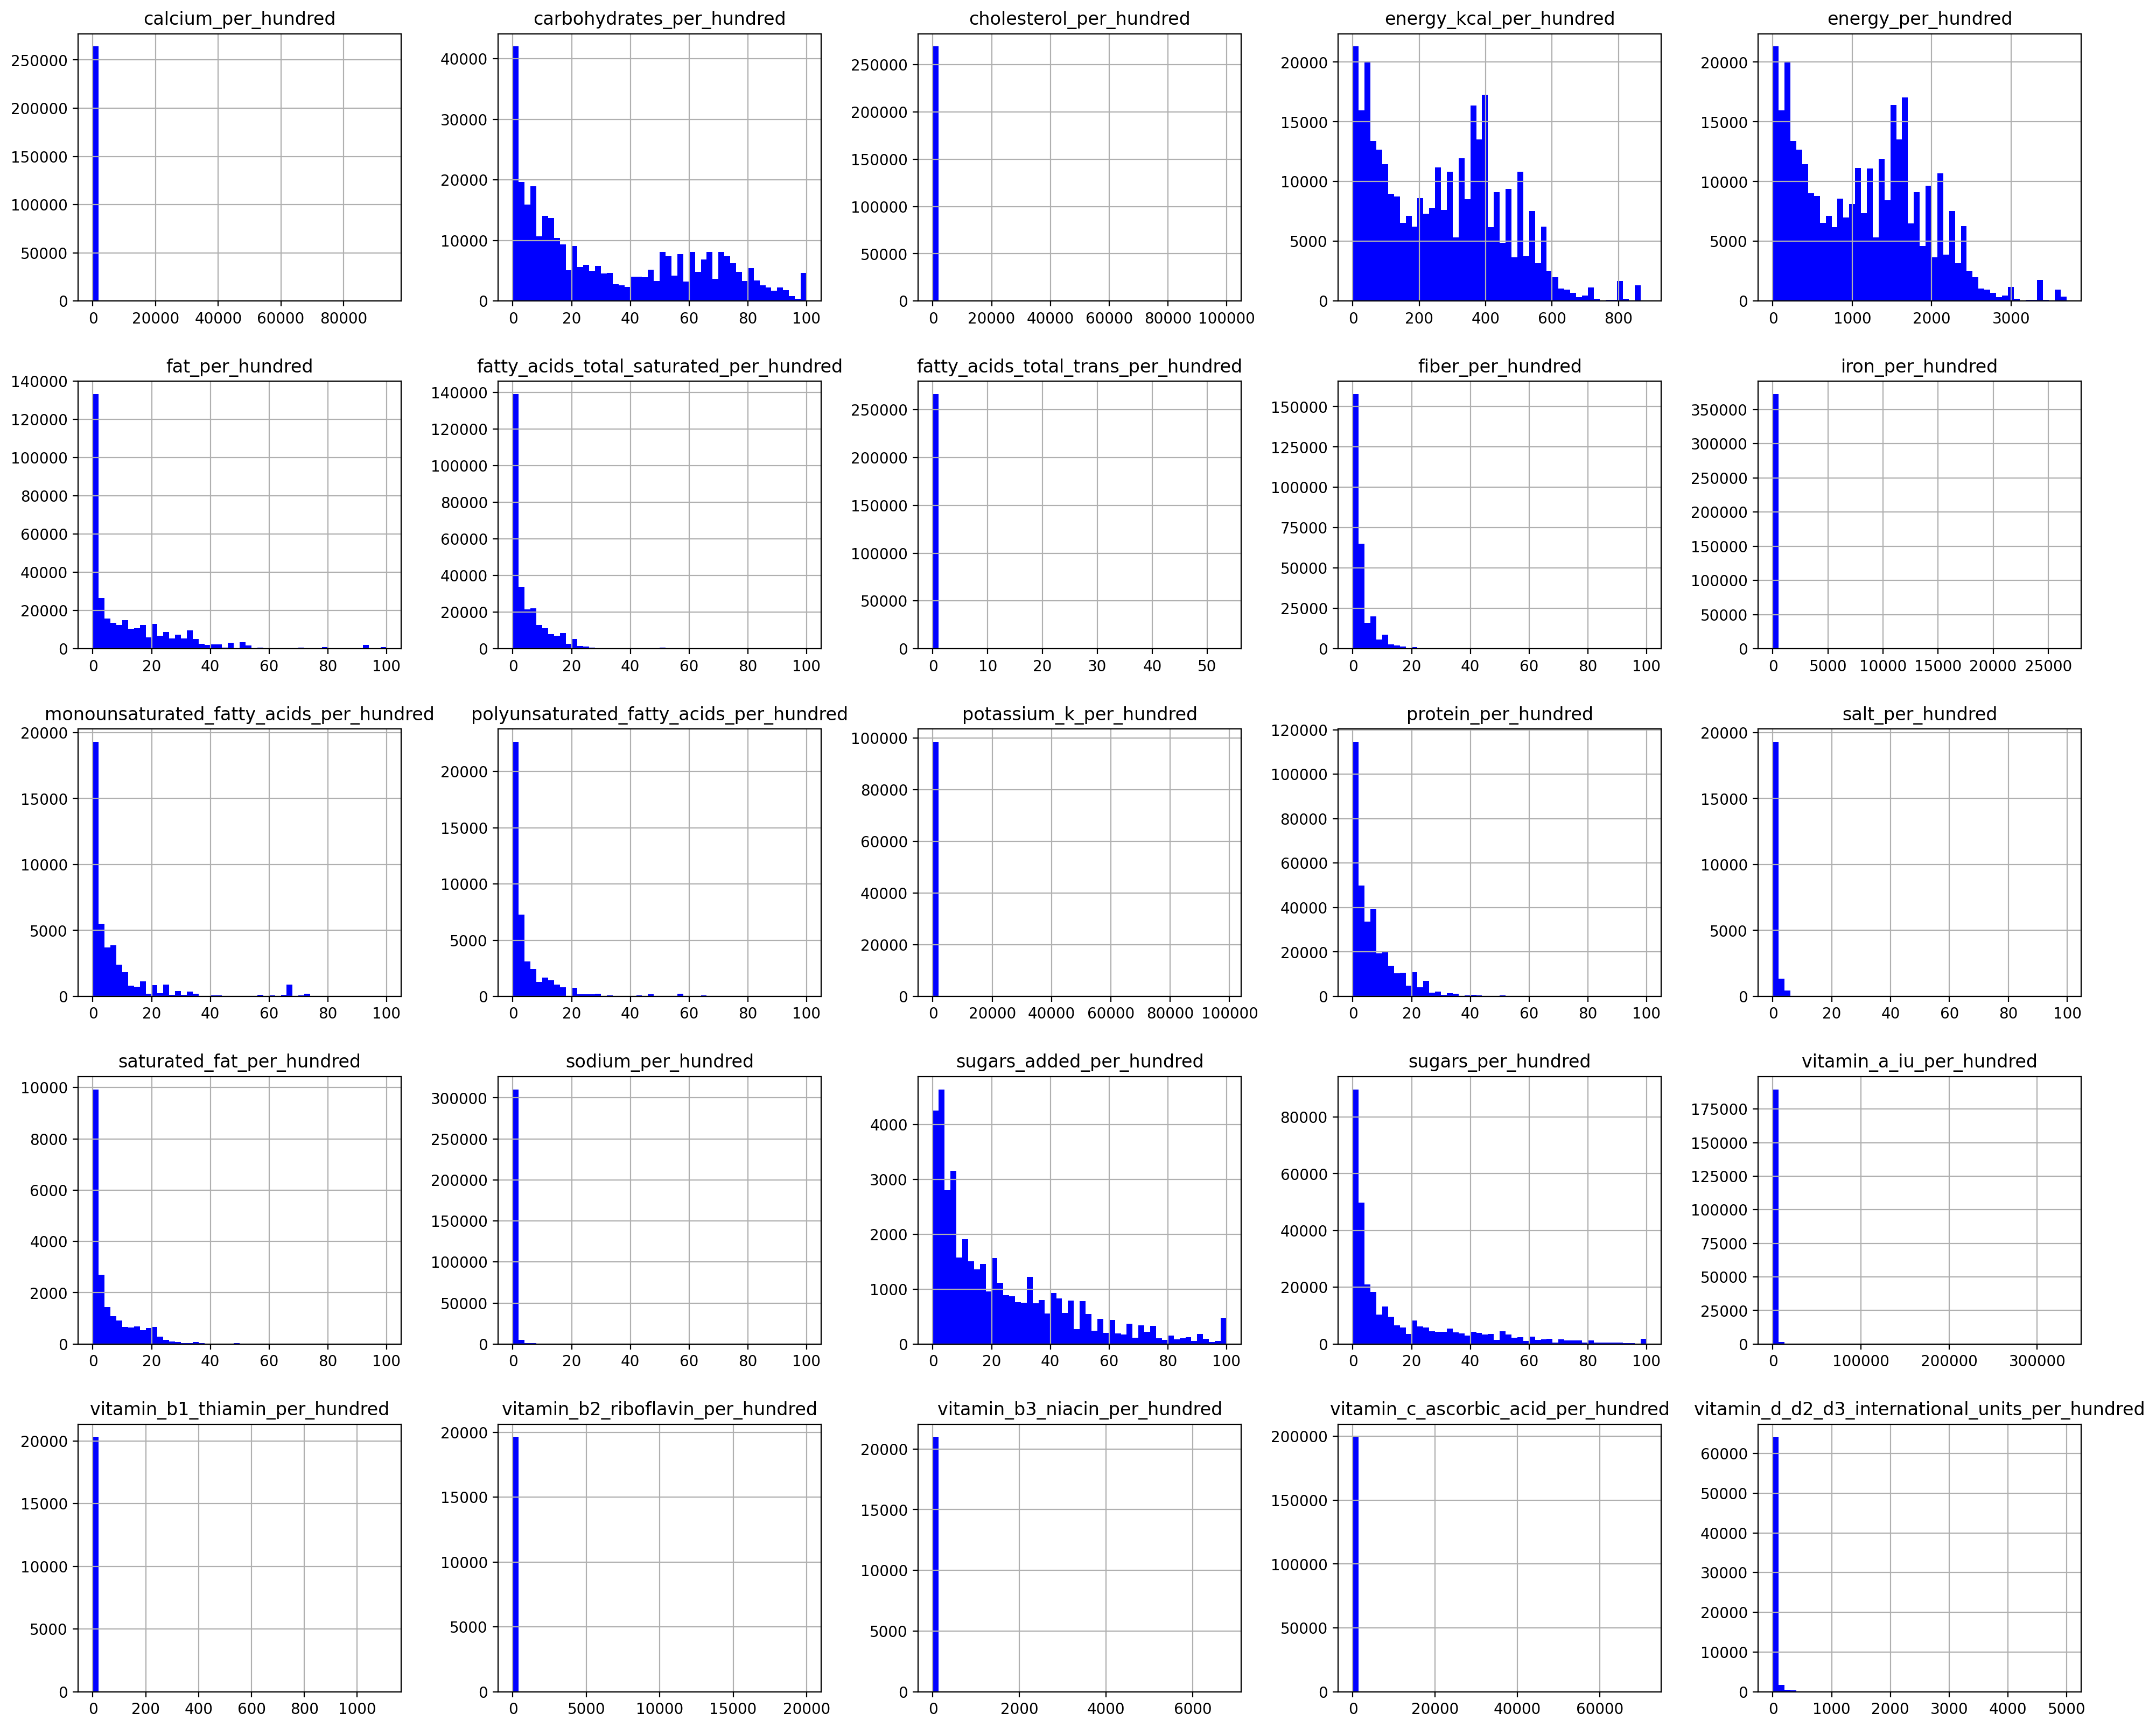

In [352]:
print(f"Roughly half of the histogram plots have values near zero as they dominate the frequency count.\n")

df_per_hundred.hist(bins= 50, figsize= (24, 20), color= "blue")

<br/>**4) Columns in our data set may be related to each other or pose constraints on one another. Unfortunately, this may also give rise to inconsistencies. Allowing for some rounding errors, your task is to investigate the three cases below and address any problems.**

**a. The column energy_per_hundred measures the energy content in kJ. Analyse its relationship with the column energy_kcal_per_hundred, for example using a scatterplot, identify potential problems and address them.**

The scatterplot shows that there are conflicting data points which may have arisen for various reasons. 

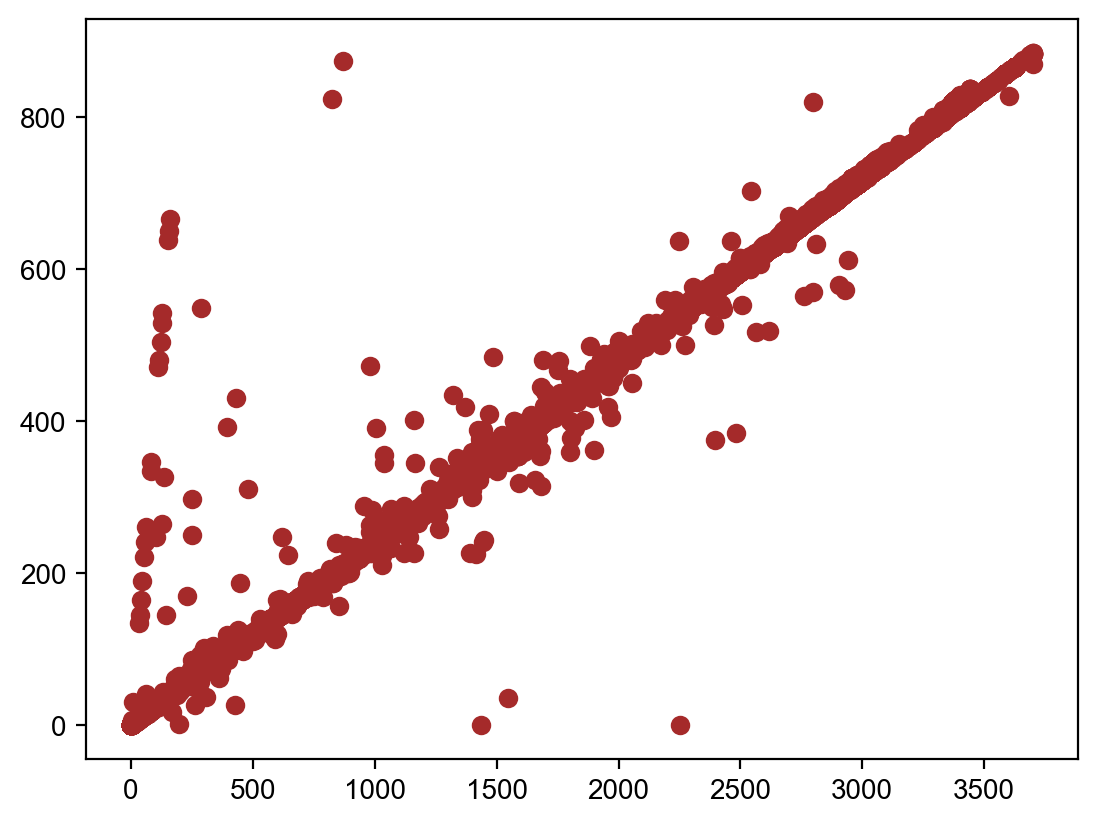

In [353]:
plt.scatter(df_per_hundred["energy_per_hundred"], df_per_hundred["energy_kcal_per_hundred"], color= "brown")
sns.set_style('darkgrid')
plt.show()

1)  A sample has the same kcal and kj value per hundred, greater than 0 -- to evaluate this statement, pandas *.query()* selects values that are alike, and .gt() selects rows that have values that are greater than 0. The filtered rows will be saved to a new variable.

In [354]:
nrg1 = df_per_hundred.query("energy_per_hundred == energy_kcal_per_hundred")

nrg1 = nrg1[nrg1["energy_kcal_per_hundred"].gt(0)]

nrg1

calcium_per_hundred  carbohydrates_per_hundred  \
11479                  NaN                       0.50   
24165                  NaN                      16.60   
24245                  NaN                      66.67   
28847                  NaN                        NaN   
37812                  NaN                      13.50   

       cholesterol_per_hundred  energy_kcal_per_hundred  energy_per_hundred  \
11479                      NaN                    250.0               250.0   
24165                      NaN                    145.0               145.0   
24245                      NaN                    430.0               430.0   
28847                      NaN                    824.0               824.0   
37812                      NaN                    393.0               393.0   

       fat_per_hundred  fatty_acids_total_saturated_per_hundred  \
11479            20.00                                      NaN   
24165             3.80                                      NaN   
24245            16.52                                      NaN   
28847            91.60                                      NaN   
37812             0.20                                      NaN   

       fatty_acids_total_trans_per_hundred  fiber_per_hundred  \
11479                                  NaN                NaN   
24165                                  NaN               57.7   
24245                                  NaN                NaN   
28847                                  NaN                NaN   
37812                                  NaN                4.6   

       iron_per_hundred  ...  saturated_fat_per_hundred  sodium_per_hundred  \
11479               0.0  ...                        NaN                 NaN   
24165               0.0  ...                        1.2                 NaN   
24245               0.0  ...                        NaN                 NaN   
28847               0.0  ...                       14.6                 NaN   
37812               0.0  ...                        0.0                 NaN   

       sugars_added_per_hundred  sugars_per_hundred  vitamin_a_iu_per_hundred  \
11479                       NaN                 NaN                       NaN   
24165                       NaN                2.54                       NaN   
24245                       NaN                 NaN                       NaN   
28847                       NaN                 NaN                       NaN   
37812                       NaN                0.80                       NaN   

       vitamin_b1_thiamin_per_hundred  vitamin_b2_riboflavin_per_hundred  \
11479                             NaN                                NaN   
24165                             NaN                                NaN   
24245                             NaN                                NaN   
28847                             NaN                                NaN   
37812                             NaN                                NaN   

       vitamin_b3_niacin_per_hundred  vitamin_c_ascorbic_acid_per_hundred  \
11479                            NaN                                  NaN   
24165                            NaN                                  NaN   
24245                            NaN                                  NaN   
28847                            NaN                                  NaN   
37812                            NaN                                  NaN   

       vitamin_d_d2_d3_international_units_per_hundred  
11479                                              NaN  
24165                                              NaN  
24245                                              NaN  
28847                                              NaN  
37812                                              NaN  

[5 rows x 25 columns]

<br/>The index of the variable *nrg1* references which rows to remove from the *per_hundred* list, and the variable *df_raw2* when *.drop()* is applied. 

In [355]:
df_per_hundred.drop(nrg1.index, inplace=True)

In [356]:
df_raw2.drop(nrg1.index, inplace=True)

2)  The kcal value is greater than the kj value -- to evaluate this statement, pandas *.query()* selects values in the *energy_per_hundred* column that are less than the values in the *energy_kcal_per_hundred* column.  The filtered rows will be saved to a new variable.

In [357]:
nrg2 = df_per_hundred.query("energy_per_hundred < energy_kcal_per_hundred")

nrg2

calcium_per_hundred  carbohydrates_per_hundred  \
3956                    NaN                       54.2   
7035                  135.0                        0.3   
7051                    NaN                        NaN   
14987                   NaN                       51.0   
19558                   NaN                        4.9   
21715                   NaN                        1.7   
23100                   NaN                       55.2   
25306                   NaN                        8.5   
37347                   NaN                        8.0   
37678                   NaN                        7.6   
37914                   NaN                        0.0   
39262                   NaN                        NaN   
40319                   NaN                        4.4   
41011                   NaN                       13.0   
41492                   NaN                       22.0   
42507                   NaN                       15.0   
43363                   NaN                       15.0   
45035                   NaN                       29.0   
45036                   NaN                        1.6   
45040                   NaN                        6.5   
45043                   NaN                        5.1   
45046                   NaN                        0.0   
373743                  NaN                        8.0   
374275                  NaN                       21.0   
374506                  NaN                        7.0   

        cholesterol_per_hundred  energy_kcal_per_hundred  energy_per_hundred  \
3956                        NaN                    265.0               125.0   
7035                        NaN                    334.0                80.0   
7051                        NaN                    327.0               137.0   
14987                       NaN                    297.0               252.0   
19558                       NaN                    190.0                46.0   
21715                       NaN                     30.0                 7.0   
23100                       NaN                    549.0               288.0   
25306                       NaN                    261.0                62.0   
37347                       NaN                    164.0                39.0   
37678                       NaN                    504.0               121.0   
37914                       NaN                    874.0               869.0   
39262                       NaN                    346.0                82.0   
40319                       NaN                    241.0                57.0   
41011                       NaN                    221.0                52.0   
41492                       NaN                    650.0               155.0   
42507                       NaN                    480.0               114.0   
43363                       NaN                    472.0               112.0   
45035                       NaN                    529.0               125.0   
45036                       NaN                    543.0               129.0   
45040                       NaN                    666.0               160.0   
45043                       NaN                    145.0                35.0   
45046                       NaN                      6.0                 2.0   
373743                      NaN                    134.0                32.0   
374275                      NaN                    639.0               153.0   
374506                      NaN                    247.0               102.0   

        fat_per_hundred  fatty_acids_total_saturated_per_hundred  \
3956                0.9                                      NaN   
7035                6.0                                      NaN   
7051               27.0                                      NaN   
14987               5.8                                      NaN   
19558               1.5                                      NaN   
21715     

<br/>The index of the variable *nrg2* references which rows to remove from the *per_hundred* list, and the variable *df_raw2* when *.drop()* is applied.

In [358]:
df_per_hundred.drop(nrg2.index, inplace=True)

In [359]:
df_raw2.drop(nrg2.index, inplace=True)

3)  A siginificant discrepancy betweeen a sample's kcal and kj values -- for example, a sample with 1000 kj should have an estimate kcal measurement of 239. Therefore the condition applied will target extreme values that have an *energy_per_hundred* data point greater than 1000, and an *energy_kcal_per_hundred* less than 200.  The filtered rows will be saved to a new variable.

In [360]:
nrg3 = (df_per_hundred[(df_per_hundred["energy_per_hundred"] > 1000) & 
                          (df_per_hundred["energy_kcal_per_hundred"] < 200)])

nrg3

calcium_per_hundred  carbohydrates_per_hundred  \
37750                  NaN                       72.0   
39086                  NaN                       77.0   
40872                  NaN                       57.5   

       cholesterol_per_hundred  energy_kcal_per_hundred  energy_per_hundred  \
37750                      NaN                     36.0              1548.0   
39086                      NaN                      0.0              1437.0   
40872                      NaN                      0.0              2252.0   

       fat_per_hundred  fatty_acids_total_saturated_per_hundred  \
37750              3.3                                      NaN   
39086              0.5                                      NaN   
40872             30.9                                      NaN   

       fatty_acids_total_trans_per_hundred  fiber_per_hundred  \
37750                                  NaN                4.4   
39086                                  NaN                NaN   
40872                                  NaN                NaN   

       iron_per_hundred  ...  saturated_fat_per_hundred  sodium_per_hundred  \
37750               0.0  ...                        0.7                 NaN   
39086               0.0  ...                        0.1                 NaN   
40872               0.0  ...                       10.6                 NaN   

       sugars_added_per_hundred  sugars_per_hundred  vitamin_a_iu_per_hundred  \
37750                       NaN                 1.5                       NaN   
39086                       NaN                46.0                       NaN   
40872                       NaN                 NaN                       NaN   

       vitamin_b1_thiamin_per_hundred  vitamin_b2_riboflavin_per_hundred  \
37750                             NaN                                NaN   
39086                             NaN                                NaN   
40872                             NaN                                NaN   

       vitamin_b3_niacin_per_hundred  vitamin_c_ascorbic_acid_per_hundred  \
37750                            NaN                                  NaN   
39086                            NaN                                  NaN   
40872                            NaN                                  NaN   

       vitamin_d_d2_d3_international_units_per_hundred  
37750                                              NaN  
39086                                              NaN  
40872                                              NaN  

[3 rows x 25 columns]

<br/>The index labels of the variable *nrg3* references which rows to remove from the *per_hundred* list when *.drop()* is applied. 

In [361]:
df_per_hundred.drop(nrg3.index, inplace=True)

In [362]:
df_raw2.drop(nrg3.index, inplace=True)

4) A sample with 0 kcal in the energy_kcal_per_hundred column and a value greater than 0 in the energy_per_hundred_column -- to evaluate this statement, the aforementioned condition will be applied and filter rows accordingly. The filtered rows will be saved to a new variable.

In [363]:
nrg4 = (df_per_hundred[(df_per_hundred["energy_per_hundred"] > 0) & 
                          (df_per_hundred["energy_kcal_per_hundred"] == 0)])

nrg4

calcium_per_hundred  carbohydrates_per_hundred  \
9755                    NaN                        0.0   
9757                    NaN                        0.0   
9861                    NaN                        0.5   
20092                   NaN                        0.0   
24127                   NaN                        0.0   
40004                   NaN                        0.1   
40801                   NaN                        0.0   
44913                   NaN                        0.5   
373364                  NaN                        0.0   

        cholesterol_per_hundred  energy_kcal_per_hundred  energy_per_hundred  \
9755                        NaN                      0.0                 2.0   
9757                        NaN                      0.0                 2.0   
9861                        NaN                      0.0                 2.0   
20092                       NaN                      0.0                 2.0   
24127                       NaN                      0.0                 1.0   
40004                       NaN                      0.0                 1.0   
40801                       NaN                      0.0                 2.0   
44913                       NaN                      0.0                 1.0   
373364                      NaN                      0.0                 2.0   

        fat_per_hundred  fatty_acids_total_saturated_per_hundred  \
9755                0.0                                      NaN   
9757                0.0                                      NaN   
9861                0.0                                      NaN   
20092               0.0                                      NaN   
24127               0.0                                      NaN   
40004               0.0                                      NaN   
40801               0.0                                      NaN   
44913               0.0                                      NaN   
373364              0.0                                      NaN   

        fatty_acids_total_trans_per_hundred  fiber_per_hundred  \
9755                                    NaN                0.0   
9757                                    NaN                0.0   
9861                                    NaN                0.0   
20092                                   NaN                0.0   
24127                                   NaN                0.0   
40004                                   NaN                NaN   
40801                                   NaN                0.0   
44913                                   NaN                0.0   
373364                                  NaN                0.0   

        iron_per_hundred  ...  saturated_fat_per_hundred  sodium_per_hundred  \
9755                 0.0  ...                        NaN                 NaN   
9757                 0.0  ...                        0.0                 NaN   
9861                 0.0  ...                        0.0                 NaN   
20092                0.0  ...                        0.0                 NaN   
24127                0.0  ...                        0.0                 NaN   
40004                0.0  ...                        0.0                 NaN   
40801                0.0  ...                        0.0                 NaN   
44913                0.0  ...                        0.0                 NaN   
373364               0.0  ...                        0.0                 NaN   

        sugars_added_per_hundred  sugars_per_hundred  \
9755                         NaN                 0.0   
9757                         NaN                 0.0   
9861                         NaN                 0.5   
20092                        NaN                 0.0   
24127                        NaN                 0.0   
40004                        NaN                 0.0   
40801                        NaN                 0.0   
44913                        NaN   

In [364]:
df_per_hundred.drop(nrg4.index, inplace=True)

In [365]:
df_raw2.drop(nrg4.index, inplace=True)

**b. The column energy_per_hundred is also related to the macronutrient columns (protein, fat, carbohydrates, salt, and fiber), because these macronutrients have a specific energy content in kJ per hundred gram (e.g. fat 37 kJ/g, protein and carbohydrates 17 kJ/g). Check these columns for potential inconsistency.**

To analyse potential inconsistencies, the sum of the macronutrient columns will be compared to the *energy_per_hundred* column.

The variable *df_macro* is a subset of the *per_hundred* list which stores the macronutrient columns. The column *energy_sum* calculates the sum of *carbohydratess_per_hundred*, *fat_per_hundred*, *protein_per_hundred*, *salt_per_hundred* and *fiber_per_hundred* for each sample. The *energy_per_hundred* column is excluded from the calculation. 

In [366]:
df_macro = df_per_hundred[['carbohydrates_per_hundred', 'fat_per_hundred', 'fiber_per_hundred', 'salt_per_hundred', 'protein_per_hundred',
                          'energy_per_hundred']]
                           
df_macro["energy_sum"] = df_macro.drop("energy_per_hundred", axis=1).sum(axis=1)

df_macro

C:\Users\Admin\AppData\Local\Temp\ipykernel_25816\2822402539.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_macro["energy_sum"] = df_macro.drop("energy_per_hundred", axis=1).sum(axis=1)


carbohydrates_per_hundred  fat_per_hundred  fiber_per_hundred  \
0                           75.00             0.42                NaN   
1                            1.50            18.00                0.0   
2                           52.68            12.08                NaN   
3                           70.40             7.90                9.1   
4                           37.00            44.00                9.0   
...                           ...              ...                ...   
374878                      17.00            13.00                NaN   
374879                        NaN              NaN                NaN   
374881                      22.00            46.00                NaN   
374882                        NaN              NaN                NaN   
374883                        NaN              NaN                NaN   

        salt_per_hundred  protein_per_hundred  energy_per_hundred  energy_sum  
0                    NaN                11.00              1500.0       86.42  
1                   0.50                19.00              1010.0       39.00  
2                   0.25                19.05              1358.3       84.06  
3                    NaN                 6.80              1679.0       94.20  
4                   0.06                 8.00              2470.0       98.06  
...                  ...                  ...                 ...         ...  
374878              1.10                 4.30               858.0       35.40  
374879               NaN                  NaN                 NaN        0.00  
374881              0.02                12.50              2418.0       80.52  
374882               NaN                  NaN                 NaN        0.00  
374883               NaN                  NaN                 NaN        0.00  

[372800 rows x 7 columns]

<br>Moreover, *df_macro* will store the columns *energy_per_hundred*, *energy_sum* and *difference*; the *difference* column is the difference between corresponding *energy_sum* and *energy_per_hundred* values for each row. 

Index labels with values in the *difference* column that are more than 15 kilojoules will be removed from the *per_hundred* list and the variable *df_raw2* using pandas *.drop()* function. 

In [367]:
df_macro = df_macro[["energy_sum", "energy_per_hundred"]].query("energy_sum > energy_per_hundred").sort_values(by=["energy_sum"], ascending=False)

df_macro["difference"] = df_macro["energy_sum"] - df_macro["energy_per_hundred"]

df_macro = df_macro.loc[df_macro["difference"] > 15]

df_macro

energy_sum  energy_per_hundred  difference
259970      200.00                 0.0      200.00
92193       200.00                 0.0      200.00
277647      200.00                 0.0      200.00
150821      200.00                 0.0      200.00
211804      200.00                 0.0      200.00
...            ...                 ...         ...
226399       15.93                 0.0       15.93
168521       15.60                 0.0       15.60
71271        15.34                 0.0       15.34
335212       15.25                 0.0       15.25
78352        15.04                 0.0       15.04

[1121 rows x 3 columns]

In [368]:
df_per_hundred.drop(df_macro.index, inplace=True)

In [369]:
df_raw2.drop(df_macro.index, inplace=True)

<br>

In [370]:
print(f"The 'per_hundred' list now has {df_per_hundred.shape[0]} rows.")

The 'per_hundred' list now has 371679 rows.


In [371]:
print(f"The variable 'df_raw2' also has {df_raw2.shape[0]} rows.")

The variable 'df_raw2' also has 371679 rows.


<br/>**c. The main macronutrients (protein, fat, carbohydrates, and fiber) make up the bulk of a product. However, the overall contribution per hundred gram is limited by the presence of other macronutrients. Check for inconsistency.**

Sugars, and added sugars contribute to the total amount of carbohydrates per hundred in a food product. Therefore, if a sample has a value in the *sugars_per_hundred* or *sugars_added_per_hundred* column greater than the value in the *carbohydrates_per_hundred* column, the data points are likely unrealistic.

Pandas *.query()* selects values in the *carbohydrates_per_hundred* column that are less than the values in the *sugars_added_per_hundred* and *sugars_per_hundred* columns.  The filtered rows, and the aforementioned columns will be saved to a new variable.

In addtion, the difference between the *carbohydrates_per_hundred* and the two columns will be calculated independantly. Index labels with values in the *difference* column that are more than 0.1 kilojoules will be removed from the *per_hundred* list and the variable *df_raw2* using pandas *.drop()* function. I've opted for 0.1 kilojoules to accomodate minor rounding variations.

In [372]:
carbs1 = df_per_hundred[[ "sugars_added_per_hundred", "carbohydrates_per_hundred"]].query("carbohydrates_per_hundred < sugars_added_per_hundred")

carbs1["difference"] = carbs1["sugars_added_per_hundred"] - carbs1["carbohydrates_per_hundred"]

carbs1 = carbs1.loc[carbs1["difference"] > 0.1].sort_values(by= ["difference"], ascending=False)

carbs1

sugars_added_per_hundred  carbohydrates_per_hundred  difference
257068                     100.0                       0.00      100.00
353045                      93.3                       0.09       93.21
361007                      93.3                       0.12       93.18
342995                      91.7                       0.09       91.61
100428                      83.3                       0.00       83.30
...                          ...                        ...         ...
198112                       0.8                       0.42        0.38
193276                       0.8                       0.42        0.38
139181                       0.8                       0.42        0.38
219601                       1.8                       1.49        0.31
335549                       0.2                       0.00        0.20

[77 rows x 3 columns]

<br/>

In [373]:
df_per_hundred.drop(carbs1.index, inplace=True)

In [374]:
df_raw2.drop(carbs1.index, inplace=True)

<br/>

In [375]:
print(f"The 'per_hundred list' now has {df_per_hundred.shape[0]} rows.")

The 'per_hundred list' now has 371602 rows.


In [376]:
print(f"The variable 'df_raw2' also has {df_raw2.shape[0]} rows.")

The variable 'df_raw2' also has 371602 rows.


<br/> 

In [377]:
carbs2 = df_per_hundred[["sugars_per_hundred", "carbohydrates_per_hundred"]].query("carbohydrates_per_hundred < sugars_per_hundred")

carbs2["difference"] = carbs2["sugars_per_hundred"] - carbs2["carbohydrates_per_hundred"]

carbs2 = carbs2.loc[carbs2["difference"] > 0.1].sort_values(by= ["difference"], ascending=False)

carbs2

sugars_per_hundred  carbohydrates_per_hundred  difference
250756              100.00                       0.11       99.89
205291              100.00                       0.11       99.89
113168               93.33                       0.00       93.33
233271              100.00                      10.00       90.00
200729               93.33                       3.33       90.00
...                    ...                        ...         ...
273013                2.40                       2.20        0.20
148898                2.40                       2.20        0.20
54710                12.50                      12.33        0.17
52110                11.41                      11.26        0.15
52085                 0.48                       0.35        0.13

[905 rows x 3 columns]

<br/>

In [378]:
df_per_hundred.drop(carbs2.index, inplace=True)

In [379]:
df_raw2.drop(carbs2.index, inplace=True)

<br/>

In [380]:
print(f"The 'per_hundred list' now has {df_per_hundred.shape[0]} rows.")

The 'per_hundred list' now has 370697 rows.


In [381]:
print(f"The variable 'df_raw2' also has {df_raw2.shape[0]} rows.")

The variable 'df_raw2' also has 370697 rows.


<br> If the sum of the sugar and sugar added measurements is greater than the total carbohydrates per hundred quantity of a food product, the values are likely unrealistic. 

The variable *df_carbs* is a subset of the *per_hundred* list that stores all carbohydrates, sugars, and sugars added measurements. The column *carb_types_sum* calculates the sum of *sugars_per_hundred* and *sugars_added_per_hundred* for each sample. The *carbohydrates_per_hundred* column is excluded from the calculation. 

In [382]:
df_carbs = df_per_hundred[['carbohydrates_per_hundred', 'sugars_per_hundred', 'sugars_added_per_hundred']]

df_carbs["sugars_sum"] = df_carbs.drop("carbohydrates_per_hundred", axis=1).sum(axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_25816\582692195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_carbs["sugars_sum"] = df_carbs.drop("carbohydrates_per_hundred", axis=1).sum(axis=1)


In [383]:
df_carbs = df_carbs[["sugars_sum", "carbohydrates_per_hundred"]].query("carbohydrates_per_hundred < sugars_sum").sort_values(by=["sugars_sum"], ascending=False)

df_carbs

sugars_sum  carbohydrates_per_hundred
253698       200.0                     100.00
371751       200.0                     100.00
310971       200.0                     100.00
369674       200.0                     100.00
282737       200.0                     100.00
...            ...                        ...
198271         0.4                       0.20
216846         0.1                       0.08
7076           0.1                       0.00
41349          0.1                       0.00
21922          0.1                       0.00

[24490 rows x 2 columns]

<br/>As the filtered rows contain unrealistic values, the index labels will be referenced and dropped using *index()* and *.drop()* from the *df_per_hundred* list and the variable *df_raw2*.

In [384]:
df_per_hundred.drop(df_carbs.index, inplace=True)

In [385]:
df_raw2.drop(df_carbs.index, inplace=True)

<br>

In [386]:
print(f"The 'per_hundred list' now has {df_per_hundred.shape[0]} rows.")

The 'per_hundred list' now has 346207 rows.


In [387]:
print(f"The variable 'df_raw2' also has {df_raw2.shape[0]} rows.")

The variable 'df_raw2' also has 346207 rows.


<br/>The columns **fatty_acids_total_saturated_per_hundred**, **fatty_acids_total_trans_per_hundred**, **monounsaturated_fatty_acids_per_hundred**, **polyunsaturated_fatty_acids_per_hundred**, and **saturated_fat_per_hundred**, contribute to the total value of the **fat_per_hundred** column. If the fatty acids and saturated fat nutrients have a value greater than the data point in the *fat_per_hundred* column, the values may not be realistic.

<br> Pandas *.query()* selects values in the *fat_per_hundred* column that are less than the values in the aforementioned columns. Filtered rows will be saved to new variables. Thereafter, pandas *.drop()* function is applied to remove the rows with unrealistic values from the columns in the *df_per_hundred* list and the variable *df_raw2*.

In [388]:
fats1 = df_per_hundred[["fatty_acids_total_saturated_per_hundred", "fat_per_hundred"]].query("fat_per_hundred < fatty_acids_total_saturated_per_hundred")

fats1

fatty_acids_total_saturated_per_hundred  fat_per_hundred
46780                                      0.42             0.00
47653                                      6.61             4.41
51768                                     27.59            24.14
52028                                      1.77             1.33
53196                                      3.10             0.88
...                                         ...              ...
368039                                     0.67             0.00
368565                                    23.33             3.33
370360                                     2.20             0.88
371047                                     0.50             0.42
372279                                     0.01             0.00

[301 rows x 2 columns]

<br>

In [389]:
df_per_hundred.drop(fats1.index, inplace=True)

In [390]:
df_raw2.drop(fats1.index, inplace=True)

<br/>

In [391]:
print(f"The 'per_hundred list' now has {df_per_hundred.shape[0]} rows.")

The 'per_hundred list' now has 345906 rows.


In [392]:
print(f"The variable 'df_raw2' also has {df_raw2.shape[0]} rows.")

The variable 'df_raw2' also has 345906 rows.


<br>

In [393]:
fats2 = df_per_hundred[["fatty_acids_total_trans_per_hundred", "fat_per_hundred"]].query("fat_per_hundred < fatty_acids_total_trans_per_hundred")

fats2

fatty_acids_total_trans_per_hundred  fat_per_hundred
214421                                12.50             5.00
232359                                44.25             1.77
234131                                 2.63             2.11
284454                                 4.90             3.92

<br>

In [394]:
fats3 = df_per_hundred[["monounsaturated_fatty_acids_per_hundred", "fat_per_hundred"]].query("fat_per_hundred < monounsaturated_fatty_acids_per_hundred")

fats3

monounsaturated_fatty_acids_per_hundred  fat_per_hundred
16989                                     33.00            28.50
53513                                      0.01             0.00
148728                                     1.76             0.00
194568                                   100.00            30.00
210801                                     3.53             2.94
218815                                     0.01             0.00
239202                                    11.11             3.03
294435                                    10.00             6.67
294827                                     8.33             5.00
300289                                    33.33             0.00
307506                                     5.00             3.33
315527                                     0.18             0.00
315532                                     0.45             0.00
341371                                    51.33            40.00

<br>

In [395]:
df_per_hundred.drop(fats3.index, inplace=True)

In [396]:
df_raw2.drop(fats3.index, inplace=True)

<br>

In [397]:
print(f"The 'per_hundred list' now has {df_per_hundred.shape[0]} rows.")

The 'per_hundred list' now has 345892 rows.


In [398]:
print(f"The variable 'df_raw2' also has {df_raw2.shape[0]} rows.")

The variable 'df_raw2' also has 345892 rows.


<br>

In [399]:
fats4= df_per_hundred[["polyunsaturated_fatty_acids_per_hundred", "fat_per_hundred"]].query("fat_per_hundred < polyunsaturated_fatty_acids_per_hundred")

fats4

polyunsaturated_fatty_acids_per_hundred  fat_per_hundred
1754                                      95.00             0.00
13794                                     62.00             0.20
95064                                     10.71             1.79
95913                                     66.67             0.00
105252                                     4.55             0.00
137233                                    33.33            20.00
153365                                     3.42             2.14
192380                                     1.67             0.83
201659                                     4.69             3.91
221362                                    25.81             4.84
323645                                     2.50             1.67
327709                                     2.50             1.67

<br>

In [400]:
df_per_hundred.drop(fats4.index, inplace=True)

In [401]:
df_raw2.drop(fats4.index, inplace=True)

<br>

In [402]:
print(f"The 'per_hundred list' now has {df_per_hundred.shape[0]} rows.")

The 'per_hundred list' now has 345880 rows.


In [403]:
print(f"The variable 'df_raw2' also has {df_raw2.shape[0]} rows.")

The variable 'df_raw2' also has 345880 rows.


<br>

In [404]:
fats5 = df_per_hundred[["saturated_fat_per_hundred", "fat_per_hundred"]].query("fat_per_hundred < saturated_fat_per_hundred")

fats5

saturated_fat_per_hundred  fat_per_hundred
5646                         18.3              3.5
13908                         4.7              3.2
13974                         0.5              0.2
16561                        76.2             12.0
16818                        15.0              6.0
18404                         0.5              0.0
19654                         1.5              0.3
20859                         0.1              0.0
21575                        16.0              2.9
22004                         0.1              0.0
22591                        16.0              8.4
23556                        12.0              0.8
25311                        15.9              9.5
26386                       100.0              0.0
26527                         6.2              0.5
27256                        11.5              0.0
29668                        12.0              0.0
33675                         0.3              0.0
34628                        99.4             46.0
35906                         0.1              0.0
37701                         0.2              0.0
37725                         0.3              0.0
39382                         0.1              0.0
39888                         0.1              0.0
41675                         1.0              0.5
373389                       44.0             12.0
373574                        0.5              0.2

<br>

In [405]:
df_per_hundred.drop(fats5.index, inplace=True)

In [406]:
df_raw2.drop(fats5.index, inplace=True)

<br>

In [407]:
print(f"The 'per_hundred list' now has {df_per_hundred.shape[0]} rows.")

The 'per_hundred list' now has 345853 rows.


In [408]:
print(f"The variable 'df_raw2' also has {df_raw2.shape[0]} rows.")

The variable 'df_raw2' also has 345853 rows.


<br>

Lastly, if the sum of all the fat types is greater than the total fat per hundred quantity of a food product, the input values are likely unrealistic. 

The variable *df_fats* is a subset of the *per_hundred* list that stores all fat measurements. The column *fat_types_sum* calculates the sum of all the fat types for each sample. The *fat_per_hundred* column is excluded from the calculation. 

In [409]:
df_fats = df_per_hundred[['fat_per_hundred', 'fatty_acids_total_saturated_per_hundred', 'fatty_acids_total_trans_per_hundred',
                          'monounsaturated_fatty_acids_per_hundred', 'polyunsaturated_fatty_acids_per_hundred', 'saturated_fat_per_hundred']]

df_fats["fat_types_sum"] = df_fats.drop("fat_per_hundred", axis=1).sum(axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_25816\427022980.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fats["fat_types_sum"] = df_fats.drop("fat_per_hundred", axis=1).sum(axis=1)


<br> Pandas *.query()* selects values in the *fat_per_hundred* column that are less than the values in the *fat_types_sum* column. Filtered rows will be saved to the variable *df_fats*. 

In [410]:
df_fats = df_fats[["fat_types_sum", "fat_per_hundred"]].query("fat_per_hundred < fat_types_sum").sort_values(by=["fat_types_sum"], ascending=False)

df_fats

fat_types_sum  fat_per_hundred
231799         117.86           100.00
351854         116.67            93.33
351590         116.67            93.33
342717         116.67            93.33
342228         116.67            93.33
...               ...              ...
98100            0.14             0.07
51484            0.06             0.05
52068            0.06             0.05
52368            0.06             0.05
53203            0.06             0.05

[3409 rows x 2 columns]

Pandas *.drop()* function is applied to remove the rows with unrealistic values from the columns in the *df_per_hundred* list and the variable *df_raw2*.

In [411]:
df_per_hundred.drop(df_fats.index, inplace=True)

In [412]:
df_raw2.drop(df_fats.index, inplace=True)

<br>

In [413]:
print(f"The 'per_hundred list' now has {df_per_hundred.shape[0]} rows.")

The 'per_hundred list' now has 342444 rows.


In [414]:
print(f"The variable 'df_raw2' also has {df_raw2.shape[0]} rows.")

The variable 'df_raw2' also has 342444 rows.


<br> **Revisiting the *energy_per_hundred* and *energy_kcal_per_hundred* columns**

As the energy count of a food product is an important measurement, I've opted to remove rows that have NaN values in both the *energy_per_hundred* and *energy_kcal_per_hundred* columns from the *per_hundred* list , and the variable *df_raw2*.

In [415]:
print(f"{df_per_hundred[(df_per_hundred['energy_per_hundred'].isnull()) & (df_per_hundred['energy_kcal_per_hundred'].isnull())].shape[0]}\
 rows have data points with a NaN value which is {round(35583 / 342444 * 100)}% of the data.")

35583 rows have data points with a NaN value which is 10% of the data.


<br>

In [416]:
nrg5 = df_per_hundred[(df_per_hundred['energy_per_hundred'].isnull()) & (df_per_hundred['energy_kcal_per_hundred'].isnull())]

nrg5

calcium_per_hundred  carbohydrates_per_hundred  \
11                      NaN                       46.2   
17                      NaN                       35.8   
19                      NaN                       52.8   
25                      NaN                        NaN   
29                      NaN                        NaN   
...                     ...                        ...   
374875                  NaN                        NaN   
374876                  NaN                        NaN   
374879                  NaN                        NaN   
374882                  NaN                        NaN   
374883                  NaN                        NaN   

        cholesterol_per_hundred  energy_kcal_per_hundred  energy_per_hundred  \
11                          NaN                      NaN                 NaN   
17                          NaN                      NaN                 NaN   
19                          NaN                      NaN                 NaN   
25                          NaN                      NaN                 NaN   
29                          NaN                      NaN                 NaN   
...                         ...                      ...                 ...   
374875                      NaN                      NaN                 NaN   
374876                      NaN                      NaN                 NaN   
374879                      NaN                      NaN                 NaN   
374882                      NaN                      NaN                 NaN   
374883                      NaN                      NaN                 NaN   

        fat_per_hundred  fatty_acids_total_saturated_per_hundred  \
11                  NaN                                      NaN   
17                  NaN                                      NaN   
19                  NaN                                      NaN   
25                  NaN                                      NaN   
29                  NaN                                      NaN   
...                 ...                                      ...   
374875              NaN                                      NaN   
374876              NaN                                      NaN   
374879              NaN                                      NaN   
374882              NaN                                      NaN   
374883              NaN                                      NaN   

        fatty_acids_total_trans_per_hundred  fiber_per_hundred  \
11                                      NaN               10.0   
17                                      NaN                8.1   
19                                      NaN                9.8   
25                                      NaN                NaN   
29                                      NaN                NaN   
...                                     ...                ...   
374875                                  NaN                NaN   
374876                                  NaN                NaN   
374879                                  NaN                NaN   
374882                                  NaN                NaN   
374883                                  NaN                NaN   

        iron_per_hundred  ...  saturated_fat_per_hundred  sodium_per_hundred  \
11                   0.0  ...                        NaN                 NaN   
17                   3.9  ...                        NaN                 NaN   
19                   0.0  ...                        NaN                 NaN   
25                   0.0  ...                        NaN                 NaN   
29                   0.0  ...                        NaN                 NaN   
...                  ...  ...                        ...                 ...   
374875               0.0  ...                        NaN                 NaN   
374876               0.0  ...                        NaN                 NaN   
374879              

<br/>

The column *iron_per_hundred* no longer has missing values. Therefore, by visualising the count of non-missing values to identify the column with the least sum of NaN values other than *iron_per_hundred* will help determine whether deleting the filtered index labels from the *per_hundred* list and the variable *df_raw2* is reasonable.

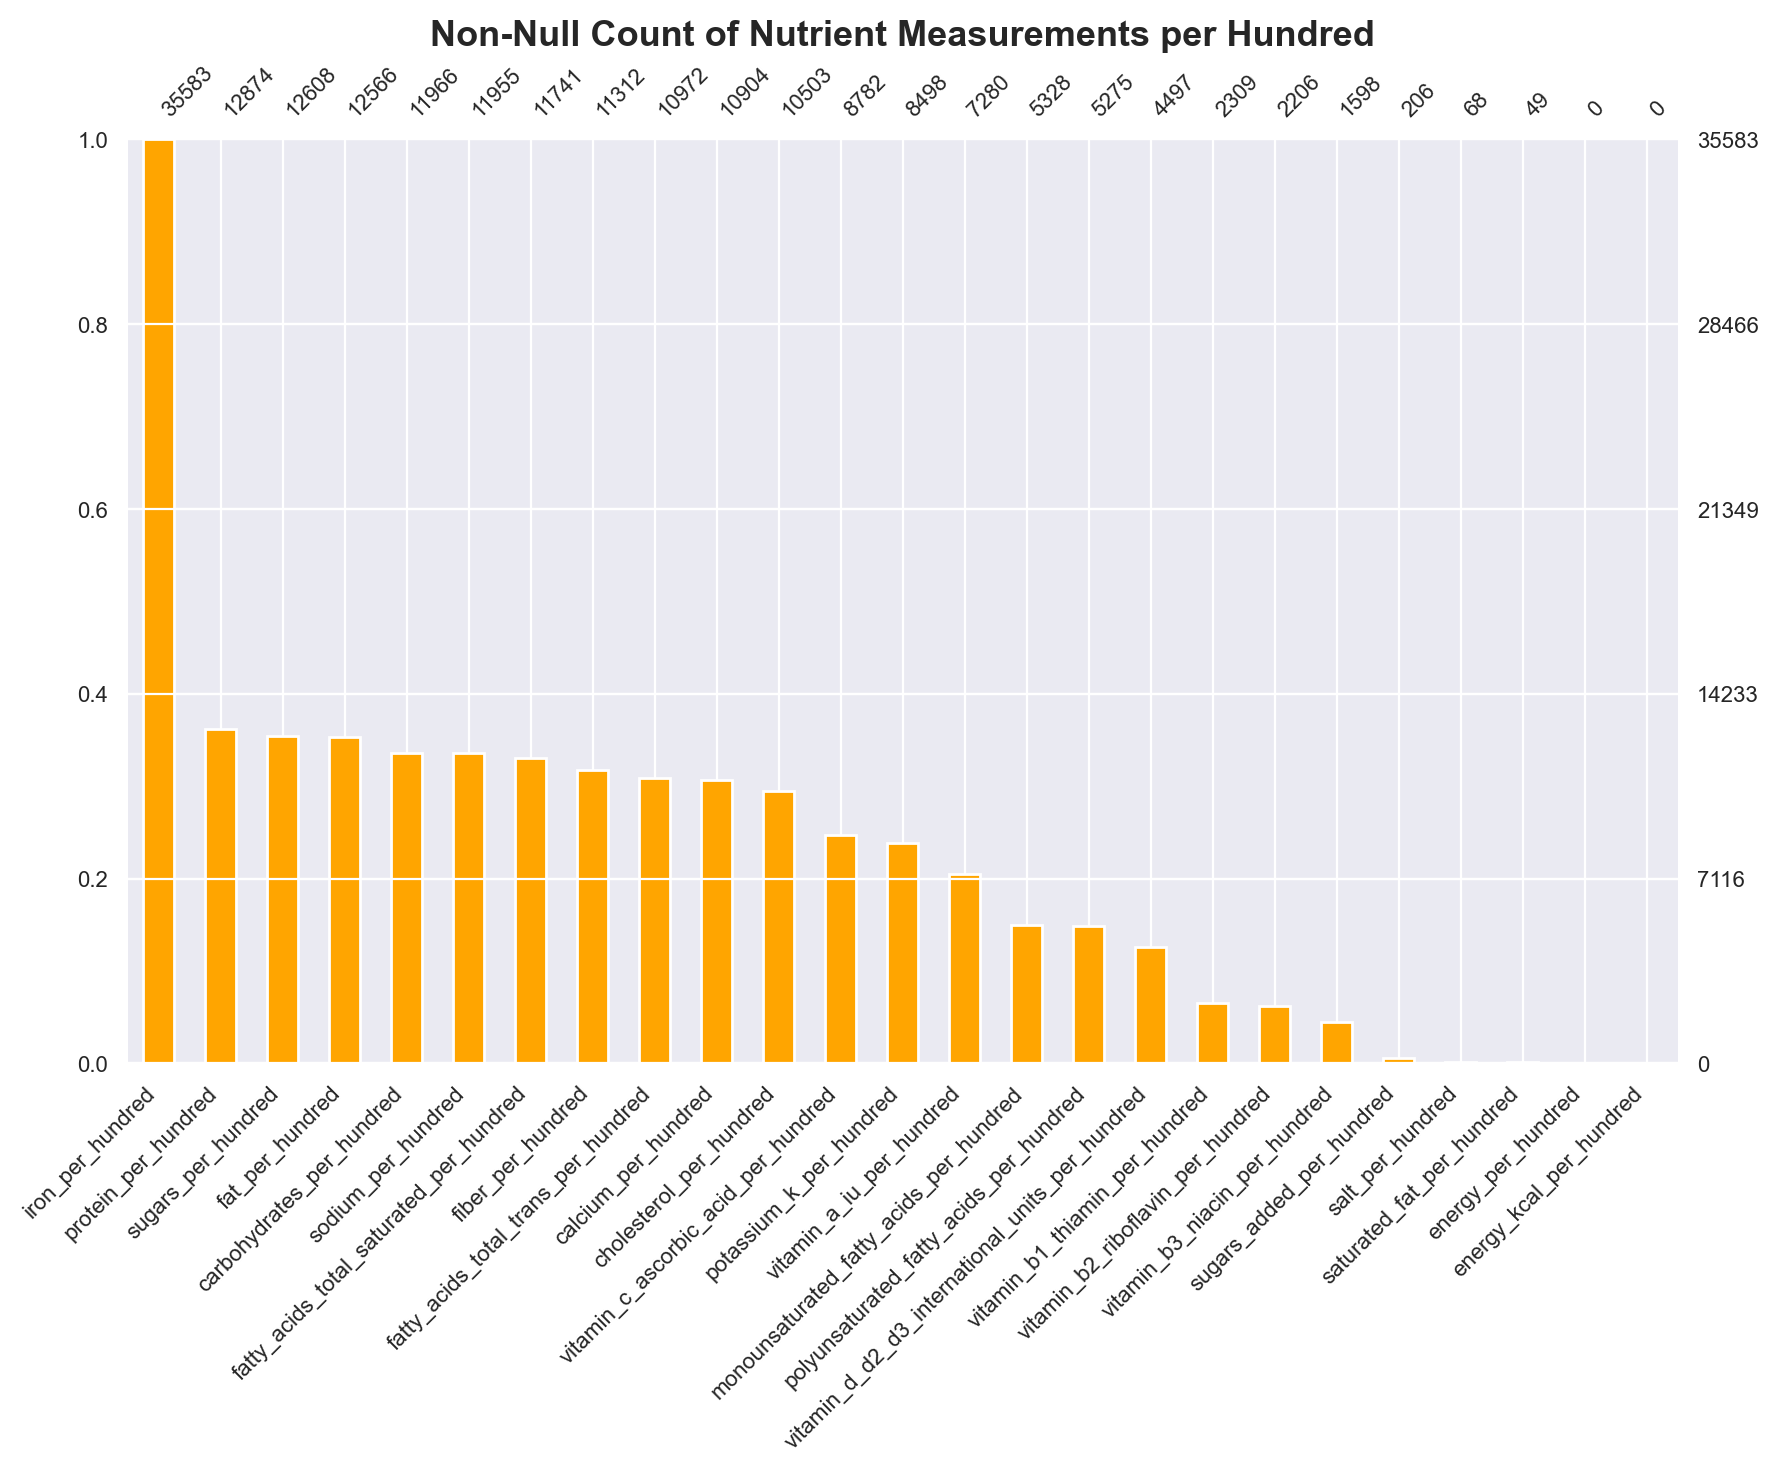

In [417]:
msno.bar(nrg5, figsize=(10,6), fontsize=8, color="orange", sort="descending")

plt.title("Non-Null Count of Nutrient Measurements per Hundred", fontweight="bold", fontsize=13)
plt.show()

In [418]:
print(f"The column 'protein_per_hundred' has the least amount of NaN values which is {nrg5.drop('iron_per_hundred', axis=1).notnull().sum().max()}.")

The column 'protein_per_hundred' has the least amount of NaN values which is 12874.


<br>

In [419]:
print(f"As the percentage of the least amount of non-missing values is {round(nrg5.drop('iron_per_hundred', axis=1).notnull().sum().max() / df_raw2.shape[0] * 100)}%,\
 realtive to the entire dataset, removing the filtered rows is plausable.")

As the percentage of the least amount of non-missing values is 4%, realtive to the entire dataset, removing the filtered rows is plausable.


<br>

In [420]:
df_per_hundred.drop(nrg5.index, inplace=True)

In [421]:
df_raw2.drop(nrg5.index, inplace=True)

<br>

In [422]:
print(f"The 'per_hundred' list now has {df_per_hundred.shape[0]} rows.")

The 'per_hundred' list now has 306861 rows.


In [423]:
print(f"The variable 'df_raw2' now has {df_per_hundred.shape[0]} rows.")

The variable 'df_raw2' now has 306861 rows.


<br>

Roughly half of the histogram plots have values near zero.

array([[<AxesSubplot:title={'center':'calcium_per_hundred'}>,
        <AxesSubplot:title={'center':'carbohydrates_per_hundred'}>,
        <AxesSubplot:title={'center':'cholesterol_per_hundred'}>,
        <AxesSubplot:title={'center':'energy_kcal_per_hundred'}>,
        <AxesSubplot:title={'center':'energy_per_hundred'}>],
       [<AxesSubplot:title={'center':'fat_per_hundred'}>,
        <AxesSubplot:title={'center':'fatty_acids_total_saturated_per_hundred'}>,
        <AxesSubplot:title={'center':'fatty_acids_total_trans_per_hundred'}>,
        <AxesSubplot:title={'center':'fiber_per_hundred'}>,
        <AxesSubplot:title={'center':'iron_per_hundred'}>],
       [<AxesSubplot:title={'center':'monounsaturated_fatty_acids_per_hundred'}>,
        <AxesSubplot:title={'center':'polyunsaturated_fatty_acids_per_hundred'}>,
        <AxesSubplot:title={'center':'potassium_k_per_hundred'}>,
        <AxesSubplot:title={'center':'protein_per_hundred'}>,
        <AxesSubplot:title={'center':'salt_per

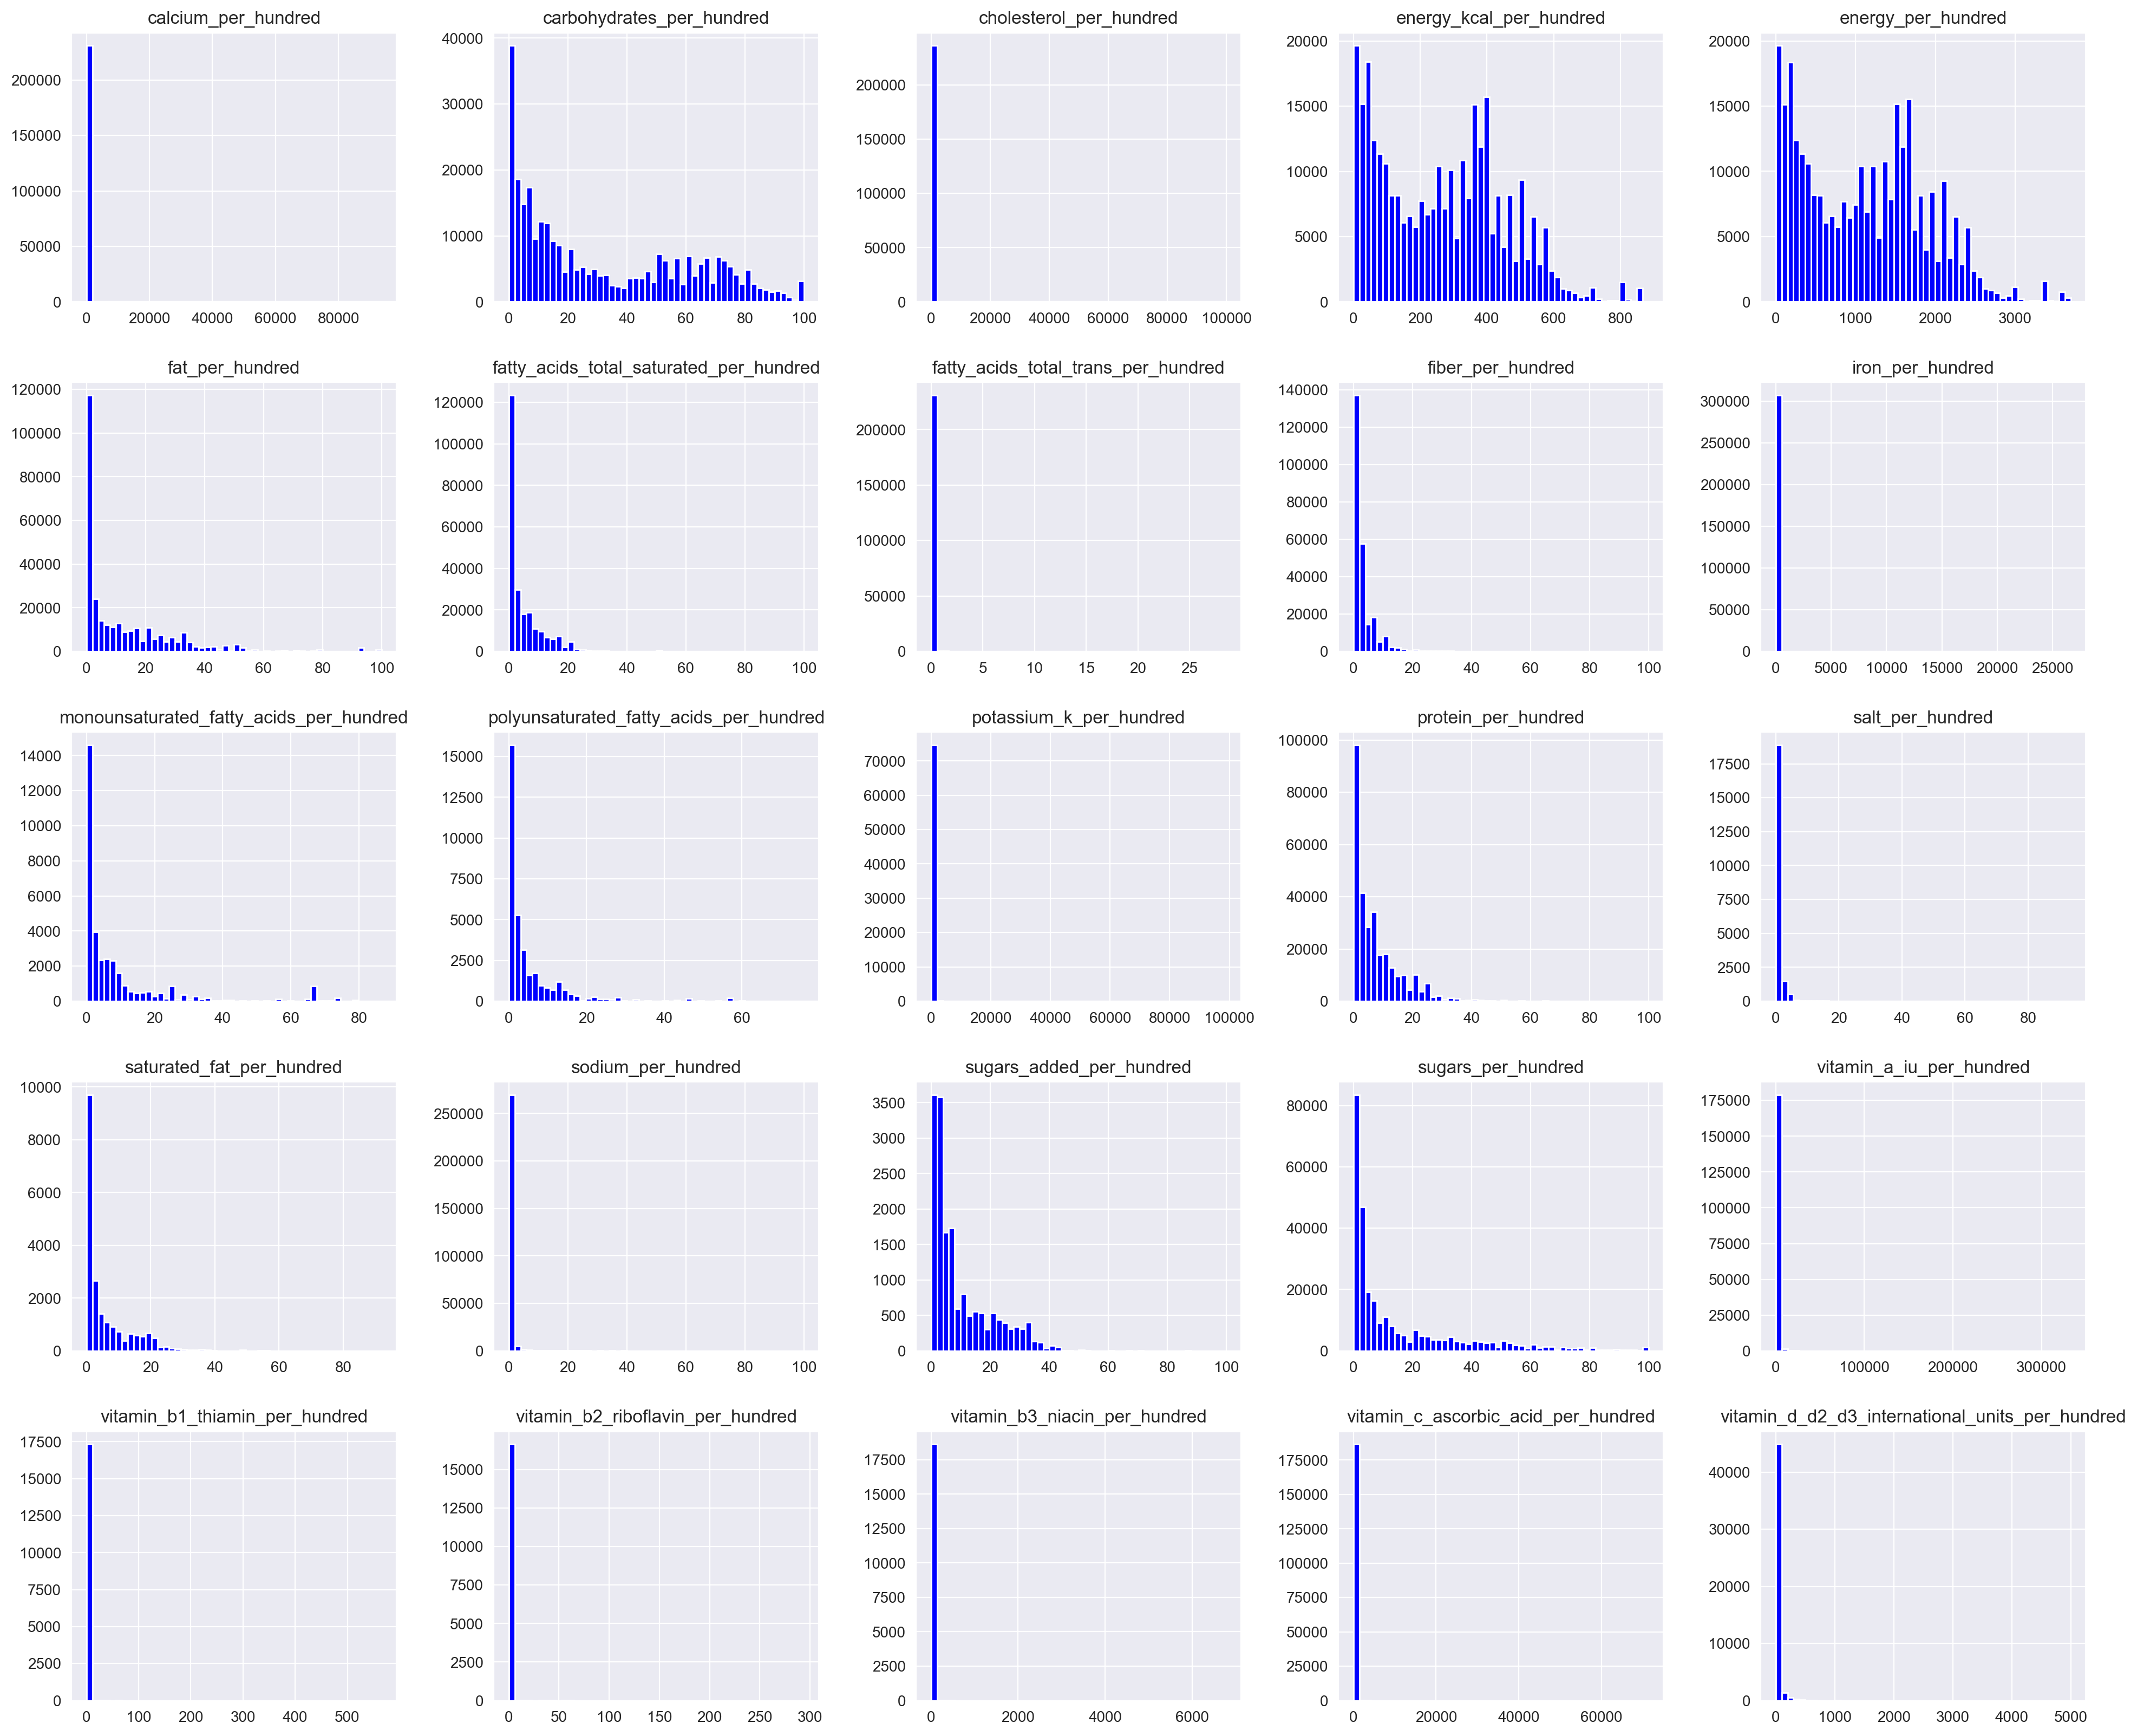

In [424]:
df_per_hundred.hist(bins= 50, figsize= (24, 20), color= "blue")

**5) Despite removing recording errors from the per_hundred columns, some of them still contain “extreme” values, which are distinct from the rest of the data points. Your goal is to pick a few variables from the per_hundred list and address outliers. Be mindful that some outlier detection approaches are not reliable when the underlying variables are strongly skewed.**

As the dataset is large, filtering outliers per column using each columns respective z-score is a plausibe approach to detect outliers. 

The variable *zscores* stores True or False statements that relate  to a value being either 'normal' or an outlier. To calcultate the z-scores numpy's *.abs()*, *.mean()* and *.std()* functions are used to compute the distance of a data points absolute value from the mean.  

In [425]:
zscores = np.abs(df_per_hundred - df_per_hundred.mean()) > (3 * df_per_hundred.std())

<br>The *.sum()* function tallies all values at least 3 standard deviations from the mean. 

In [426]:
print(f"\nNumber of outliers detected per feature using z-scores:\n")
print(zscores.sum(axis=0))
print(f"\nTotal number of outliers detected:", zscores.sum(axis=0).sum())


Number of outliers detected per feature using z-scores:

calcium_per_hundred                                 436
carbohydrates_per_hundred                             0
cholesterol_per_hundred                             122
energy_kcal_per_hundred                            1202
energy_per_hundred                                 1128
fat_per_hundred                                    5780
fatty_acids_total_saturated_per_hundred            2759
fatty_acids_total_trans_per_hundred                1533
fiber_per_hundred                                  4567
iron_per_hundred                                     58
monounsaturated_fatty_acids_per_hundred            1478
polyunsaturated_fatty_acids_per_hundred             784
potassium_k_per_hundred                             120
protein_per_hundred                                4369
salt_per_hundred                                    210
saturated_fat_per_hundred                           292
sodium_per_hundred                            

<br> Using *.any()* selects all rows that have an outlier in any of the 25 columns. The subset is saved to the variable *zfilter*, and applied to the *per_hundred* list to filter identified outliers. 

In [427]:
zfilter = zscores.any(axis=1)

outliers = df_per_hundred.loc[zfilter, :]

<br>Pandas *.drop()* function removes rows with unrealistic values from the columns in the *df_per_hundred* list and the variable *df_raw2*.

In [428]:
df_per_hundred.drop(outliers.index, axis=0, inplace=True)

In [429]:
df_raw2.drop(outliers.index, axis=0, inplace=True)

<br>

In [430]:
print(f"The variable 'df_per_hundred' has {df_per_hundred.shape[0]} rows.")

The variable 'df_per_hundred' has 277292 rows.


In [431]:
print(f"The variable 'df_raw2' also has {df_raw2.shape[0]} rows.")

The variable 'df_raw2' also has 277292 rows.


<br>Observing the difference between the mean and median will help highlight the extent to which the *per_hundred* list is rid of outliers. A minimal difference between the mean and median suggests that outliers are unlikely present. Of the nutrients with a significant difference, further analysis could reveal noteworty information.

The variable *stats1* is a subset of the *per_hundred* list which stores the mean, median and difference between the mean and median. The subset is ordered by the *difference* column in descending order. 

In [432]:
stats1 = df_per_hundred.describe().loc[["mean", "50%"]].T

stats1["difference"] = stats1["mean"] - stats1["50%"]

stats1.sort_values(by= ["difference"], ascending=False)

mean      50%  \
vitamin_a_iu_per_hundred                          338.256918     0.00   
potassium_k_per_hundred                           248.850605   171.00   
calcium_per_hundred                                88.344386    36.00   
cholesterol_per_hundred                            19.187798     0.00   
vitamin_d_d2_d3_international_units_per_hundred    11.461404     0.00   
energy_per_hundred                               1044.858533  1033.45   
carbohydrates_per_hundred                          31.380142    21.09   
sugars_per_hundred                                 13.640525     5.00   
vitamin_c_ascorbic_acid_per_hundred                 7.163040     0.00   
fat_per_hundred                                    11.083055     5.13   
sugars_added_per_hundred                            9.595955     5.30   
saturated_fat_per_hundred                           5.366639     2.00   
monounsaturated_fatty_acids_per_hundred             5.369259     2.35   
energy_kcal_per_hundred                           249.733357   247.00   
vitamin_b3_niacin_per_hundred                       7.415206     4.88   
fatty_acids_total_saturated_per_hundred             4.233282     1.79   
protein_per_hundred                                 7.044092     5.00   
polyunsaturated_fatty_acids_per_hundred             3.497606     1.61   
fiber_per_hundred                                   2.528943     1.60   
iron_per_hundred                                    1.328273     0.46   
vitamin_b1_thiamin_per_hundred                      0.517737     0.00   
salt_per_hundred                                    0.746848     0.27   
sodium_per_hundred                                  0.440006     0.28   
vitamin_b2_riboflavin_per_hundred                   0.465571     0.33   
fatty_acids_total_trans_per_hundred                 0.005645     0.00   

                                                 difference  
vitamin_a_iu_per_hundred                         338.256918  
potassium_k_per_hundred                           77.850605  
calcium_per_hundred                               52.344386  
cholesterol_per_hundred                           19.187798  
vitamin_d_d2_d3_international_units_per_hundred   11.461404  
energy_per_hundred                                11.408533  
carbohydrates_per_hundred                         10.290142  
sugars_per_hundred                                 8.640525  
vitamin_c_ascorbic_acid_per_hundred                7.163040  
fat_per_hundred                                    5.953055  
sugars_added_per_hundred                           4.295955  
saturated_fat_per_hundred                          3.366639  
monounsaturated_fatty_acids_per_hundred            3.019259  
energy_kcal_per_hundred                            2.733357  
vitamin_b3_niacin_per_hundred                      2.535206  
fatty_acids_total_saturated_per_hundred            2.443282  
protein_per_hundred                                2.044092  
polyunsaturated_fatty_acids_per_hundred            1.887606  
fiber_per_hundred                                  0.928943  
iron_per_hundred                                   0.868273  
vitamin_b1_thiamin_per_hundred                     0.517737  
salt_per_hundred                                   0.476848  
sodium_per_hundred                                 0.160006  
vitamin_b2_riboflavin_per_hundred                  0.135571  
fatty_acids_total_trans_per_hundred                0.005645

## D. Text Data

**1) Find the product with the longest ingredients list, i.e. the largest number of ingredients. Print the product name and its ingredient list.**

The subset *df_other_cols* is updated to reflect changes made to the variable *df_raw2*.

In [433]:
df_other_cols = df_raw2.loc[:,[x for x in df_raw.columns if not x.endswith("_per_hundred") 
                   and not x.endswith("_per_portion") and not x.endswith("_unit")]]

In [434]:
print(f"The variable 'df_other_cols' has {df_other_cols.shape[0]} rows.")

The variable 'df_other_cols' has 277292 rows.


In [435]:
print(f"The variable 'df_raw2' has {df_raw2.shape[0]} rows.")

The variable 'df_raw2' has 277292 rows.


<br>Combining python's *.apply()*, *lambda* and *.split()* functions together with pandas *.describe()* method outputs descriptive statistics on the column *ingredients_en*, specifically key information on token length. 

In [436]:
df_other_cols["ingredients_en"].apply(lambda x: len(x.split())).describe()

count    277292.000000
mean         35.161184
std          35.889383
min           1.000000
25%          10.000000
50%          25.000000
75%          48.000000
max         485.000000
Name: ingredients_en, dtype: float64

<br>The longest list of ingredients  has 485 tokens. To identify which index label the statistic is associated with, applying the above code with pandas method *.idxmax()* instead of *.describe()* returns the index label. 

In [437]:
print(f"Index label {df_other_cols['ingredients_en'].apply(lambda x: len(x.split())).idxmax()} references the sample with the longest\
 ingredient list.")

Index label 275300 references the sample with the longest ingredient list.


<br>

In [438]:
print(f"The product with the longest ingredient list is '{df_other_cols['product_name_en'][275300]}'.")

The product with the longest ingredient list is 'BROWNIE TRIO'.


<br>**2) Find the products with the shortest ingredients list, i.e. the fewest ingredients. Display some examples and comment on your observation.**

The shortest list of ingredients has 1 token. Viewing documents with 1 to 15 tokens could highlight the structure of ingredient lists with a few items. 

To display sample documents with the aforementioned token count, the above code will be applied, and the count of the most frequent words will be sorted in ascending order. The variable *token_count* stores the computed series. Moreover, index lables with the string 'ingredient_missing' have been excluded from the subset.


In [439]:
token_count = df_other_cols[df_other_cols["ingredients_en"] != "ingredient_missing"]

token_count = token_count['ingredients_en'].apply(lambda x: len(x.split())).sort_values()

token_count

221688      1
123482      1
357160      1
209436      1
178723      1
         ... 
195762    423
121099    431
241579    448
241595    475
275300    485
Name: ingredients_en, Length: 261995, dtype: int64

<br> 

Pandas function *.set_option()* will be applied temporarily to ensure that output string values can be fully displayed.

In [440]:
pd.set_option('display.max_colwidth', None)

In [441]:
df_other_cols.loc[token_count.idxmin(), ["product_name_en","ingredients_en"]]

product_name_en    RAW ALMONDS
ingredients_en        ALMONDS.
Name: 221688, dtype: object

<br>

In [442]:
df_other_cols.loc[token_count[token_count == 1].index, ["product_name_en","ingredients_en"]].sample()

product_name_en ingredients_en
262906  CUT RED RHUBARB        RHUBARB

<br>

In [443]:
df_other_cols.loc[token_count[token_count == 1].index, ["product_name_en","ingredients_en"]].sample()

product_name_en ingredients_en
188988        CUT OKRA          OKRA.

<br>

In [444]:
df_other_cols.loc[token_count[token_count == 1].index, ["product_name_en","ingredients_en"]].sample()

product_name_en ingredients_en
272623  STEAMABLE PETITE PEAS          PEAS.

<br>

In [445]:
df_other_cols.loc[token_count[token_count == 2].index, ["product_name_en","ingredients_en"]].sample()

product_name_en ingredients_en
192425  BABY LIMA BEANS    LIMA BEANS.

<br>

In [446]:
df_other_cols.loc[token_count[token_count == 3].index, ["product_name_en","ingredients_en"]].sample()

product_name_en                   ingredients_en
212391  CALIFORNIA BLEND VEGETABLES  BROCCOLI, CARROTS, CAULIFLOWER.

<br>

In [447]:
df_other_cols.loc[token_count[token_count == 6].index, ["product_name_en","ingredients_en"]].sample()

product_name_en                             ingredients_en
65989  ROUNDY'S, LUNCHEON MEAT  PORK, SALT, WATER, SUGAR, SODIUM NITRITE.

<br>

In [448]:
df_other_cols.loc[token_count[token_count == 9].index, ["product_name_en","ingredients_en"]].sample()

product_name_en  \
87473  DYNASTY, PANKO JAPANESE STYLE BREAD CRUMBS   

                                                         ingredients_en  
87473  BLEACHED WHEAT FLOUR, SHORTENING (PALM OIL), SUGAR, YEAST, SALT.

<br>

In [449]:
df_other_cols.loc[token_count[token_count == 12].index, ["product_name_en","ingredients_en"]].sample()

product_name_en  \
166717  WILD MACKEREL FILLETS   

                                                                         ingredients_en  
166717  MACKEREL (SCOMBER JAPONICUS), ORGANIC EXTRA VIRGIN OLIVE OIL, WATER & SEA SALT.

<br> The output samples are either raw or frozen food items, or beverages.

<br>**3) Which are the most frequent ingredients in products? You will also choose an appropriate method to visualize your findings.**

The *.sub()* function from the regular expression library will be applied to replace characters with white space. Seperating punctuation from adjacent words ensures that all words that are identical are grouped, and counted.

In [450]:
import re

<br>To find the most frequent ingredients amongst the food products, the *Counter* object from the *collections* module will be used.

In [451]:
from collections import Counter

<br>Moreover a list of stop words from the NLTK library will remove frequent and uninformative words. 

In [452]:
import nltk
nltk.download("stopwords", quiet=True)
from nltk.corpus import stopwords
stopwords_english = stopwords.words("english")

<br>The function *process_text()* executes tokenisation by combining the tools from the afroementioned libraries; characters, and stop words will be removed, and all text will be converted to lower case. 

In [453]:
def preprocess_text(doc):
    
    clean_doc = doc.lower()
    
    clean_doc = re.sub(r"[\(\)]", " ", clean_doc)
    
    clean_doc = re.sub(r"[\[\]]", " ", clean_doc)
    
    clean_doc = re.sub(r"[\{\}]", " ", clean_doc)
    
    clean_doc = re.sub(r"[\.\?\!\,\*\^\+\-\"\|]", " ", clean_doc)
    
    clean_doc = re.sub(r"[;%:,/¹²><@''#=]", " ", clean_doc)
    
    clean_doc = re.sub(r"\s-\s"," ", clean_doc)
    
    clean_doc = re.sub(r"[\$\€]", " ", clean_doc)
    
    clean_doc = re.sub(r"[\â]", " ", clean_doc)
    
    processed_tokens = [x for x in clean_doc.split() if x not in stopwords_english]
    
    return processed_tokens

<br>To count the 25 most common tokens in the document with the longest ingredient list, the *Counter* object from the *collections* library, together with the *processed_tokens* function is applied to index label 275300.

In [454]:
Counter(preprocess_text(df_other_cols["ingredients_en"][275300])).most_common(25)

[('sugar', 18),
 ('oil', 15),
 ('corn', 13),
 ('flour', 12),
 ('cocoa', 12),
 ('milk', 12),
 ('acid', 11),
 ('natural', 11),
 ('flavor', 11),
 ('processed', 10),
 ('alkali', 10),
 ('salt', 10),
 ('syrup', 9),
 ('soybean', 9),
 ('sodium', 9),
 ('gum', 9),
 ('starch', 8),
 ('wheat', 7),
 ('contains', 7),
 ('2', 7),
 ('less', 7),
 ('soy', 7),
 ('modified', 7),
 ('following', 6),
 ('palm', 6)]

<br>The pharses model from the Gensim library will automatically identify common phrases for each document.

In [455]:
from gensim.models import Phrases

<br>The code needed to instantiate the model includes:

*  a list comprehension of the preprocessed ingredients lists,
*  the minimum count of phrases that should be considered,
*  and the character used to join phrases.

In [456]:
preprocessed_ingredients_en = [preprocess_text(x) for x in df_other_cols["ingredients_en"]]

<br>

In [457]:
n_gram_model = Phrases(preprocessed_ingredients_en, min_count=5, delimiter=b'_')

<br>The n_gram_model is applied to the variable *preprocessed_ingredients_en*, and the tokenised text is added to the variable *df_other_cols* as a new column.

In [458]:
preprocessed_ingredients_en_phrases = [n_gram_model[doc] for doc in preprocessed_ingredients_en]

In [459]:
df_other_cols["clean_ingredients_en"] = preprocessed_ingredients_en_phrases

<br>Below is a  bar plot of the most frequent words and phrases that the longest ingredient list has.

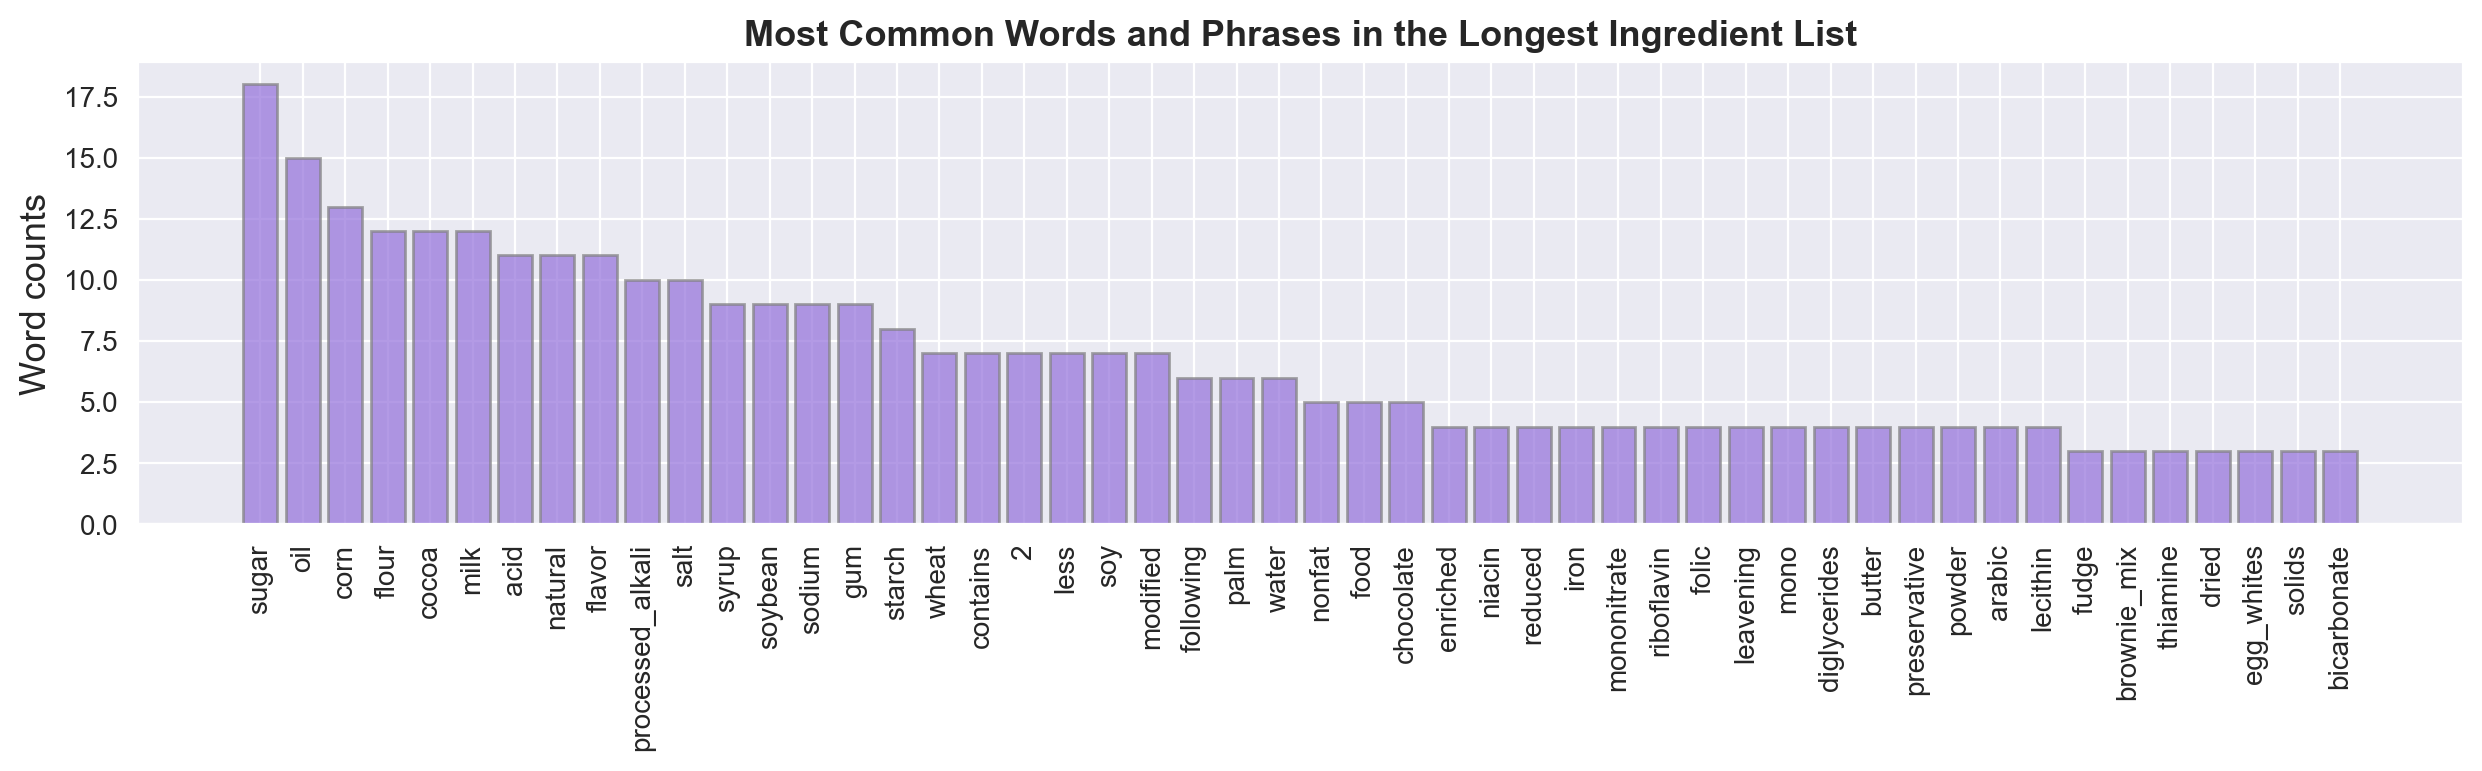

In [460]:
w1 = Counter(df_other_cols["clean_ingredients_en"][275300]).most_common(50)

barplot_specs   = {"color": "mediumpurple", "alpha": 0.7, "edgecolor": "grey"}
title_specs     = {"fontsize": 14, "fontweight": "bold", "y": 1.2}
suptitle_specs  = {"fontsize": 11}
label_specs     = {"fontsize": 13}

plt.figure(figsize=(15,3))
plt.bar(*zip(*w1), **barplot_specs)
plt.title(f"Most Common Words and Phrases in the Longest Ingredient List", fontweight="bold", fontsize=13)
plt.ylabel("Word counts", **label_specs)
plt.xticks(rotation=90)
plt.show()

<br>To visualise the most common words and phrases amongst all the documents, I've otped to flatten a copy of *preprocessed_ingredients_en_phrases*; the variable stores tokensied text as a nested list. The funtion *flatten_list* is a list comprehension that iterates over each token in every sublist, and each document in the variable *preprocessed_ingredients_en_phrases2*. The flatenned list or single string is stored in the variable *flat_list*. 

The idea to sturcutre the applied code as a function is from the blog post **How to Flatten a List of Lists in Python**. 

Blog post url: https://saturncloud.io/blog/how-to-flatten-a-list-of-lists-in-python/.

In [461]:
preprocessed_ingredients_en_phrases2 = preprocessed_ingredients_en_phrases.copy()

In [462]:
def flatten_list(ingredients_en):
    return [tok for doc in ingredients_en for tok in doc]

In [463]:
flat_list = flatten_list(preprocessed_ingredients_en_phrases2)


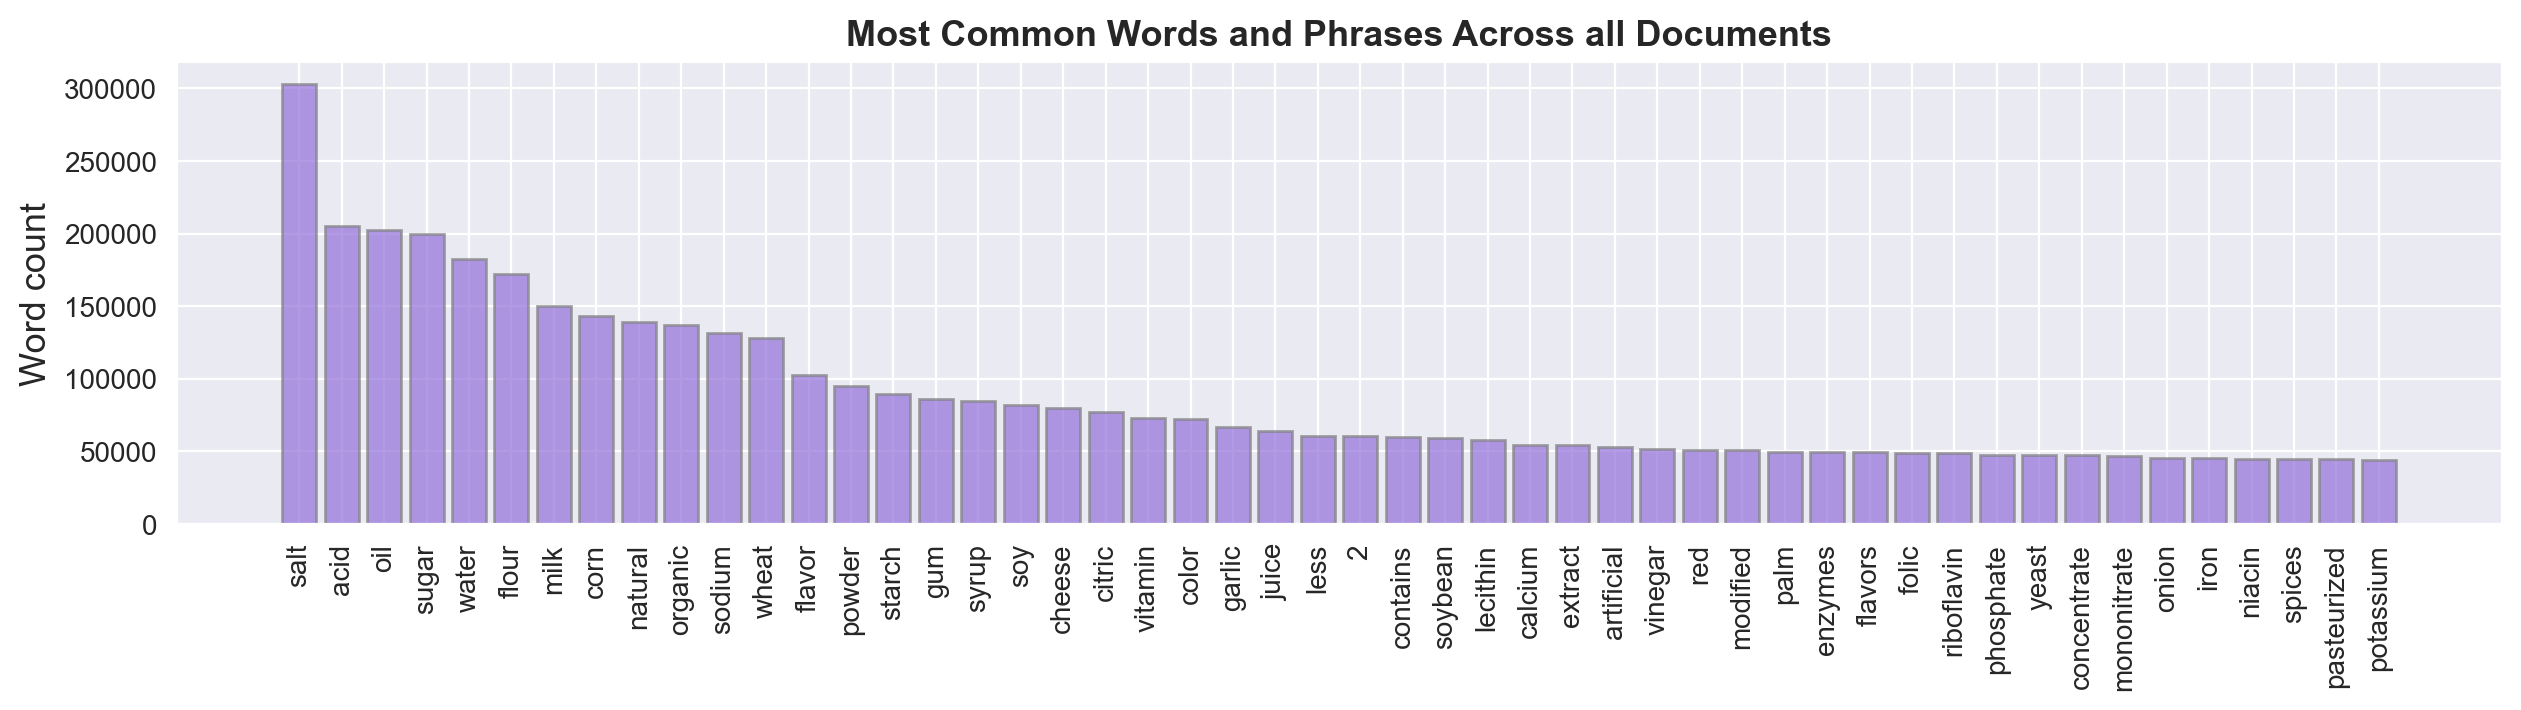

In [464]:
w2 = Counter(flat_list).most_common(50)

barplot_specs   = {"color": "mediumpurple", "alpha": 0.7, "edgecolor": "grey"}
title_specs     = {"fontsize": 14, "fontweight": "bold", "y": 1.2}
suptitle_specs  = {"fontsize": 11}
label_specs     = {"fontsize": 13}

plt.figure(figsize=(15,3))
plt.bar(*zip(*w2), **barplot_specs)
plt.title(f"Most Common Words and Phrases Across all Documents", fontweight="bold", fontsize=13)
plt.ylabel("Word count",  **label_specs)
plt.xticks(rotation=90)
plt.show()

## E. Time Series Data

**1)  Investigate the total number of items created each month at each hour. You should use the created_at column to draw a heatmap with the hours (0 to 23) on the 
x-axis and the months (1 to 12) on the y-axis. The color of the heatmap should show the number of items created at each month-hour pair.**

The variable *datetime* stores a copy of the column *created_at*. Moreover, the column's data type is converted to datetime, and is set as the dataframe's index.

In [465]:
datetime = df_other_cols[["created_at"]].copy()

In [466]:
datetime["created_at"] = pd.to_datetime(datetime["created_at"])

In [467]:
datetime = datetime.set_index("created_at")

<br/> Data on the month, and hour are retrieved from the datetime index and are subsequently stored as distinct columns.

In [468]:
datetime["Month"] = datetime.index.month

datetime["Hour"] = datetime.index.hour

datetime.head()

Month  Hour
created_at                                   
2016-06-01 11:42:22.908000+00:00      6    11
2016-06-01 11:42:25.111000+00:00      6    11
2016-06-01 11:42:25.900000+00:00      6    11
2016-06-01 11:42:26.184000+00:00      6    11
2016-06-01 11:42:26.350000+00:00      6    11

<br/> To create a pivot table that stores the count of products manufactured in the same month and at the same hour, Pandas groupby operation is applied to count the total number of rows with the same data. 

As applying .groupby() and .size() creates a multi-level index including .reset_index() restores the default numeric index of a dataframe.  In addition, grouped columns are reverted to single columns. 

In [469]:
datetime_groupby = datetime.groupby(["Month", "Hour"]).size().reset_index(name= "Count")

datetime_groupby.sort_values(by= "Count")

Month  Hour   Count
176     11     3       1
15       1    22       1
65       5     2       1
80       6     5       1
101      7     5       1
..     ...   ...     ...
112      7    16     758
116      7    20     919
157      9    19     979
154      9    16    1039
53       4    10  255147

[209 rows x 3 columns]

In [470]:
datetime_pivot = datetime_groupby.pivot("Month", "Hour", "Count")

with pd.option_context('display.max_columns', None,):
 display(datetime_pivot)

Hour      0     1    2    3     4     5      6      7      8      9   \
Month                                                                  
1        NaN   NaN  NaN  NaN   NaN   NaN    2.0   30.0   78.0  132.0   
2        NaN   NaN  NaN  NaN   NaN   NaN    NaN    5.0   85.0   73.0   
3        NaN   NaN  NaN  NaN   NaN   NaN    2.0   31.0  109.0  172.0   
4        NaN   NaN  NaN  NaN  11.0  79.0   69.0  154.0   88.0  121.0   
5        NaN   NaN  1.0  NaN   NaN   NaN   16.0   58.0   86.0   54.0   
6        NaN   NaN  NaN  NaN   NaN   1.0  177.0  104.0  103.0  128.0   
7      345.0  88.0  NaN  NaN   NaN   1.0  723.0  142.0   57.0   54.0   
8        4.0   2.0  3.0  1.0   NaN   2.0    9.0   49.0   55.0   78.0   
9        NaN   NaN  NaN  NaN   NaN  34.0  328.0   97.0   98.0  159.0   
10       NaN   NaN  NaN  NaN   NaN   NaN   59.0   60.0   96.0   51.0   
11       NaN   NaN  NaN  1.0   NaN   NaN    NaN  239.0  239.0  173.0   
12       NaN   NaN  NaN  NaN   NaN   NaN    2.0   34.0   47.0   74.0   

Hour         10     11     12     13     14     15      16     17     18  \
Month                                                                      
1         106.0   11.0   59.0   83.0   42.0   21.0    11.0   12.0    1.0   
2          53.0   17.0   54.0   78.0   42.0   25.0     8.0    7.0    3.0   
3          93.0  273.0  162.0  102.0  140.0  151.0    42.0   68.0    5.0   
4      255147.0   94.0   90.0  100.0   96.0   25.0    11.0   13.0    3.0   
5          38.0   73.0   66.0   65.0   65.0   40.0    11.0   19.0   13.0   
6          37.0   51.0  161.0  134.0  212.0  127.0    69.0  449.0  162.0   
7         269.0  195.0   55.0   52.0   66.0  121.0   758.0  239.0  212.0   
8          46.0   64.0   33.0   55.0   52.0   41.0    51.0   37.0   46.0   
9         151.0  289.0  281.0  206.0   80.0  167.0  1039.0  561.0  587.0   
10         36.0  105.0  258.0   44.0   15.0  123.0     7.0   12.0   31.0   
11         47.0  181.0  139.0  130.0   58.0   21.0    70.0    8.0    9.0   
12         88.0   15.0   40.0  147.0   52.0   13.0    15.0   27.0    6.0   

Hour      19     20     21     22     23  
Month                                     
1        7.0    2.0    NaN    1.0    NaN  
2       13.0   11.0   70.0    NaN    NaN  
3       17.0  406.0    9.0    NaN    NaN  
4      113.0   14.0  157.0    NaN    NaN  
5       16.0    NaN    NaN    NaN    NaN  
6        6.0   14.0   40.0  526.0    3.0  
7      344.0  919.0  449.0  386.0  274.0  
8       50.0   33.0   11.0    5.0    2.0  
9      979.0    6.0  288.0    NaN    NaN  
10      12.0   61.0   15.0    NaN    NaN  
11      58.0   67.0    2.0    4.0    NaN  
12       6.0   18.0   15.0    NaN    NaN

<br/> The heatmap visualises the count of products that were manufactured during the same month and at the same hour. The most food products were manufactured at 10am in May. The total number is 255,147.

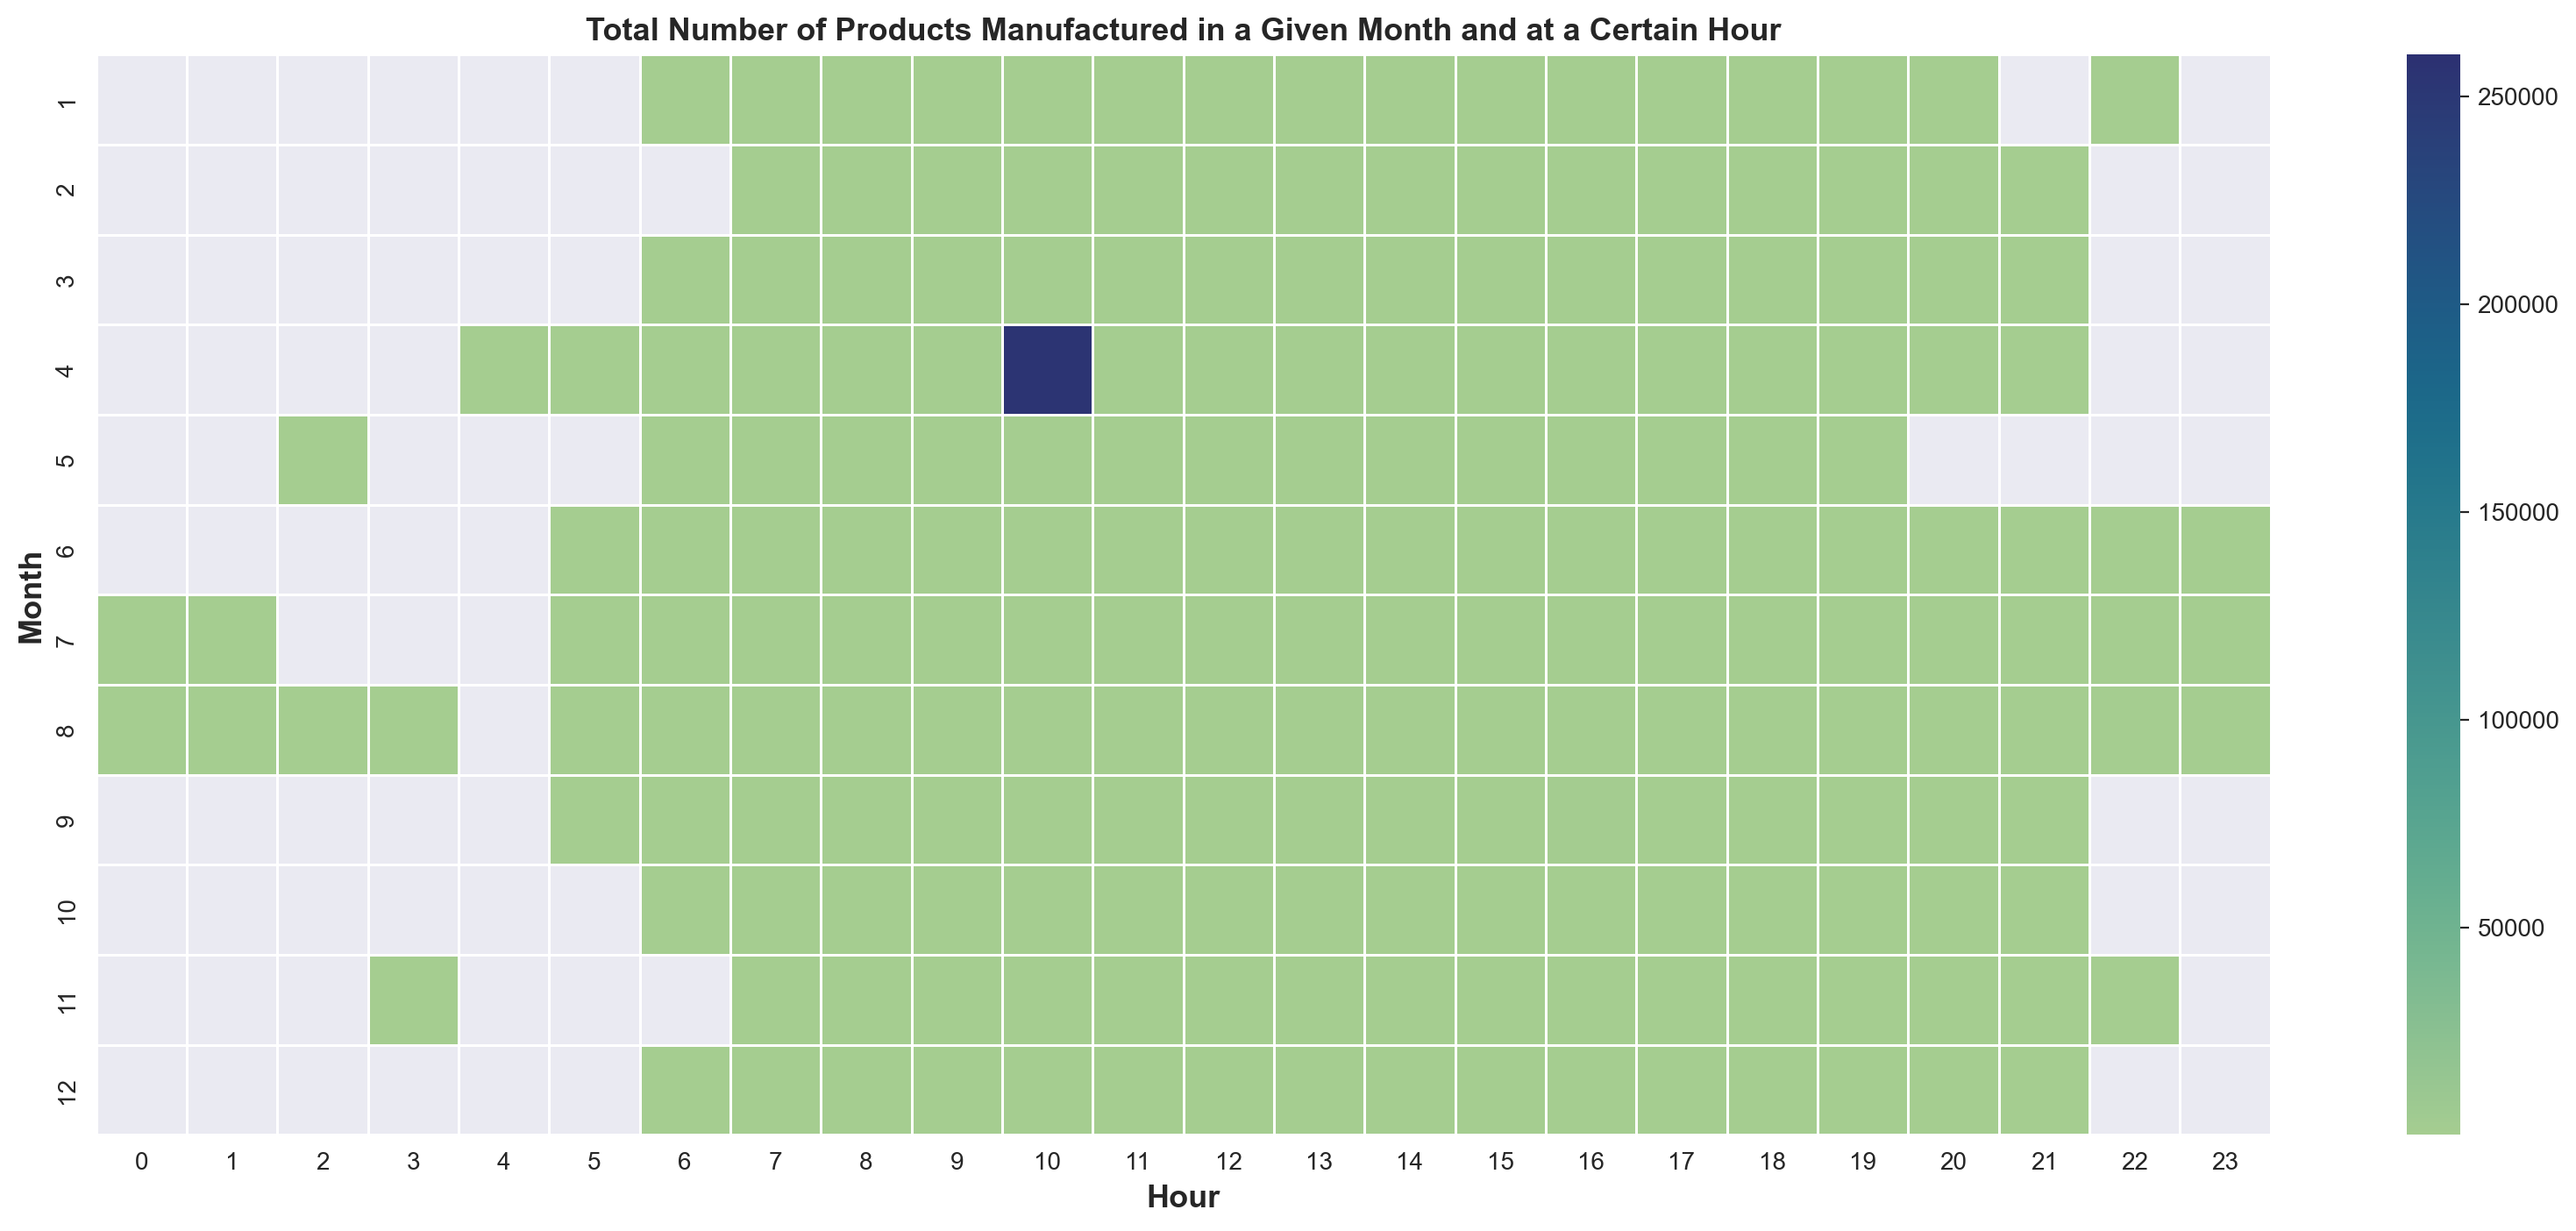

In [471]:
plt.figure(figsize=(20, 8))
sns.heatmap(datetime_pivot, cmap= "crest", linewidth=0.5, vmin=1, vmax=260000)
plt.xlabel("Hour", fontweight="bold", fontsize=13)
plt.ylabel("Month", fontweight="bold", fontsize=13)
plt.title("Total Number of Products Manufactured in a Given Month and at a Certain Hour", fontweight="bold", fontsize=13)
plt.show()

**2) Your task is to investigate the evolution of the total number of items over time. You should draw a bar plot with the date (e.g., in yyyy-mm format) on the 
x-axis and the total number of items created during each month on the 
y-axis. Each bar in the plot should stack the number of items created by each country each month. Please make sure all bars are visible by choosing the appropriate scale for the y-axis.**

The variable *datetime2* stores a copy of the columns *created_at* and *country*. Moreover, the *created_at* column is converted to a datetime format.

In [472]:
datetime2 = df_other_cols[["created_at", "country"]].copy()

datetime2["created_at"] = pd.to_datetime(datetime2["created_at"])

datetime2.tail()

created_at country
374866 2021-10-03 15:21:16.659000+00:00      CH
374867 2021-10-03 15:29:47.648000+00:00      CH
374877 2021-10-04 13:57:48.140000+00:00      CH
374878 2021-10-04 14:02:42.220000+00:00      CH
374881 2021-10-04 14:22:10.685000+00:00      CH

The column *created_at* is converted to a period object. In addition, the month parameter is applied which sets a monthly frequency interval. 

In [473]:
datetime2["created_at"] = datetime2["created_at"].dt.to_period('M')

print(f"There are {datetime2['created_at'].nunique()} unique periods.")

There are 62 unique periods.


C:\Users\Admin\anaconda3\envs\adsml\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


To count the total number of manufactured products per month and by country, *.groupby()* is used. Including *.reset_index()* ensures that the *datetime2_groupby* variable is a two-dimensional dataframe. 

In [474]:
datetime2_groupby = datetime2.groupby(["created_at", "country"]).size().reset_index(name= "count")

datetime2_groupby

created_at country  count
0     2016-05      CH     12
1     2016-06      CH    894
2     2016-07      CH   5306
3     2016-08      CH     23
4     2016-09      CH   4498
..        ...     ...    ...
92    2021-06      FR      2
93    2021-07      CH    174
94    2021-08      CH    160
95    2021-09      CH    146
96    2021-10      CH      8

[97 rows x 3 columns]

Structuring the data as a pivot table simplifies the creation of a stacked bar chart that has the *created_at* column as the index, *country* as the bar graph columns, and *count* as the values to plot.

In [475]:
datetime2_pivot = datetime2_groupby.pivot("created_at", "country", "count")

datetime2_pivot

country     AT      CH  DE   FR  IT  UK  US
created_at                                 
2016-05    NaN    12.0 NaN  NaN NaN NaN NaN
2016-06    NaN   894.0 NaN  NaN NaN NaN NaN
2016-07    NaN  5306.0 NaN  NaN NaN NaN NaN
2016-08    NaN    23.0 NaN  NaN NaN NaN NaN
2016-09    NaN  4498.0 NaN  NaN NaN NaN NaN
...         ..     ...  ..  ...  ..  ..  ..
2021-06    NaN   156.0 NaN  2.0 NaN NaN NaN
2021-07    NaN   174.0 NaN  NaN NaN NaN NaN
2021-08    NaN   160.0 NaN  NaN NaN NaN NaN
2021-09    NaN   146.0 NaN  NaN NaN NaN NaN
2021-10    NaN     8.0 NaN  NaN NaN NaN NaN

[62 rows x 7 columns]

The stacked bar chart visualises the sum of products manufactured per country over a 62 month period. As the range of values is very large, the y-scale is set to log to better display the total number of products . 

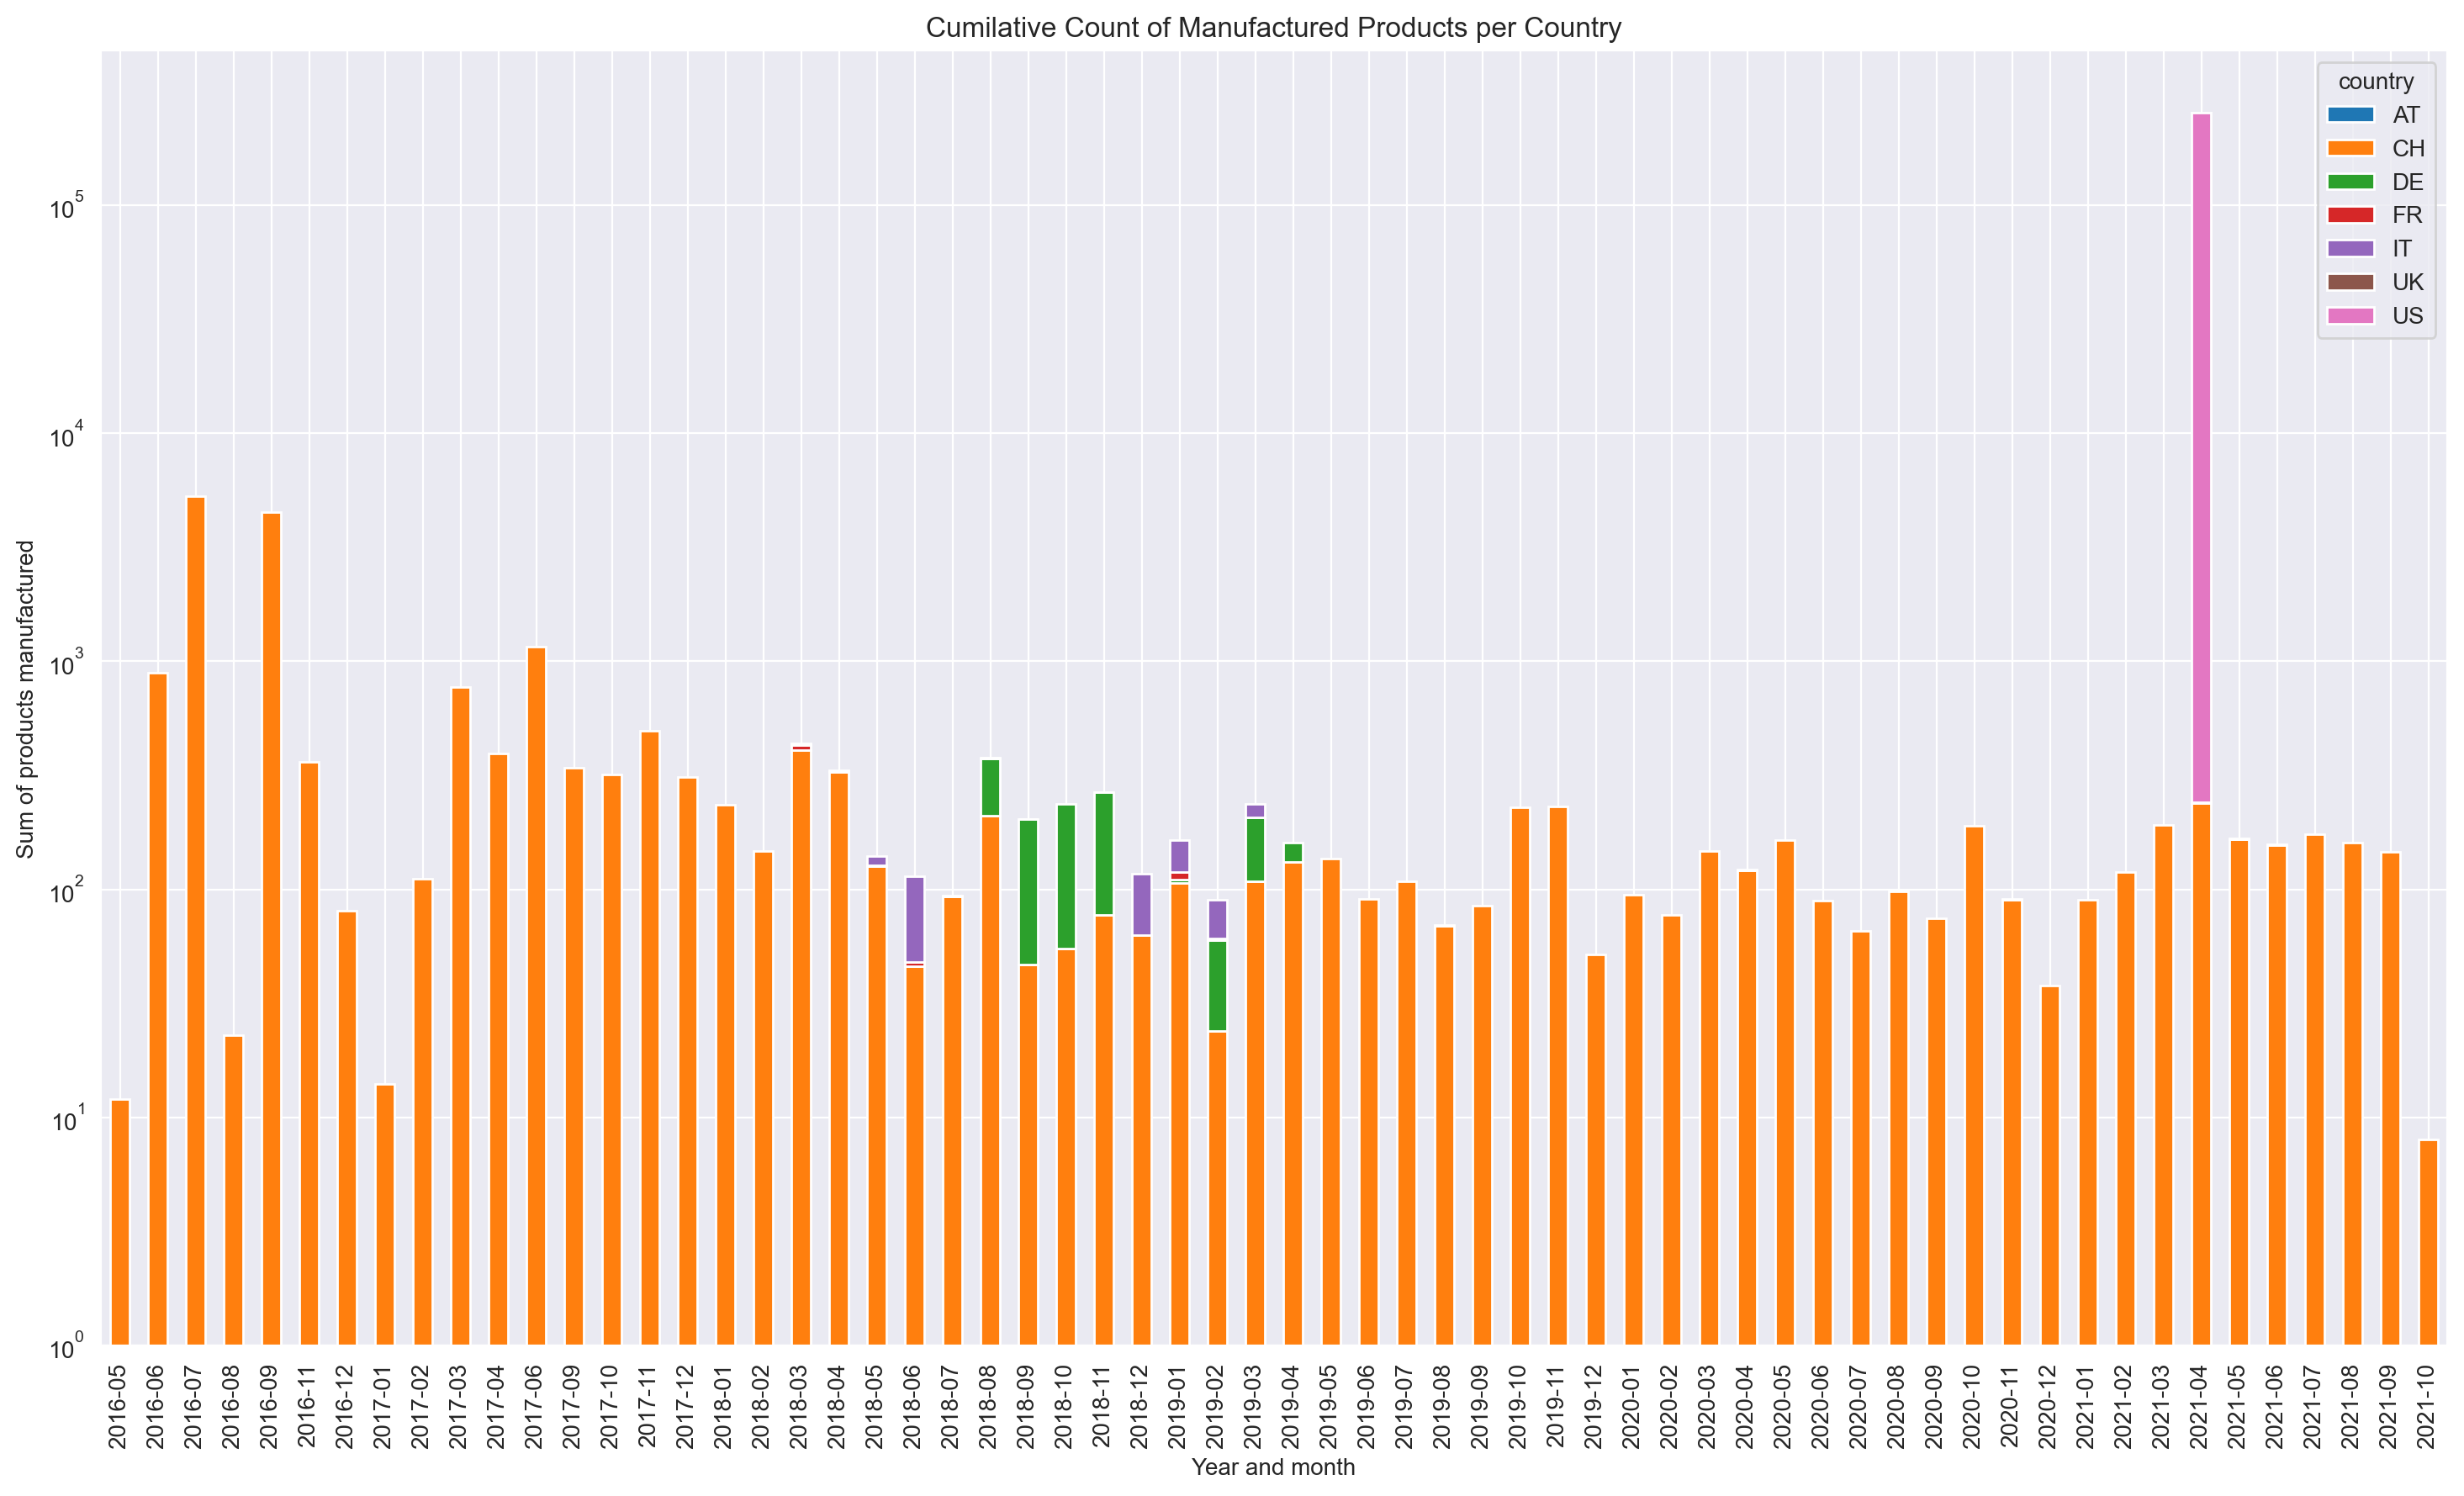

In [476]:
datetime2_pivot.plot.bar(figsize=(18, 10), stacked=True)

plt.yscale("log")
plt.xlabel("Year and month")
plt.ylabel("Sum of products manufactured")
plt.title('Cumilative Count of Manufactured Products per Country')
plt.show()

## F. Correlation Analysis

**1) Your task is to quantify the linear relationships between the energy_per_hundred and the per_hundred columns by analysing their correlation with each other.**

To organise the Pearson correlation coefficients between the *energy_per_hundred* column and the 24 other nutireint *per_hundred* columns, the variable *df_corr* stores a dataframe of the calculations. Pandas method *.corr()* is used to quantify the pariwise correlations. 

In [477]:
df_per_hundred.drop(['energy_per_hundred'], axis=1).shape

(277292, 24)

In [478]:
df_corr = pd.DataFrame({"calcium_per_hundred": [""], 
                       "carbohydrates_per_hundred": [""],
                       "cholesterol_per_hundred": [""],
                        "energy_kcal_per_hundred": [""],
                        "fat_per_hundred": [""],
                         "fatty_acids_total_trans_per_hundred": [""],
                        "fiber_per_hundred": [""],
                        "iron_per_hundred": [""],
                        "monounsaturated_fatty_acids_per_hundred": [""],
                        "polyunsaturated_fatty_acids_per_hundred": [""],
                        "potassium_k_per_hundred": [""],
                        "protein_per_hundred": [""], 
                        "salt_per_hundred": [""],
                        "saturated_fat_per_hundred": [""],
                        "sodium_per_hundred": [""],
                        "sugars_added_per_hundred": [""],
                        "sugars_per_hundred": [""], 
                        "vitamin_a_iu_per_hundred": [""],
                        "vitamin_b1_thiamin_per_hundred": [""],
                        "vitamin_b2_riboflavin_per_hundred": [""], 
                        "vitamin_b3_niacin_per_hundred": [""],
                        "vitamin_c_ascorbic_acid_per_hundred": [""],
                        "vitamin_d_d2_d3_international_units_per_hundred": [""]},
                        index=["energy_per_hundred"]
                       )

In [479]:
df_corr["calcium_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["calcium_per_hundred"])

In [480]:
df_corr["carbohydrates_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["carbohydrates_per_hundred"])

In [481]:
df_corr["cholesterol_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["cholesterol_per_hundred"])

In [482]:
df_corr["energy_kcal_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["energy_kcal_per_hundred"])

In [483]:
df_corr["fat_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["fat_per_hundred"])

In [484]:
df_corr["fatty_acids_total_trans_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["fatty_acids_total_trans_per_hundred"])

In [485]:
df_corr["fiber_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["fiber_per_hundred"])

In [486]:
df_corr["iron_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["iron_per_hundred"])

In [487]:
df_corr["monounsaturated_fatty_acids_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["monounsaturated_fatty_acids_per_hundred"])

In [488]:
df_corr["polyunsaturated_fatty_acids_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["polyunsaturated_fatty_acids_per_hundred"])

In [489]:
df_corr["potassium_k_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["potassium_k_per_hundred"])

In [490]:
df_corr["protein_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["protein_per_hundred"])

In [491]:
df_corr["salt_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["salt_per_hundred"])

In [492]:
df_corr["saturated_fat_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["saturated_fat_per_hundred"])

In [493]:
df_corr["sodium_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["sodium_per_hundred"])

In [494]:
df_corr["sugars_added_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["sugars_added_per_hundred"])

In [495]:
df_corr["sugars_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["sugars_per_hundred"])

In [496]:
df_corr["vitamin_a_iu_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["vitamin_a_iu_per_hundred"])

In [497]:
df_corr["vitamin_b1_thiamin_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["vitamin_b1_thiamin_per_hundred"])

In [498]:
df_corr["vitamin_b2_riboflavin_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["vitamin_b2_riboflavin_per_hundred"])

In [499]:
df_corr["vitamin_b3_niacin_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["vitamin_b3_niacin_per_hundred"])

In [500]:
df_corr["vitamin_b3_niacin_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["vitamin_b3_niacin_per_hundred"])

In [501]:
df_corr["vitamin_c_ascorbic_acid_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["vitamin_c_ascorbic_acid_per_hundred"])

In [502]:
df_corr["vitamin_d_d2_d3_international_units_per_hundred"] = df_per_hundred["energy_per_hundred"].corr(df_per_hundred["vitamin_d_d2_d3_international_units_per_hundred"])

<br/>To simplify creating a heatmap of the pairwise correlations, Pandas transpose property and *.sort_values()* parameter structures the dataframe into a rectangular matrix.

In [503]:
df_corr = df_corr.T.sort_values(by="energy_per_hundred", ascending=False)

df_corr

energy_per_hundred
energy_kcal_per_hundred                                    0.999961
fat_per_hundred                                            0.769492
saturated_fat_per_hundred                                  0.663492
carbohydrates_per_hundred                                  0.650923
monounsaturated_fatty_acids_per_hundred                    0.628814
polyunsaturated_fatty_acids_per_hundred                    0.565143
sugars_added_per_hundred                                   0.471777
protein_per_hundred                                        0.434341
fiber_per_hundred                                          0.423275
sugars_per_hundred                                         0.385492
potassium_k_per_hundred                                    0.372246
vitamin_b1_thiamin_per_hundred                             0.319590
vitamin_b2_riboflavin_per_hundred                          0.318746
iron_per_hundred                                           0.266135
calcium_per_hundred                                        0.176222
sodium_per_hundred                                         0.083246
salt_per_hundred                                           0.030173
cholesterol_per_hundred                                    0.028617
fatty_acids_total_trans_per_hundred                       -0.000197
vitamin_b3_niacin_per_hundred                             -0.028828
vitamin_d_d2_d3_international_units_per_hundred           -0.049457
vitamin_c_ascorbic_acid_per_hundred                       -0.093897
vitamin_a_iu_per_hundred                                  -0.116809

In [504]:
df_corr.dtypes

energy_per_hundred    float64
dtype: object

<br/> The rectangular matrix is graphically represented using Seaborn's heatmap which plots the data as a colour-encoded matrix.

<function matplotlib.pyplot.show(close=None, block=None)>

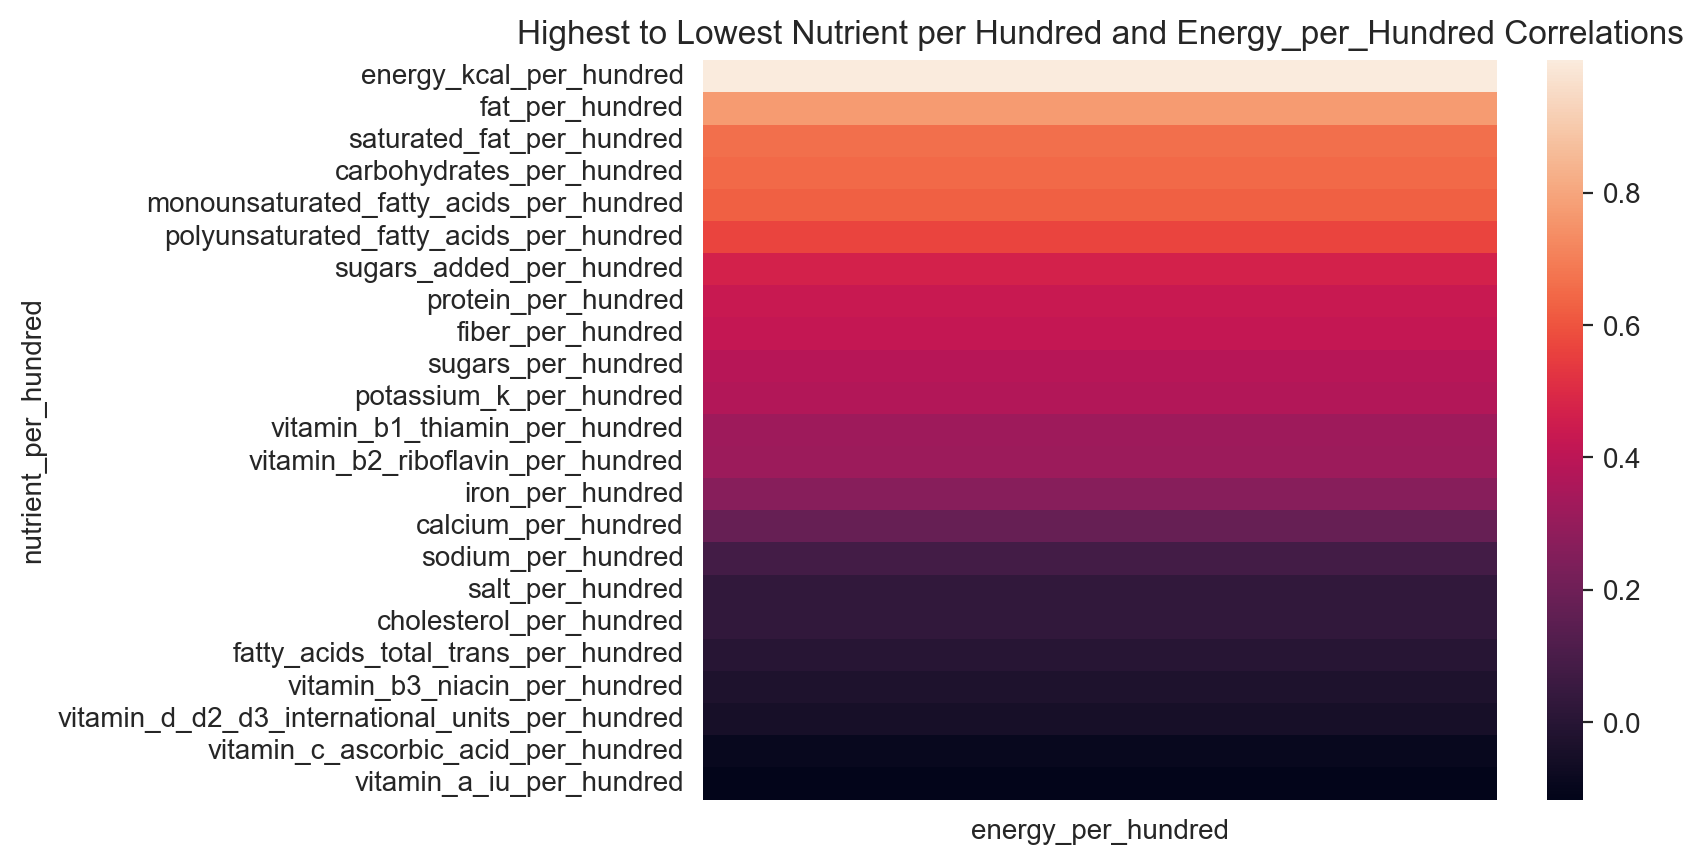

In [505]:
sns.heatmap(df_corr)
plt.title("Highest to Lowest Nutrient per Hundred and Energy_per_Hundred Correlations")
plt.ylabel("nutrient_per_hundred")
plt.show

<br/>**2) Your task is to reveal the true nature of the relationship, linear or non-linear, between variables, using visualizations. Based on the correlation coefficients you found in the previous task, pick the three most correlated and the three least correlated nutrients (in absolute terms) with the energy_per_hundred column. Plot them against the energy_per_hundred column, using scatterplots. You should obtain these plots as subplots (with 2 rows and 3 columns) or as seaborn pairplots.
Please comment on the visual relationships in a markdown cell. Are they all linear? Are there still extreme values that, once removed, relationships would change?**

The variable *df_corr_high_low* is a concatenated dataframe of the three highest and lowest Pearson correlation coefficients. The values demonstrate a standardised measure of magnitude between energy per hundred and the distinct macronutrient per hundred measurements. 

The standardised range of -1 to 1 demonstrates that fat, saturated fat and carbohydrates have a moderate to strong positive correlation with the energy measurement. Whereas Vitamin D, D2, D3, Vitamin C Asorbic Acid and Vitamin A have a weak, and negative correlation with the energy measurement. 

In [506]:
df_corr_high = df_corr.head(3)

df_corr_low = df_corr.tail(3)

df_corr_high_low = pd.concat([df_corr_high, df_corr_low])

df_corr_high_low

energy_per_hundred
energy_kcal_per_hundred                                    0.999961
fat_per_hundred                                            0.769492
saturated_fat_per_hundred                                  0.663492
vitamin_d_d2_d3_international_units_per_hundred           -0.049457
vitamin_c_ascorbic_acid_per_hundred                       -0.093897
vitamin_a_iu_per_hundred                                  -0.116809

<br/>The six subplots visualise the absolute values of the pairwise measurements.

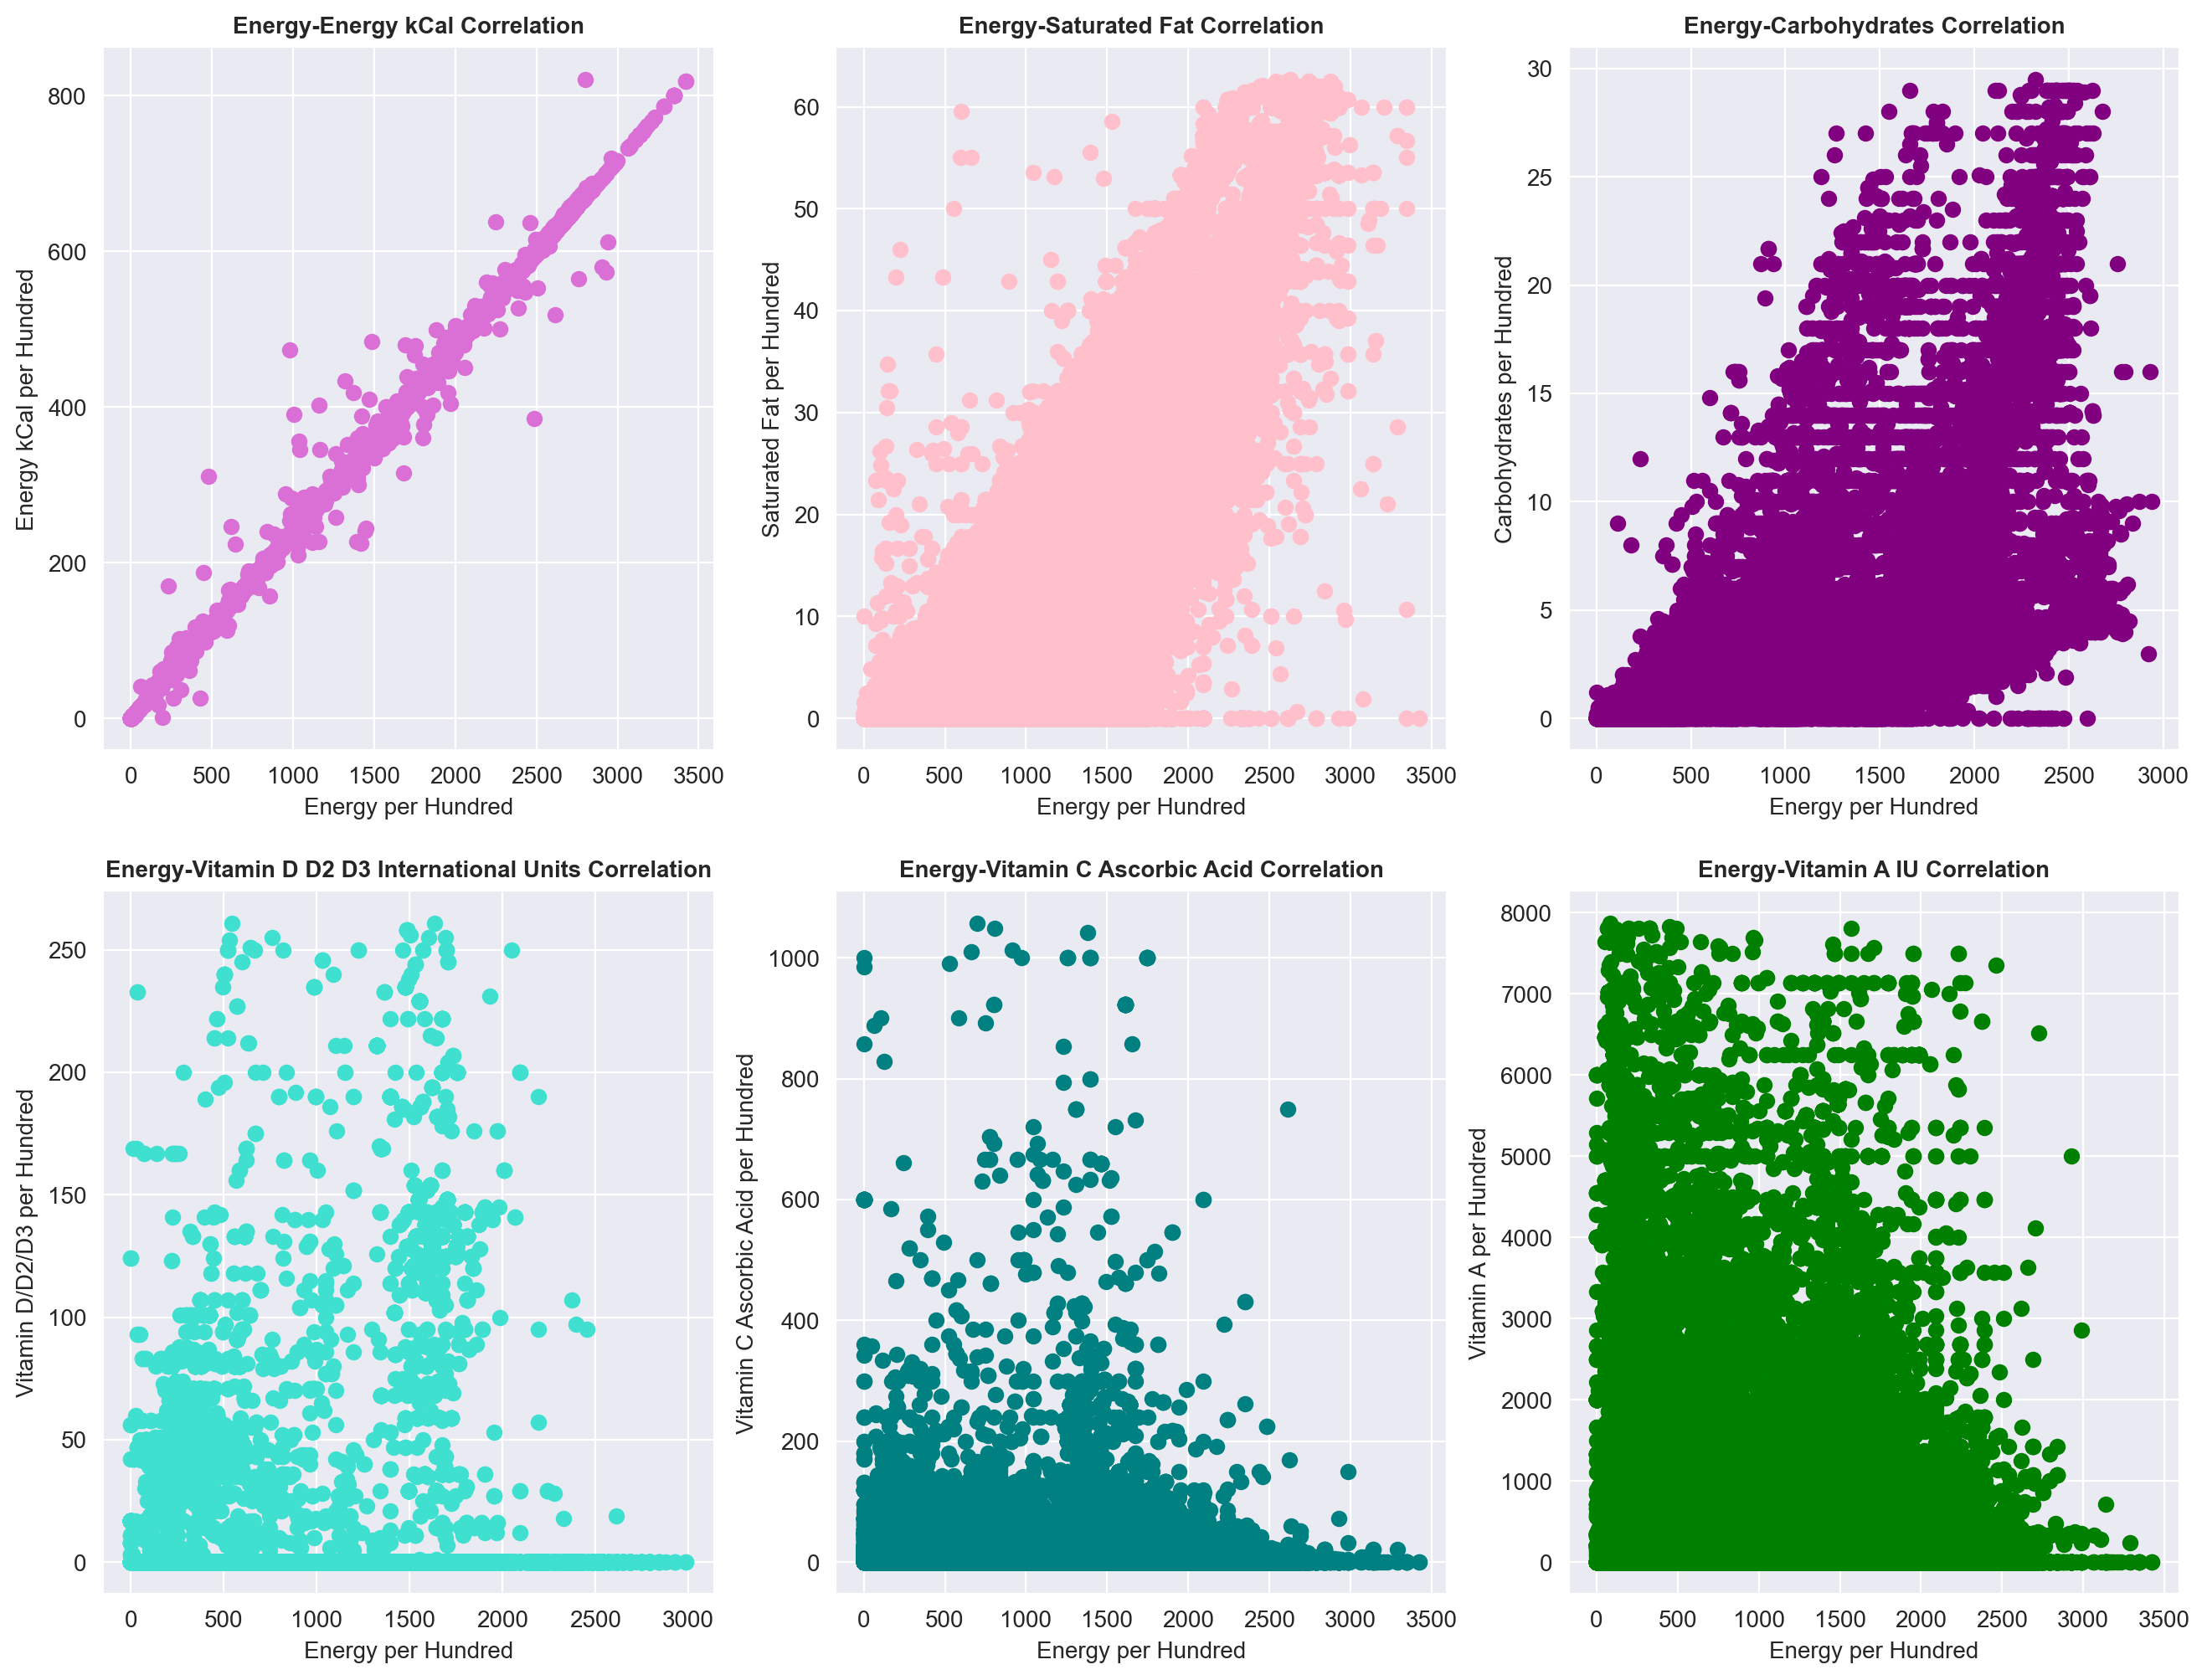

In [507]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

ax[0,0].scatter(df_per_hundred["energy_per_hundred"], df_per_hundred["energy_kcal_per_hundred"], color= "orchid")
ax[0,0].set(xlabel="Energy per Hundred", ylabel="Energy kCal per Hundred")
ax[0,0].set_title("Energy-Energy kCal Correlation", fontweight="bold", fontsize=10)


ax[0,1].scatter(df_per_hundred["energy_per_hundred"], df_per_hundred["fat_per_hundred"], color= "pink")
ax[0,1].set(xlabel="Energy per Hundred", ylabel="Saturated Fat per Hundred")
ax[0,1].set_title("Energy-Saturated Fat Correlation", fontweight="bold", fontsize=10)

ax[0,2].scatter(df_per_hundred["energy_per_hundred"], df_per_hundred["saturated_fat_per_hundred"], color= "purple")
ax[0,2].set(xlabel="Energy per Hundred", ylabel="Carbohydrates per Hundred")
ax[0,2].set_title("Energy-Carbohydrates Correlation", fontweight="bold", fontsize=10)

ax[1,0].scatter(df_per_hundred["energy_per_hundred"], df_per_hundred["vitamin_d_d2_d3_international_units_per_hundred"], color= "turquoise")
ax[1,0].set(xlabel="Energy per Hundred", ylabel="Vitamin D/D2/D3 per Hundred")
ax[1,0].set_title("Energy-Vitamin D D2 D3 International Units Correlation", fontweight="bold", fontsize=10)

ax[1,1].scatter(df_per_hundred["energy_per_hundred"], df_per_hundred["vitamin_c_ascorbic_acid_per_hundred"], color= "teal")
ax[1,1].set(xlabel="Energy per Hundred", ylabel="Vitamin C Ascorbic Acid per Hundred")
ax[1,1].set_title("Energy-Vitamin C Ascorbic Acid Correlation", fontweight="bold", fontsize=10)

ax[1,2].scatter(df_per_hundred["energy_per_hundred"], df_per_hundred["vitamin_a_iu_per_hundred"], color= "green")
ax[1,2].set(xlabel="Energy per Hundred", ylabel="Vitamin A per Hundred")
ax[1,2].set_title("Energy-Vitamin A IU Correlation", fontweight="bold", fontsize=10)

plt.show()

<br/> <ins> **Observations**

The energy-energy kCal scatterplot has an almost perfect, positve linear correlation. Whilst the data points that illustrate the energy-saturated fat and energy-saturated fat correlations are moderately clustered along an upward slope. The energy-saturated fat scatterplot diverges into two clusters as the positive linear correlation increases.

The energy-vitamin a iu correlation similarly has a moderate cluster of data points along a negative slope. In contrast, the energy-vitamin d/d2/d3 international units correlation and energy-vitamin c asorbic acid correlation have no association as the data points are widley dispersed.  

Lastly, all six scatterplots have extreme values, and if removed the pairwise linear associations are likely to improve.

<br/>**3) Your task is to test the independence of two categorical variables statistically. Use the energy_per_hundred column to create a new variable that holds equal proportion of values in three categories low energy, medium energy and high energy. Test if the level of energy in the product is associated with the country where the product is produced.**

<br/>Categorising the energy per hundred data points by quantile ensures that the three bins are reflective of the per hundred measurement when Pandas *.qcut()* is applied.

I had initially sorted the energy per hundred column in ascending order and categorised energy level according to index values so as to group proportionate values. However, the output pivot table that counts each energy threshold and associative country is ambiguous. Prioritising proportionality discrepantly categorises the energy measurements. 

Moreover, if Pandas *.cut()* were used instead of *.qcut()*, the three interval widths would be discrepant as the range of values in the column *energy_per_hundred* determine the bin categories.

Therefore, creating a pivot table that accurately represents the association between a categorical energy per hundred value and the country each product was manufactured in suitably prepares the data for a Chi-squared test of independance. 

In [508]:
nrg_level = pd.qcut(df_per_hundred["energy_per_hundred"], q=3, labels=['low', 'medium', 'high'])

print(f"The three categories are relatively proportionate:\n\n{nrg_level.value_counts()}")

The three categories are relatively proportionate:

medium    92882
low       92486
high      91806
Name: energy_per_hundred, dtype: int64


<br/>

In [509]:
nrg_level = pd.DataFrame(nrg_level)

nrg_level.columns = ["energy_threshold"]

nrg_level["country"] = df_other_cols["country"]

pd.crosstab(nrg_level["energy_threshold"], nrg_level["country"], margins=True)

country           AT     CH   DE  FR   IT  UK      US     All
energy_threshold                                             
low                1   6388  244  17   60   1   85775   92486
medium             0   7235  274  19   76   0   85278   92882
high               0   7263  340  13  108   0   84082   91806
All                1  20886  858  49  244   1  255135  277174

<br/>The pivot table visualises the count of sample products per country with a low, medium or high threshold. 

To heighten the validity of the Chi-squared statistic, the columns AT, CH, DE, FR, IT and UK will be excluded from the chi-squared test of independance. The countries AT and UK have less than 5 pairwise associations.

In addition, after 10 sample selections of *1000* country and *energy_threshold* combinations, the other columns are either excluded from the output pivot table or have a count that's less than 5. 

In [510]:
countries = ["CH", "US"]

nrg_level_filtered = nrg_level[nrg_level["country"].isin(countries)]

pd.crosstab(nrg_level_filtered["energy_threshold"], nrg_level_filtered["country"], margins=True)

country              CH      US     All
energy_threshold                       
low                6388   85775   92163
medium             7235   85278   92513
high               7263   84082   91345
All               20886  255135  276021

In [511]:
nrg_level_sample = nrg_level_filtered.sample(n=1000)

pd.crosstab(nrg_level_sample["energy_threshold"], nrg_level_sample["country"], margins=True)

country           CH   US   All
energy_threshold               
low               33  295   328
medium            30  300   330
high              22  320   342
All               85  915  1000

<br/>The *chi2_contingency* function from scipy is used to calculate the test statistic and probability value.

In [512]:
chi_square, p_value, dof, matrix = stats.chi2_contingency(pd.crosstab(nrg_level_sample["energy_threshold"], nrg_level_sample["country"]))

print(chi_square,p_value)

3.054957979489715 0.21708224462793851


<br/>As the p-value is greater than the 0.05 significance level, the null hypothesis isn't rejected. Therefore the energy threshold and country each product was manufactured in are independent. 

## G. Advanced Exploratory Data Analysis

**1) What is the total number of samples by country? Countries with very small sample size should be dropped from this analysis as their results may not be statistically significant.**

The variable *country* stores an aggregation on the count and percentage of samples per country. Pandas *groupby* function and the percentage function that I'd previously created are applied to compute both features. 

In [513]:
country = df_raw2.groupby("country")["country"].aggregate(total=("count")).sort_values(by="total")

country["percentage"] = country.total.apply(percentage)

country

total  percentage
country                    
AT            1    0.000361
UK            1    0.000361
FR           49    0.017671
IT          246    0.088715
DE          859    0.309782
CH        21001    7.573605
US       255135   92.009506

The variable *filtered_rows2* stores all product entries from countries that have a very small sample size relative to the sum of entires. The filtered rows won't be included in subsequent analysis. 

In [514]:
df = df_raw2.copy()

filtered_rows2 = df_raw2[df_raw2["country"].isin(["AT", "UK", "FR", "IT", "DE"])]

print(f"The sum of samples from the selected countries is {filtered_rows2.shape[0]}. Relative to the entire dataset the percentage is {filtered_rows2.shape[0]/df_raw2.shape[0]}")

The sum of samples from the selected countries is 1156. Relative to the entire dataset the percentage is 0.00416889055580399


<br/>

In [515]:
df_raw2.drop(filtered_rows2.index, inplace=True)

<br/>

<br/>**2) Count the number of organic and non-organic products in each country. Is there a country with a higher percentage of organic products?**

Samples that have the word organic in the column *ingredients_en* are saved to the variable *organic* and those that don't are saved to the variable *non_organic*.

In [516]:
organic = df_raw2.loc[df_raw2['ingredients_en'].str.contains('organic', na=False)]

non_organic = df_raw2.loc[~df_raw2['ingredients_en'].str.contains('organic', na=False)]

<br/>The variable *produce_type* stores the count and percentage of organic and non organic products in CH and US.

In [517]:
produce_type = organic.groupby("country")["country"].aggregate(organic_count=("count"))

produce_type["organic_percentage"] = produce_type["organic_count"].apply(percentage)

produce_type["non_organic_count"] = df_raw2.groupby("country")["country"].aggregate(["count"])

produce_type["non_organic_percentage"] = produce_type["non_organic_count"].apply(percentage)

produce_type.sort_values(by="organic_count")

organic_count  organic_percentage  non_organic_count  \
country                                                         
US                   3            0.001086             255135   
CH                 415            0.150288              21001   

         non_organic_percentage  
country                          
US                     92.39469  
CH                      7.60531

 CH has a higher percentage of organic products in comparison to US.

**3) Totals or portions don’t give a very detailed picture. Compare the distributions of the macronutrients between organic and non-organic products in each country. Your solution method should include appropriate visualisations in the subplots format. Note that bar charts aren’t not the best way to communicate distributions.**

Creating 8  box and strip subplots suitably visualises the distibution of macronutrients between organic and non-organic products.

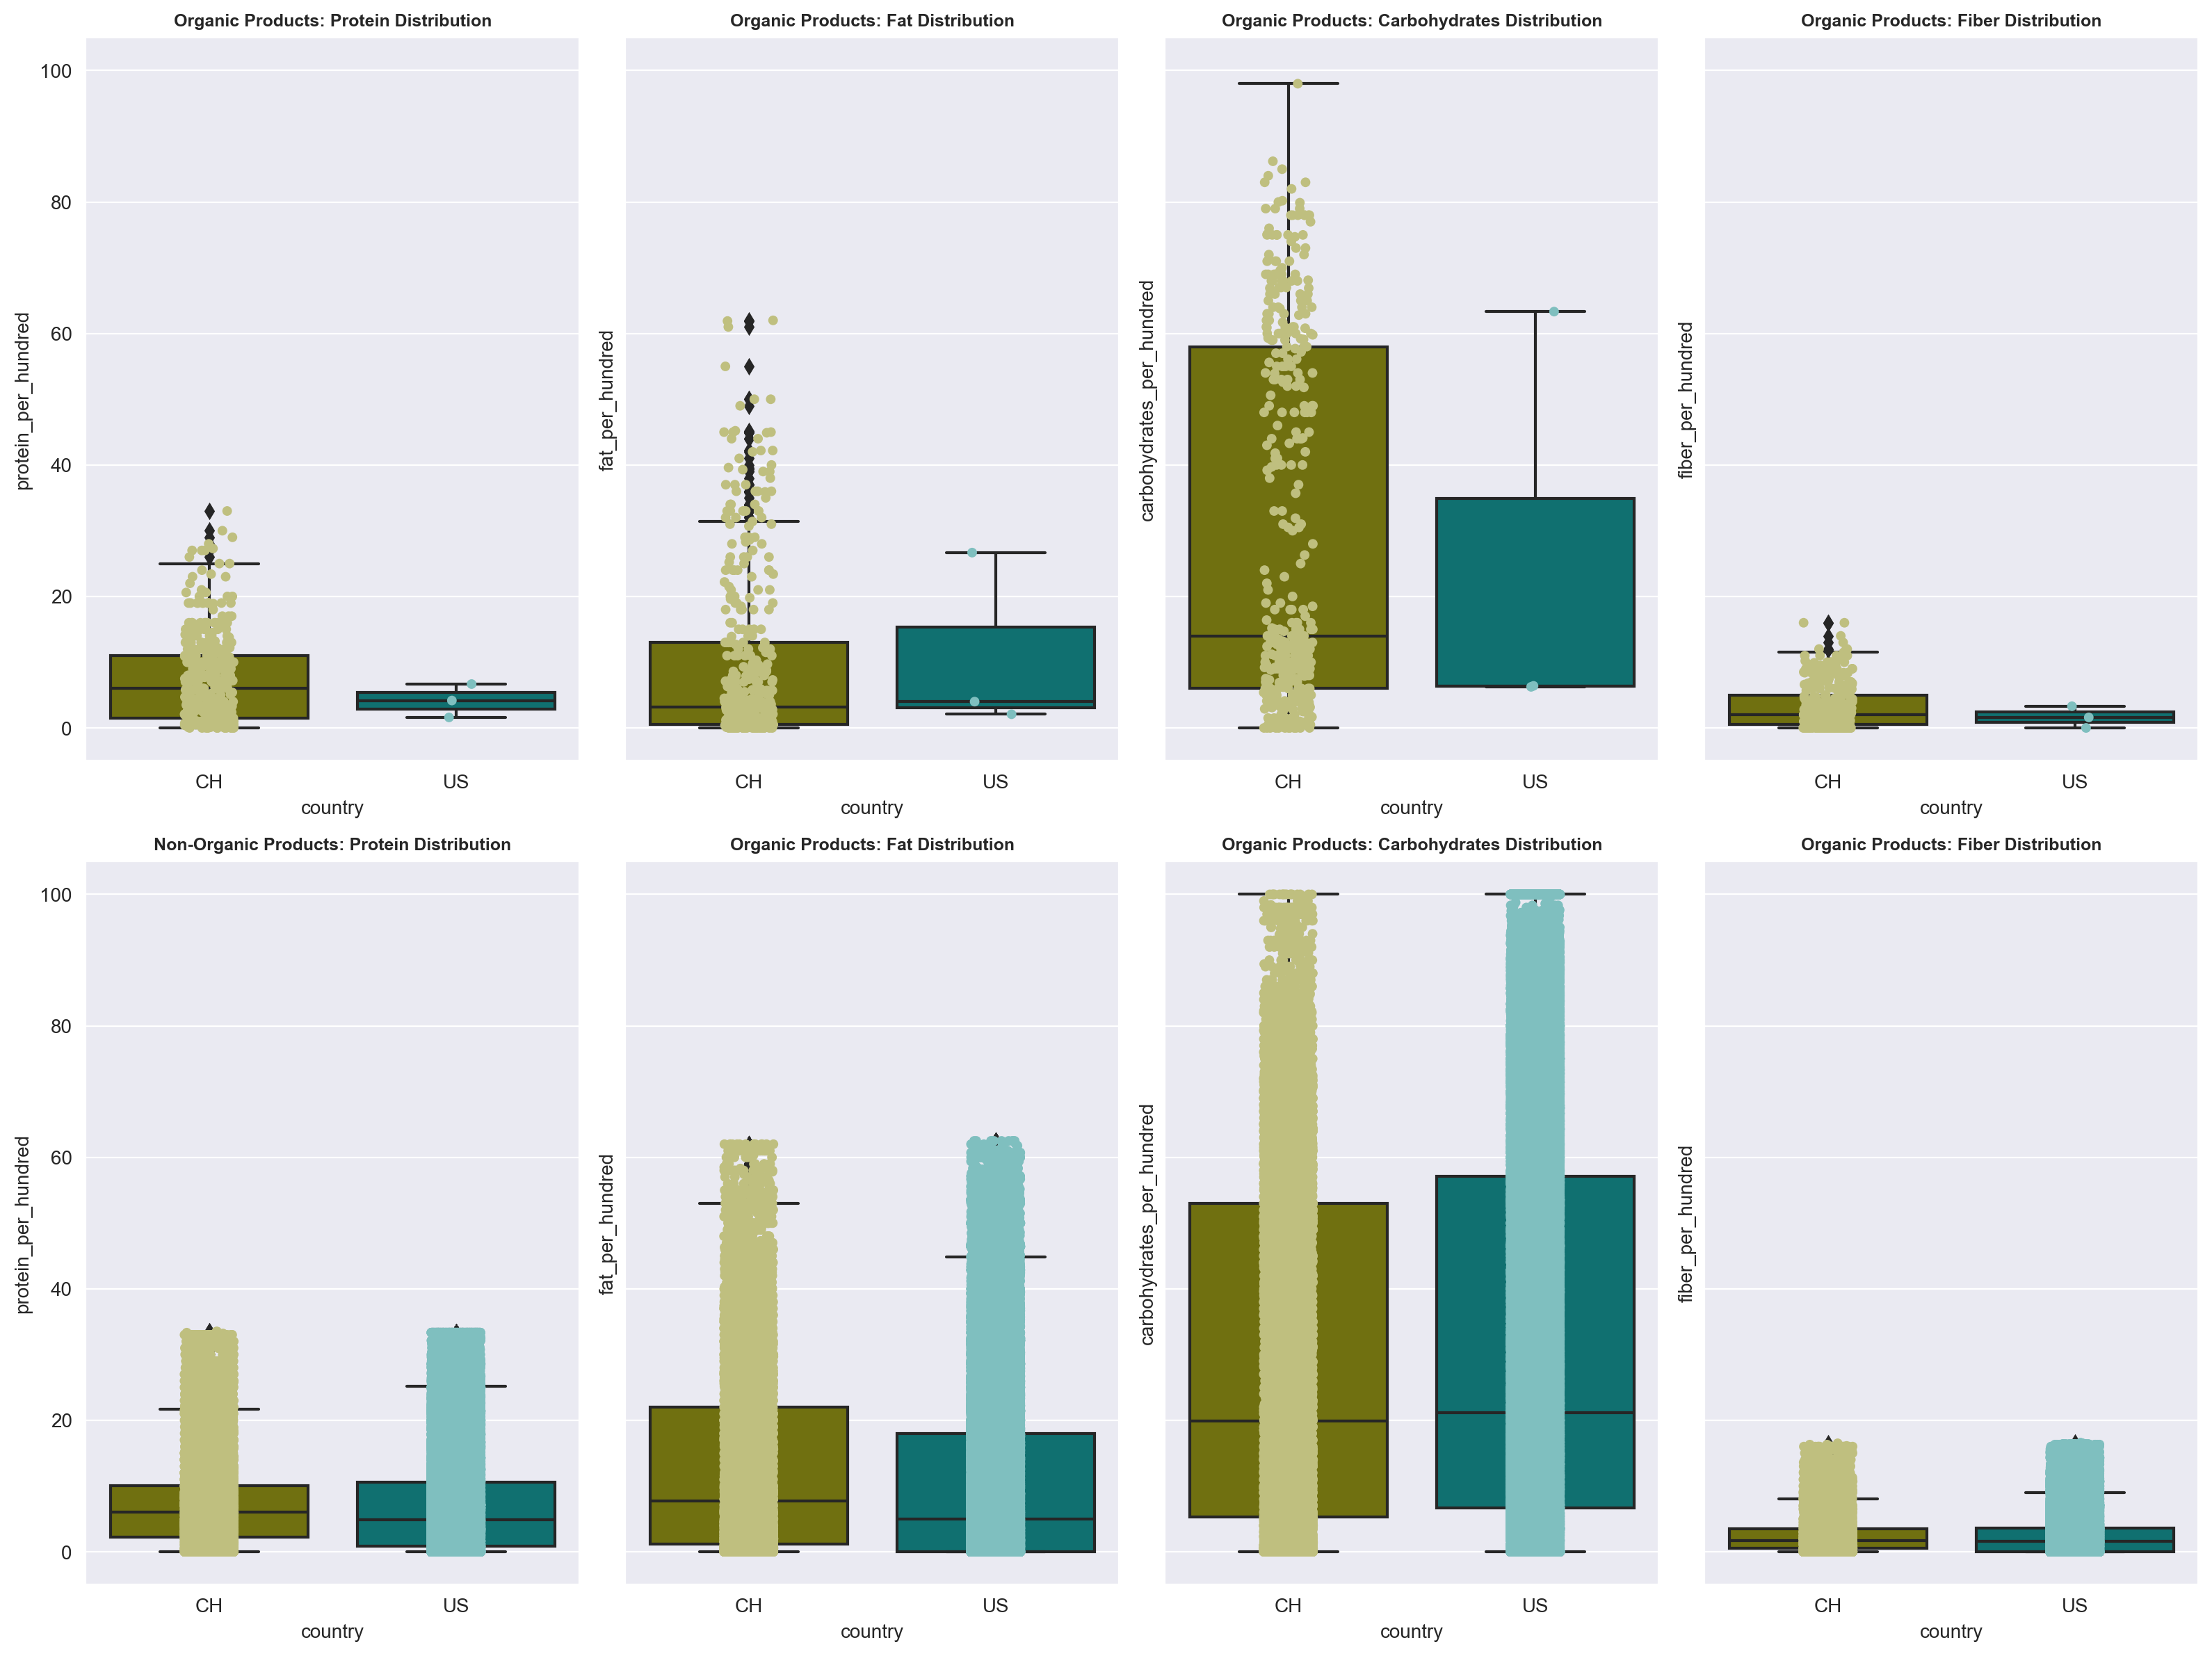

In [518]:
palette_one = ["#808000", "#008080"]

palette_two = ["#bfbf7f", "#7fbfbf"]

fig, ax = plt.subplots(nrows= 2, ncols = 4, figsize=(16, 12), sharey=True)

sns.boxplot(data=organic, x="country", y="protein_per_hundred", ax=ax[0,0], palette=palette_one)
sns.boxplot(data=organic, x="country", y="fat_per_hundred", ax=ax[0,1], palette=palette_one)
sns.boxplot(data=organic, x="country", y="carbohydrates_per_hundred", ax=ax[0,2], palette=palette_one)
sns.boxplot(data=organic, x="country", y="fiber_per_hundred", ax=ax[0,3], palette=palette_one)

sns.stripplot(data=organic, x="country", y="protein_per_hundred", ax=ax[0,0], palette=palette_two)
sns.stripplot(data=organic, x="country", y="fat_per_hundred", ax=ax[0,1], palette=palette_two)
sns.stripplot(data=organic, x="country", y="carbohydrates_per_hundred", ax=ax[0,2], palette=palette_two)
sns.stripplot(data=organic, x="country", y="fiber_per_hundred", ax=ax[0,3], palette=palette_two)

sns.boxplot(data=non_organic, x="country", y="protein_per_hundred", ax=ax[1,0], palette=palette_one)
sns.boxplot(data=non_organic, x="country", y="fat_per_hundred", ax=ax[1,1], palette=palette_one)
sns.boxplot(data=non_organic, x="country", y="carbohydrates_per_hundred", ax=ax[1,2], palette=palette_one)
sns.boxplot(data=non_organic, x="country", y="fiber_per_hundred", ax=ax[1,3], palette=palette_one)

sns.stripplot(data=non_organic, x="country", y="protein_per_hundred", ax=ax[1,0], palette=palette_two)
sns.stripplot(data=non_organic, x="country", y="fat_per_hundred", ax=ax[1,1], palette=palette_two)
sns.stripplot(data=non_organic, x="country", y="carbohydrates_per_hundred", ax=ax[1,2], palette=palette_two)
sns.stripplot(data=non_organic, x="country", y="fiber_per_hundred", ax=ax[1,3], palette=palette_two)

ax[0,0].set_title("Organic Products: Protein Distribution", fontweight="bold", fontsize=9)
ax[0,1].set_title("Organic Products: Fat Distribution", fontweight="bold", fontsize=9)
ax[0,2].set_title("Organic Products: Carbohydrates Distribution", fontweight="bold", fontsize=9)
ax[0,3].set_title("Organic Products: Fiber Distribution", fontweight="bold", fontsize=9)

ax[1,0].set_title("Non-Organic Products: Protein Distribution", fontweight="bold", fontsize=9)
ax[1,1].set_title("Organic Products: Fat Distribution", fontweight="bold", fontsize=9)
ax[1,2].set_title("Organic Products: Carbohydrates Distribution", fontweight="bold", fontsize=9)
ax[1,3].set_title("Organic Products: Fiber Distribution", fontweight="bold", fontsize=9)


fig.tight_layout()
plt.show()